In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Conv2D, Conv2DTranspose, BatchNormalization, UpSampling1D, UpSampling2D, Dense, MaxPool2D, LeakyReLU, Reshape, Dropout, Flatten, GaussianNoise, Embedding, multiply, concatenate, add
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import time
import pickle
from sklearn.model_selection import train_test_split
from textwrap import wrap

In [2]:
tf.__version__

'2.1.0'

In [3]:
def normalize_img(img):
    return (img - 127.5)/127.5

def unnormalize_img(img):
    return (img + 1.) / 2.

In [4]:
def load_image_caption_dict():
    caption_dict = None
    with open('./bert/embeddedcaptions.pickle', 'rb') as f:
        return pickle.load(f)
    
caption_dict = load_image_caption_dict()

def load_caption_text_dict():
    caption_dict = None
    with open('./bert/captions.pickle', 'rb') as f:
        return pickle.load(f)
    
caption_text_dict = load_caption_text_dict()

In [5]:
train_imgs = []
train_classes = []
train_captions = []
caption_text = []
class_index = 0
import os
for root, dirs, files in os.walk("./CUB_200_2011/CUB_200_2011/images-cleaned-named/", topdown=False):
    print(f'{len(files)} samples in class {class_index}, ({root})')
    for name in files:
        train_imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, name)), cv2.COLOR_RGB2BGR))
        train_classes.append(class_index)
        train_captions.append(caption_dict[name.split('.')[0]+'.txt'][0]) # Just using the first of 10 captions for now
        caption_text.append(caption_text_dict[name.split('.')[0]+'.txt'][0]) # Just using the first of 10 captions for now
    class_index += 1
train_imgs = np.array(train_imgs)
train_imgs = (train_imgs - 127.5)/127.5
train_imgs = train_imgs.astype(np.float32)
train_classes = np.array(train_classes)
train_captions = np.array(train_captions)

60 samples in class 0, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/001.Black_footed_Albatross)
60 samples in class 1, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/002.Laysan_Albatross)
58 samples in class 2, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/003.Sooty_Albatross)
60 samples in class 3, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/004.Groove_billed_Ani)
44 samples in class 4, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/005.Crested_Auklet)
41 samples in class 5, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/006.Least_Auklet)
53 samples in class 6, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/007.Parakeet_Auklet)
48 samples in class 7, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/008.Rhinoceros_Auklet)
59 samples in class 8, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/009.Brewer_Blackbird)
60 samples in class 9, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/010.Red_winged_Blackbird)
60 samples in class 10, (./CUB_200_2011/CUB_20

59 samples in class 96, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/097.Orchard_Oriole)
60 samples in class 97, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/098.Scott_Oriole)
60 samples in class 98, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/099.Ovenbird)
60 samples in class 99, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/100.Brown_Pelican)
50 samples in class 100, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/101.White_Pelican)
60 samples in class 101, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/102.Western_Wood_Pewee)
60 samples in class 102, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/103.Sayornis)
60 samples in class 103, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/104.American_Pipit)
49 samples in class 104, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/105.Whip_poor_Will)
60 samples in class 105, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/106.Horned_Puffin)
59 samples in class 106, (./CUB_200_2011/CUB_200_2011/images-cleane

50 samples in class 186, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/187.American_Three_toed_Woodpecker)
60 samples in class 187, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/188.Pileated_Woodpecker)
60 samples in class 188, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/189.Red_bellied_Woodpecker)
58 samples in class 189, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/190.Red_cockaded_Woodpecker)
60 samples in class 190, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/191.Red_headed_Woodpecker)
60 samples in class 191, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/192.Downy_Woodpecker)
60 samples in class 192, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/193.Bewick_Wren)
60 samples in class 193, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/194.Cactus_Wren)
60 samples in class 194, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/195.Carolina_Wren)
59 samples in class 195, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/196.House_Wren)
60 samples in 

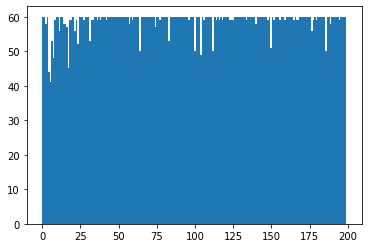

(11788, 64, 64, 3)


In [7]:
plt.hist(train_classes, bins=200)
plt.show()
assert(len(train_imgs) == len(train_classes))
print(train_imgs.shape)

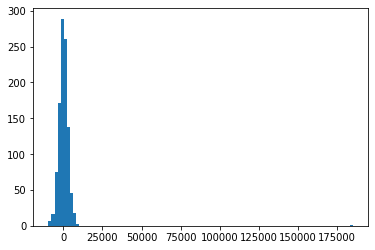

929
18.448483


In [8]:
plt.hist(np.sum(train_captions, axis=0), bins=100)
plt.show()
print(np.argmax(np.sum(train_captions, axis=0)))
print(train_captions[2786][929])

In [9]:
def create_simple_attrs(attrs):
    # Structure is like so: [0-14:color, 15-19:size, 20-33:shape]

    simple_attrs = np.zeros((attrs.shape[0], 34))
    
    # Color
    simple_attrs[:, 0:15] = attrs[:, 248:263]
    
    # Size and shape
    simple_attrs[:, 15:34] = attrs[:, 217:236]
    
    return simple_attrs


In [10]:
def create_even_simpler_attrs(attrs):
    # Structure is like so: [0-4:color, 5-7:size, 8-9:shape]
    
    simplest_attrs = np.zeros((attrs.shape[0], 10))
    
    simplest_attrs[:, 0] = attrs[:, 1] # Brown
    simplest_attrs[:, 1] = attrs[:, 5] # Grey
    simplest_attrs[:, 2] = attrs[:, 11] # Black
    simplest_attrs[:, 3] = attrs[:, 12] # White
    simplest_attrs[:, 4] = np.clip(np.sum(attrs[:, [0, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14]], axis=1), a_min=0, a_max=1) # Other
    
    simplest_attrs[:, 5] = attrs[:, 19] # Smallest
    simplest_attrs[:, 6] = attrs[:, 16] # Small
    simplest_attrs[:, 7] = np.clip(np.sum(attrs[:, [15, 17, 18]], axis=1), a_min=0, a_max=1) # Large
    
    simplest_attrs[:, 8] = attrs[:, 33] # Perching-like
    simplest_attrs[:, 9] = np.clip(np.sum(attrs[:, [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]], axis=1), a_min=0, a_max=1) # Not perching-like
    
    return simplest_attrs

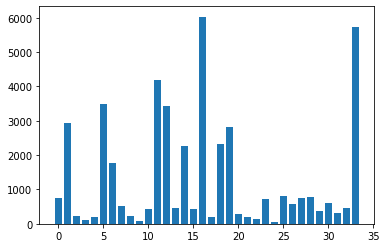

In [11]:
def load_image_attributes():
    train_attrs = np.zeros((train_imgs.shape[0], 312))
    with open('./CUB_200_2011/CUB_200_2011/attributes/image_attribute_labels.txt', 'r') as f:
        lines = f.readlines()
        for line in lines:
            
            # For now we don't care about attribute certainty, just if it is present.
            try:
                split = line.split()
                img_id = int(split[0])
                assert(img_id > 0)
                assert(img_id <= 11788)
                attr_id = int(split[1])
                assert(attr_id > 0)
                assert(attr_id <= 312)
                is_present = int(split[2])
                assert(is_present == 0 or is_present == 1)
            except: 
                print(line)
                print(line.split())
                return
            
            train_attrs[img_id-1, attr_id-1] = is_present
    return train_attrs

train_attrs = load_image_attributes().astype('float32')
train_attrs = create_simple_attrs(train_attrs)
plt.bar([x for x in range(34)], np.sum(train_attrs, axis=0))
plt.show()
# train_attrs = create_even_simpler_attrs(train_attrs)
train_attrs = train_attrs.astype(np.float32)

In [12]:
def make_caption_autoencoder(attribute_shape):
    caption_shape = 1024
    captions_in = Input(shape=(caption_shape))
    
    x = Reshape((caption_shape, 1))(captions_in)
    
    x = Conv1D(16, 3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = Conv1D(32, 3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = Conv1D(64, 3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = Flatten()(x)
    
#     x = Dropout(0.5)(x)
    
    x = Dense(attribute_shape, name='attr_out', activation='sigmoid')(x)
    attr_out = x
    
    x = Dense(8192)(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = Reshape((128, 64))(x)

    x = UpSampling1D()(x)
    x = Conv1D(64, 3, strides=1, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = UpSampling1D()(x)
    x = Conv1D(32, 3, strides=1, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = UpSampling1D()(x)
    x = Conv1D(16, 3, strides=1, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = Conv1D(1, 3, strides=1, padding='same')(x)
    x = LeakyReLU()(x)
    
    x = Flatten(name='caption_out')(x)
    
#     x = Dense(1024, name='caption_out')(x)
    
    return Model(captions_in, [x, attr_out])

In [13]:
autoencoder = make_caption_autoencoder(34)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024)]            0         
_________________________________________________________________
reshape (Reshape)            (None, 1024, 1)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 512, 16)           64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512, 16)           0         
_________________________________________________________________
dropout (Dropout)            (None, 512, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 256, 32)           1568      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 32)           0     

In [ ]:
losses = {
    'caption_out': 'mse',
    'attr_out': 'binary_crossentropy',
}

lossWeights = {'caption_out': 1.0, 'attr_out': 1.0}

autoencoder.compile(optimizer = Adam(0.0001),
                    loss = losses,
                    loss_weights = lossWeights)

c_train, c_test, a_train, a_test = train_test_split(train_captions, train_attrs, test_size=0.2)

history = autoencoder.fit(c_train,
                {'caption_out' : c_train, 'attr_out' : a_train},
                validation_data=(c_test, [c_test, a_test]),
                epochs=200,
                batch_size=256)

In [ ]:
plot_save_dir = 'bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34'

# Val loss is lower because dropout isn't active during testing
# https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

plt.plot(history.history['caption_out_loss'], label="Caption Training Loss (MSE)")
plt.plot(history.history['val_caption_out_loss'], label="Caption Validation Loss (MSE)")
plt.legend()
plt.savefig('./results/plots/'+plot_save_dir+'/autoencoder_caption_loss.png')
plt.show()

plt.plot(history.history['attr_out_loss'], label="Attr Training Loss (BCE)")
plt.plot(history.history['val_attr_out_loss'], label="Attr Validation Loss (BCE)")
plt.legend()
plt.savefig('./results/plots/'+plot_save_dir+'/autoencoder_attr_loss.png')
plt.show()


In [16]:
# autoencoder.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34/autoencoder-conv1d-200.h5')
autoencoder.load_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34/autoencoder-conv1d-200.h5')

In [17]:
# Just some testing
idx=1
print(a_test[idx])
output = autoencoder.predict(c_test[idx].reshape(1, -1))
print(np.round(output[1][0]))
print(output[1][0])

NameError: name 'a_test' is not defined

In [14]:
# Extract encoder from autoencoder
autoencoder.load_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34/autoencoder-conv1d-200.h5')
encoder = Model(autoencoder.input, autoencoder.get_layer('attr_out').output)
# for layer in encoder.layers:
#     layer.trainable = True
encoder.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024)]            0         
_________________________________________________________________
reshape (Reshape)            (None, 1024, 1)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 512, 16)           64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512, 16)           0         
_________________________________________________________________
dropout (Dropout)            (None, 512, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 256, 32)           1568      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 32)           0   

In [15]:
def make_generator_model(shape):
    
    noise_in = Input(shape=shape)
    captions_in = Input(shape=(1024,))
    
    c = encoder(captions_in)
    
    input_layer = concatenate([noise_in, c])
    
    x = Dense(16*16*64*2)(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Reshape((16, 16, 128))(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')(x)
    
    return Model([noise_in, captions_in], [x, c])

In [16]:
generator = make_generator_model((300,))
generator.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 34)           286402      input_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 334)          0           input_2[0][0]                    
                                                                 model_1[1][0]              

(1024,)


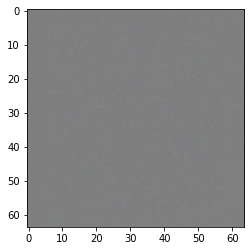

In [21]:
generator = make_generator_model((300,))

noise = np.random.normal(0, 1, 300)
label = train_captions[0]
print(label.shape)

generated_image = generator.predict( [np.array([noise]), np.array([label])] )[0][0]
plt.imshow(unnormalize_img(generated_image), )

In [22]:
def make_valid_discriminator_model():
    input_layer = Input((64, 64, 3))
#     x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name='valid')(input_layer)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    
    x = Flatten()(x)
    x = Dense(64)(x) 
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    valid = Dense(1, activation='sigmoid')(x)
    
    return Model(input_layer, valid)

In [23]:
discriminator_valid = make_valid_discriminator_model()
discriminator_valid.summary()
valid = discriminator_valid.predict(np.array([generated_image]))


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
valid (Conv2D)               (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 64)        0   

In [6]:
def make_attr_discriminator_model():
    input_layer = Input((64, 64, 3))
    
#     x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name='attr')(input_layer)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)


#     x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
#     x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
#     x = Dense(128)(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    x = Dense(48)(x)
#     x = Dense(64)(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    attr = Dense(34, activation='sigmoid')(x)
    
    return Model(input_layer, attr)

In [7]:
discriminator_attr = make_attr_discriminator_model()
discriminator_attr.summary()
attrs = discriminator_attr.predict(np.array([generated_image]))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
attr (Conv2D)                (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0     

NameError: name 'generated_image' is not defined

In [26]:
cross_entropy = BinaryCrossentropy(from_logits=False)

@tf.function
def discriminator_valid_loss(real_output, fake_output, flip):
    
    if flip:
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.9, maxval=1.0)
        real_labels = tf.random.uniform(real_output.shape, minval=0.0, maxval=0.1)
    else:
        real_labels = tf.random.uniform(real_output.shape, minval=0.9, maxval=1.0)
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.0, maxval=0.1)

        
    real_loss = cross_entropy(real_labels, real_output)
    fake_loss = cross_entropy(fake_labels, fake_output)
    total_loss = real_loss + fake_loss
    return total_loss, real_loss, fake_loss

In [27]:
# mse = MeanSquaredError()

@tf.function
def discriminator_attribute_loss_real(real_output, real_attributes):
    return cross_entropy(real_output, real_attributes)

@tf.function
def discriminator_attribute_loss_fake(fake_output, fake_attributes):
    return cross_entropy(fake_output, fake_attributes)

In [28]:
@tf.function
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

@tf.function
def generator_attr_loss(fake_attr_output, sampled_attrs):
    return cross_entropy(fake_attr_output, sampled_attrs)

@tf.function
def generator_caption_loss(fake_caption_output, sampled_captions):
    return cross_entropy(fake_caption_output, sampled_captions)

In [68]:
@tf.function
def train_step(images, attrs, captions, sampled_attrs, sampled_captions, flip, warmup):
    noise = tf.random.truncated_normal([32, 300], dtype=tf.dtypes.float64)
    
#     sampled_attrs = tf.cast(tf.random.uniform([32, 312], minval=0, maxval=2, dtype='int32'), 'float32') # Need to make this smarter. Only one 1 per attr.
#     attrs = tf.reshape(attrs, (attrs.shape[0], 1))
    
    gen_losses = []
    gen_valid_losses = []
    gen_attr_losses = []
    gen_caption_losses = []
    disc_losses = []
    disc_real_losses = []
    disc_fake_losses = []
    disc_attr_real_losses = []
    disc_attr_fake_losses = []

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape_valid, tf.GradientTape() as disc_tape_attr:
        gen_tape.watch(generator.trainable_variables)
        disc_tape_valid.watch(discriminator_valid.trainable_variables)
        disc_tape_attr.watch(discriminator_attr.trainable_variables)
        
        generated_images, generated_attrs = generator([noise, sampled_captions], training=True)
        
        real_output = discriminator_valid(images, training=True)
        fake_output = discriminator_valid(generated_images, training=True)
        
        real_attr_output = discriminator_attr(images, training=True)
        fake_attr_output = discriminator_attr(generated_images, training=True)
        
        gen_valid_loss = generator_loss(fake_output)
        gen_attr_loss = generator_attr_loss(fake_attr_output, sampled_attrs)
        gen_caption_loss = generator_caption_loss(generated_attrs, sampled_attrs)
        gen_loss = ((2.0 - warmup) * gen_valid_loss + (warmup * (gen_attr_loss + gen_caption_loss)))
        
        disc_valid_loss, disc_real_loss, disc_fake_loss = discriminator_valid_loss(real_output, fake_output, flip)
        disc_attr_real_loss = discriminator_attribute_loss_real(real_attr_output, attrs)
        disc_attr_fake_loss = discriminator_attribute_loss_fake(fake_attr_output, sampled_attrs)
        disc_attr_loss = ((2.0 - warmup) * disc_attr_real_loss + warmup * disc_attr_fake_loss)
#         disc_loss += ((2.0 - warmup) * disc_attr_real_loss + warmup * disc_attr_fake_loss)
        
        
        gen_losses.append(K.mean(gen_loss))
        gen_valid_losses.append(K.mean(gen_valid_loss))
        gen_attr_losses.append(K.mean(gen_attr_loss))
        gen_caption_losses.append(K.mean(gen_caption_loss))
        disc_losses.append(K.mean(disc_valid_loss))
        disc_real_losses.append(K.mean(disc_real_loss))
        disc_fake_losses.append(K.mean(disc_fake_loss))
        disc_attr_real_losses.append(K.mean(disc_attr_real_loss))
        disc_attr_fake_losses.append(K.mean(disc_attr_fake_loss))
    
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)

    gradients_of_discriminator_valid = disc_tape_valid.gradient(disc_valid_loss, discriminator_valid.trainable_variables)
    
    gradients_of_discriminator_attr = disc_tape_attr.gradient(disc_attr_loss, discriminator_attr.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    discriminator_valid_optimizer.apply_gradients(zip(gradients_of_discriminator_valid, discriminator_valid.trainable_variables))
    
    discriminator_attr_optimizer.apply_gradients(zip(gradients_of_discriminator_attr, discriminator_attr.trainable_variables))

    return (gen_losses, gen_valid_losses, gen_attr_losses, gen_caption_losses, disc_losses, disc_real_losses, disc_fake_losses, disc_attr_real_losses, disc_attr_fake_losses)

In [30]:
def train(train_imgs, train_attrs, train_captions, epochs, warmup):
    gen_loss_all = []
    gen_valid_loss_all = []
    gen_attr_loss_all = []
    gen_caption_loss_all = []
    disc_loss_all = []
    disc_loss_real_all = []
    disc_loss_fake_all = []
    disc_attr_loss_real_all = []
    disc_attr_loss_fake_all = []
    warmup_step = 1./2000.
    
    num_samples = len(train_imgs)
    batch_counter = 0
    
    for epoch in range(epochs):
        start = time.time()
        
        gen_loss_epoch = [1, 0]
        gen_valid_loss_epoch = [1, 0]
        gen_attr_loss_epoch = [1, 0]
        gen_caption_loss_epoch = [1, 0]
        disc_loss_epoch = [1, 0]
        disc_loss_real_epoch = [1, 0]
        disc_loss_fake_epoch = [1, 0]
        disc_attr_loss_real_epoch = [1, 0]
        disc_attr_loss_fake_epoch = [1, 0]
        
        seed = np.random.randint(0, 10000)
        np.random.seed(seed)
        np.random.shuffle(train_imgs)
        np.random.seed(seed)
        np.random.shuffle(train_attrs)
        np.random.seed(seed)
        np.random.shuffle(train_captions)
        
        all_indices = np.arange(len(train_attrs))
        np.random.shuffle(all_indices)
        
        for idx, i in enumerate(range(0, num_samples - 32, 32)):
            
            sampled_indices = all_indices[i:(i+32)]
            
            gen_loss_batch, gen_valid_loss_batch, gen_attr_loss_batch, gen_caption_loss_batch, disc_loss_batch, disc_loss_real_batch, disc_loss_fake_batch, disc_attr_loss_real_batch, disc_attr_loss_fake_batch = train_step(train_imgs[i:(i+32)], train_attrs[i:(i+32)], train_captions[i:(i+32)], train_attrs[sampled_indices], train_captions[sampled_indices], batch_counter % 20 == 0, tf.constant(warmup, dtype='float32'))

            gen_loss_epoch[0] += 1
            gen_valid_loss_epoch[0] += 1
            gen_attr_loss_epoch[0] += 1
            gen_caption_loss_epoch[0] += 1
            disc_loss_epoch[0] += 1
            disc_loss_real_epoch[0] += 1
            disc_loss_fake_epoch[0] += 1
            disc_attr_loss_real_epoch[0] += 1
            disc_attr_loss_fake_epoch[0] += 1
            gen_loss_epoch[1] += np.mean(gen_loss_batch)
            gen_valid_loss_epoch[1] += np.mean(gen_valid_loss_batch)
            gen_attr_loss_epoch[1] += np.mean(gen_attr_loss_batch)
            gen_caption_loss_epoch[1] += np.mean(gen_caption_loss_batch)
            disc_loss_epoch[1] += np.mean(disc_loss_batch)
            disc_loss_real_epoch[1] += np.mean(disc_loss_real_batch)
            disc_loss_fake_epoch[1] += np.mean(disc_loss_fake_batch)
            disc_attr_loss_real_epoch[1] += np.mean(disc_attr_loss_real_batch)
            disc_attr_loss_fake_epoch[1] += np.mean(disc_attr_loss_fake_batch)
            
            batch_counter += 1
            
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
        print(f'Gen loss: {gen_loss_epoch[1]/gen_loss_epoch[0]}, Gen valid loss: {gen_valid_loss_epoch[1]/gen_valid_loss_epoch[0]}, Gen attr loss: {gen_attr_loss_epoch[1]/gen_attr_loss_epoch[0]}, Gen caption loss: {gen_caption_loss_epoch[1]/gen_caption_loss_epoch[0]}, Disc valid loss: {disc_loss_epoch[1]/disc_loss_epoch[0]}, Disc valid real loss: {disc_loss_real_epoch[1]/disc_loss_real_epoch[0]}, Disc valid fake loss: {disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0]}, Disc attr loss: {(disc_attr_loss_real_epoch[1] + disc_attr_loss_fake_epoch[1])/(disc_attr_loss_real_epoch[0])}, Disc attr real loss: {disc_attr_loss_real_epoch[1]/disc_attr_loss_real_epoch[0]}, Disc attr fake loss: {disc_attr_loss_fake_epoch[1]/disc_attr_loss_fake_epoch[0]}')
        
        gen_loss_all.append(gen_loss_epoch[1]/gen_loss_epoch[0])
        gen_valid_loss_all.append(gen_valid_loss_epoch[1]/gen_valid_loss_epoch[0])
        gen_attr_loss_all.append(gen_attr_loss_epoch[1]/gen_attr_loss_epoch[0])
        gen_caption_loss_all.append(gen_caption_loss_epoch[1]/gen_caption_loss_epoch[0])
        disc_loss_all.append(disc_loss_epoch[1]/disc_loss_epoch[0])
        disc_loss_real_all.append(disc_loss_real_epoch[1]/disc_loss_real_epoch[0])
        disc_loss_fake_all.append(disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0])
        disc_attr_loss_real_all.append(disc_attr_loss_real_epoch[1]/disc_attr_loss_real_epoch[0])
        disc_attr_loss_fake_all.append(disc_attr_loss_fake_epoch[1]/disc_attr_loss_fake_epoch[0])
        
        if warmup < 1:
            warmup += warmup_step
    
    return (gen_loss_all, gen_valid_loss_all, gen_attr_loss_all, gen_caption_loss_all, disc_loss_all, disc_loss_real_all, disc_loss_fake_all, disc_attr_loss_real_all, disc_attr_loss_fake_all, warmup)
    


In [42]:
def long_train(starting_checkpoint=0, num_checkpoints=0, checkpoint_interval=0, g_hist=None, g_valid_hist=None, g_attr_hist=None, g_caption_hist=None, d_hist=None, d_real_hist=None, d_fake_hist=None, d_attr_real_hist=None, d_attr_fake_hist=None, noise=None, caption=None, save_files=False, warmup=0.):

    for i in range(starting_checkpoint, starting_checkpoint + num_checkpoints):
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('')
        print(f'Starting checkpoint {i}')
        print('')
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        
        gen_temp, gen_valid_temp, gen_attr_temp, gen_caption_temp, disc_temp, disc_real_temp, disc_fake_temp, disc_attr_real_temp, disc_attr_fake_temp, warmup = train(train_imgs, train_attrs, train_captions, checkpoint_interval, warmup)
        
        g_hist += gen_temp
        g_valid_hist += gen_valid_temp
        g_attr_hist += gen_attr_temp
        g_caption_hist += gen_caption_temp
        d_hist += disc_temp
        d_real_hist += disc_real_temp
        d_fake_hist += disc_fake_temp
        d_attr_real_hist += disc_attr_real_temp
        d_attr_fake_hist += disc_attr_fake_temp
        generated_image = generator.predict( [np.array([noise]), np.array([caption])])[0][0]
        plt.imshow(unnormalize_img(generated_image))
        if save_files:
            plt.savefig('./results/prog-imgs/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34/' + str((i+1)*checkpoint_interval) + '.png')
        plt.show()
        if save_files:
            generator.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34/gen_weights_attributes_split_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator_valid.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34/disc_weights_attributes_split_valid_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator_attr.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34/disc_weights_attributes_split_attr_' + str((i+1)*checkpoint_interval) + '.h5')
            save_plots((i+1)*checkpoint_interval)
    
    return starting_checkpoint + num_checkpoints, totalepochs, warmup

In [66]:
discriminator_valid = make_valid_discriminator_model()
discriminator_attr = make_attr_discriminator_model()
generator = make_generator_model((300,))
generator_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_valid_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_attr_optimizer = Adam(1e-5, beta_1=0.5)

In [67]:
# To get passed into training function and get modified
# Run cell when starting from scratch
gen_loss_hist = []
gen_valid_loss_hist = []
gen_attr_loss_hist = []
gen_caption_loss_hist = []
disc_loss_hist = []
disc_loss_real_hist = []
disc_loss_fake_hist = []
disc_attr_loss_real_hist = []
disc_attr_loss_fake_hist = []
noise300 = np.random.normal(0, 1, 300)
caption = train_captions[5000]
next_starting_checkpoint = 0
totalepochs = 0
warmup = 1.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 0

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 40.82563233375549 sec
Gen loss: 6.583544203905555, Gen valid loss: 1.6269683447340881, Gen attr loss: 3.3757763025237293, Gen caption loss: 1.5807995679901867, Disc valid loss: 1.0463322970440718, Disc valid real loss: 0.5428157501265931, Disc valid fake loss: 0.5035165471193913, Disc attr loss: 7.2131214057849995, Disc attr real loss: 3.8373451032612707, Disc attr fake loss: 3.3757763025237293
Time for epoch 2 is 36.812443256378174 sec
Gen loss: 4.959641390699681, Gen valid loss: 0.8244709577663805, Gen attr loss: 2.5562112066480847, Gen caption loss: 1.5789592169164641, Disc valid loss: 1.2671753021113594, Disc valid real loss: 0.6324202016117128, Disc valid fake loss: 0.6347551003381166, Disc attr loss: 5.112021134797796, Disc attr real loss: 2.5558099281497118, Disc attr fake loss: 2.5562112066480847
Time for epoch 3 is 37.49520492553711 sec
Gen lo

Time for epoch 21 is 38.84548211097717 sec
Gen loss: 5.17070061727591, Gen valid loss: 1.0799641034144374, Gen attr loss: 2.520932558106213, Gen caption loss: 1.5698039725544006, Disc valid loss: 1.1558983639326845, Disc valid real loss: 0.6165050866642618, Disc valid fake loss: 0.5393932767838321, Disc attr loss: 5.042188240583673, Disc attr real loss: 2.52125568247746, Disc attr fake loss: 2.520932558106213
Time for epoch 22 is 38.760364055633545 sec
Gen loss: 5.213227277202658, Gen valid loss: 1.1290696190624703, Gen attr loss: 2.5146408597951337, Gen caption loss: 1.5695168073907455, Disc valid loss: 1.137244923651057, Disc valid real loss: 0.6073975009000722, Disc valid fake loss: 0.5298474235586358, Disc attr loss: 5.037432585951436, Disc attr real loss: 2.522791726156302, Disc attr fake loss: 2.5146408597951337
Time for epoch 23 is 38.819135904312134 sec
Gen loss: 5.233589478624546, Gen valid loss: 1.1468866399633206, Gen attr loss: 2.5190593795724676, Gen caption loss: 1.567643

Time for epoch 41 is 38.80907964706421 sec
Gen loss: 5.347434135633432, Gen valid loss: 1.2655007488682342, Gen attr loss: 2.518098475810312, Gen caption loss: 1.5638349059474501, Disc valid loss: 1.067648036047049, Disc valid real loss: 0.5733114426052021, Disc valid fake loss: 0.49433659174577976, Disc attr loss: 5.031516991979707, Disc attr real loss: 2.5134185161693954, Disc attr fake loss: 2.518098475810312
Time for epoch 42 is 38.77860116958618 sec
Gen loss: 5.3998275785265255, Gen valid loss: 1.315145114734567, Gen attr loss: 2.518888023810658, Gen caption loss: 1.5657944310971392, Disc valid loss: 1.0659966160288348, Disc valid real loss: 0.568670397689995, Disc valid fake loss: 0.49732621736965854, Disc attr loss: 5.032150363534447, Disc attr real loss: 2.5132623397237888, Disc attr fake loss: 2.518888023810658
Time for epoch 43 is 38.861098289489746 sec
Gen loss: 5.357872252218769, Gen valid loss: 1.2761772609338529, Gen attr loss: 2.5167392954270693, Gen caption loss: 1.5649

Time for epoch 61 is 38.860636949539185 sec
Gen loss: 4.457431931482744, Gen valid loss: 1.235946094440574, Gen attr loss: 1.6568129993066556, Gen caption loss: 1.5646728345049106, Disc valid loss: 1.0833121769150422, Disc valid real loss: 0.5745606209204449, Disc valid fake loss: 0.5087515535716441, Disc attr loss: 3.3108040052377756, Disc attr real loss: 1.6539910059311203, Disc attr fake loss: 1.6568129993066556
Time for epoch 62 is 38.5158908367157 sec
Gen loss: 4.461107743141774, Gen valid loss: 1.2424713474948232, Gen attr loss: 1.6579818942036408, Gen caption loss: 1.5606545142041959, Disc valid loss: 1.071306031570848, Disc valid real loss: 0.5715038791743074, Disc valid fake loss: 0.49980215271960104, Disc attr loss: 3.3112753610300825, Disc attr real loss: 1.6532934668264414, Disc attr fake loss: 1.6579818942036408
Time for epoch 63 is 38.792405128479004 sec
Gen loss: 4.463843615720589, Gen valid loss: 1.2433036044038086, Gen attr loss: 1.659969955278929, Gen caption loss: 1.

Time for epoch 81 is 38.76566290855408 sec
Gen loss: 4.4506120623611825, Gen valid loss: 1.2334793481400343, Gen attr loss: 1.6584590528069474, Gen caption loss: 1.5586736534992207, Disc valid loss: 1.0802764105926037, Disc valid real loss: 0.5766083384109383, Disc valid fake loss: 0.5036680720201353, Disc attr loss: 3.3089950482050576, Disc attr real loss: 1.6505359953981105, Disc attr fake loss: 1.6584590528069474
Time for epoch 82 is 38.63382530212402 sec
Gen loss: 4.429937648256296, Gen valid loss: 1.213390485219516, Gen attr loss: 1.6578605478695092, Gen caption loss: 1.5586866066061706, Disc valid loss: 1.0906648650401976, Disc valid real loss: 0.5775668489416117, Disc valid fake loss: 0.5130980165024114, Disc attr loss: 3.3078991239309956, Disc attr real loss: 1.6500385760614866, Disc attr fake loss: 1.6578605478695092
Time for epoch 83 is 38.859678745269775 sec
Gen loss: 4.4435320688780084, Gen valid loss: 1.2219814367410613, Gen attr loss: 1.6604617866397227, Gen caption loss:

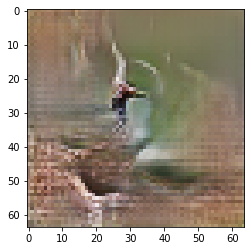

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 1

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.66821312904358 sec
Gen loss: 4.381134466750189, Gen valid loss: 1.2062526333945875, Gen attr loss: 1.614814978951038, Gen caption loss: 1.5600668466511134, Disc valid loss: 1.094042189883669, Disc valid real loss: 0.5786513165245212, Disc valid fake loss: 0.5153908750552149, Disc attr loss: 3.206541977923737, Disc attr real loss: 1.591726998972699, Disc attr fake loss: 1.614814978951038
Time for epoch 2 is 38.489195585250854 sec
Gen loss: 4.4006512817651595, Gen valid loss: 1.2313454755276523, Gen attr loss: 1.610722746629379, Gen caption loss: 1.5585830579928266, Disc valid loss: 1.0805986152108769, Disc valid real loss: 0.5763752083306714, Disc valid fake loss: 0.504223408010917, Disc attr loss: 3.201619194775093, Disc attr real loss: 1.590896448145714, Disc attr fake loss: 1.610722746629379
Time for epoch 3 is 38.845224142074585 sec
Gen loss: 4.3

Time for epoch 21 is 38.51369309425354 sec
Gen loss: 4.3853650009082905, Gen valid loss: 1.2181815211042801, Gen attr loss: 1.610714203943082, Gen caption loss: 1.5564692789300025, Disc valid loss: 1.101347057153862, Disc valid real loss: 0.583689937181266, Disc valid fake loss: 0.5176571185995893, Disc attr loss: 3.19683896881455, Disc attr real loss: 1.586124764871468, Disc attr fake loss: 1.610714203943082
Time for epoch 22 is 38.52590489387512 sec
Gen loss: 4.379692933100672, Gen valid loss: 1.2179459115354025, Gen attr loss: 1.6065445243504635, Gen caption loss: 1.5552025041606046, Disc valid loss: 1.091432658475912, Disc valid real loss: 0.5742646571258866, Disc valid fake loss: 0.5171680015115557, Disc attr loss: 3.193633759894022, Disc attr real loss: 1.5870892355435586, Disc attr fake loss: 1.6065445243504635
Time for epoch 23 is 38.59061789512634 sec
Gen loss: 4.389780588589386, Gen valid loss: 1.2196438971573744, Gen attr loss: 1.6125015970168075, Gen caption loss: 1.5576351

Time for epoch 41 is 38.50068712234497 sec
Gen loss: 4.385388924177423, Gen valid loss: 1.2162057448854937, Gen attr loss: 1.6119359557221575, Gen caption loss: 1.5572472235697719, Disc valid loss: 1.0957729033015284, Disc valid real loss: 0.5778852625267938, Disc valid fake loss: 0.5178876406132045, Disc attr loss: 3.192651385537331, Disc attr real loss: 1.5807154298151735, Disc attr fake loss: 1.6119359557221575
Time for epoch 42 is 38.5759551525116 sec
Gen loss: 4.40147770775689, Gen valid loss: 1.2380127344674212, Gen attr loss: 1.6077420889200558, Gen caption loss: 1.5557228814618698, Disc valid loss: 1.0749909197734946, Disc valid real loss: 0.5633796227333668, Disc valid fake loss: 0.5116112984938996, Disc attr loss: 3.1887250447337867, Disc attr real loss: 1.580982955813731, Disc attr fake loss: 1.6077420889200558
Time for epoch 43 is 38.54842734336853 sec
Gen loss: 4.371627025164886, Gen valid loss: 1.2105935017267864, Gen attr loss: 1.6079569353966856, Gen caption loss: 1.553

Time for epoch 61 is 38.504358768463135 sec
Gen loss: 4.3599932310057845, Gen valid loss: 1.2017602917301622, Gen attr loss: 1.604924896222143, Gen caption loss: 1.5533080446687817, Disc valid loss: 1.1023507804728458, Disc valid real loss: 0.5802557160699271, Disc valid fake loss: 0.5220950634337376, Disc attr loss: 3.1822631801693095, Disc attr real loss: 1.5773382839471668, Disc attr fake loss: 1.604924896222143
Time for epoch 62 is 38.52998375892639 sec
Gen loss: 4.384548420505472, Gen valid loss: 1.2230264140661493, Gen attr loss: 1.602975589473073, Gen caption loss: 1.5585464329577396, Disc valid loss: 1.088475107015956, Disc valid real loss: 0.5727936346033401, Disc valid fake loss: 0.515681472412616, Disc attr loss: 3.1793076788506855, Disc attr real loss: 1.5763320893776127, Disc attr fake loss: 1.602975589473073
Time for epoch 63 is 38.55662250518799 sec
Gen loss: 4.360453205703074, Gen valid loss: 1.1989363567615912, Gen attr loss: 1.6055229999185578, Gen caption loss: 1.555

Time for epoch 81 is 38.517582178115845 sec
Gen loss: 4.361161856147332, Gen valid loss: 1.1974609348832108, Gen attr loss: 1.6073405855716405, Gen caption loss: 1.556360341669098, Disc valid loss: 1.1054369766860797, Disc valid real loss: 0.5822415026384318, Disc valid fake loss: 0.5231954746937687, Disc attr loss: 3.180647093429152, Disc attr real loss: 1.5733065078575112, Disc attr fake loss: 1.6073405855716405
Time for epoch 82 is 38.595921993255615 sec
Gen loss: 4.3496346628762845, Gen valid loss: 1.1913075435775404, Gen attr loss: 1.6055952837150596, Gen caption loss: 1.5527318305762479, Disc valid loss: 1.1086600448704025, Disc valid real loss: 0.5824742999664814, Disc valid fake loss: 0.5261857460346325, Disc attr loss: 3.1779395962149146, Disc attr real loss: 1.5723443124998553, Disc attr fake loss: 1.6055952837150596
Time for epoch 83 is 38.5061309337616 sec
Gen loss: 4.3521580133980855, Gen valid loss: 1.1924223408789492, Gen attr loss: 1.6047234958426415, Gen caption loss: 

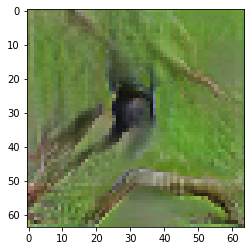

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 2

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.166175842285156 sec
Gen loss: 4.342751259403177, Gen valid loss: 1.1899232748078137, Gen attr loss: 1.6000475812410597, Gen caption loss: 1.5527804091693909, Disc valid loss: 1.1088064422775414, Disc valid real loss: 0.5783363470863198, Disc valid fake loss: 0.530470097129584, Disc attr loss: 3.1691209174753205, Disc attr real loss: 1.5690733362342606, Disc attr fake loss: 1.6000475812410597
Time for epoch 2 is 38.60709547996521 sec
Gen loss: 4.355067934770248, Gen valid loss: 1.194291790003376, Gen attr loss: 1.607329121773159, Gen caption loss: 1.5534470165325052, Disc valid loss: 1.0996277619829669, Disc valid real loss: 0.5803063200095159, Disc valid fake loss: 0.5193214412465651, Disc attr loss: 3.175275438523228, Disc attr real loss: 1.567946316750069, Disc attr fake loss: 1.607329121773159
Time for epoch 3 is 38.23495101928711 sec
Gen loss: 4

Time for epoch 21 is 38.37898921966553 sec
Gen loss: 4.357367739121766, Gen valid loss: 1.1956230792895888, Gen attr loss: 1.605190894468044, Gen caption loss: 1.5565537702100387, Disc valid loss: 1.107840754475374, Disc valid real loss: 0.5817041568316741, Disc valid fake loss: 0.5261365990974716, Disc attr loss: 3.170008054593714, Disc attr real loss: 1.5648171601256704, Disc attr fake loss: 1.605190894468044
Time for epoch 22 is 38.388118505477905 sec
Gen loss: 4.361194597027166, Gen valid loss: 1.2046017871316532, Gen attr loss: 1.6042559027348753, Gen caption loss: 1.5523369111988925, Disc valid loss: 1.1066198235927882, Disc valid real loss: 0.573947996870289, Disc valid fake loss: 0.5326718232495998, Disc attr loss: 3.169270905698864, Disc attr real loss: 1.5650150029639887, Disc attr fake loss: 1.6042559027348753
Time for epoch 23 is 38.44811010360718 sec
Gen loss: 4.358713529943451, Gen valid loss: 1.1999614854169085, Gen attr loss: 1.6046349957060362, Gen caption loss: 1.5541

Time for epoch 41 is 38.36712956428528 sec
Gen loss: 4.338921301410127, Gen valid loss: 1.18151633865465, Gen attr loss: 1.605207610905655, Gen caption loss: 1.5521973639645874, Disc valid loss: 1.1175357235802545, Disc valid real loss: 0.5876596809079654, Disc valid fake loss: 0.5298760385532689, Disc attr loss: 3.166575827572727, Disc attr real loss: 1.561368216667072, Disc attr fake loss: 1.605207610905655
Time for epoch 42 is 38.41335678100586 sec
Gen loss: 4.351722216541528, Gen valid loss: 1.194625956902336, Gen attr loss: 1.6046545295534418, Gen caption loss: 1.5524417342855354, Disc valid loss: 1.106703398673515, Disc valid real loss: 0.5791239166647438, Disc valid fake loss: 0.5275794786166369, Disc attr loss: 3.1656814920223826, Disc attr real loss: 1.5610269624689408, Disc attr fake loss: 1.6046545295534418
Time for epoch 43 is 38.35730504989624 sec
Gen loss: 4.353533057339469, Gen valid loss: 1.200019297399495, Gen attr loss: 1.60303563380306, Gen caption loss: 1.5504781149

Time for epoch 61 is 38.392457008361816 sec
Gen loss: 4.356910186085274, Gen valid loss: 1.1934061014878394, Gen attr loss: 1.6065014229234318, Gen caption loss: 1.5570026539205535, Disc valid loss: 1.116827566449235, Disc valid real loss: 0.5826919860633085, Disc valid fake loss: 0.5341355814358729, Disc attr loss: 3.165325900726525, Disc attr real loss: 1.5588244778030933, Disc attr fake loss: 1.6065014229234318
Time for epoch 62 is 38.323986530303955 sec
Gen loss: 4.358615964408813, Gen valid loss: 1.1982963910593896, Gen attr loss: 1.6064476718101397, Gen caption loss: 1.5538718836094305, Disc valid loss: 1.1038336992909914, Disc valid real loss: 0.5757322951868621, Disc valid fake loss: 0.5281014055579012, Disc attr loss: 3.1647521906751925, Disc attr real loss: 1.5583045188650528, Disc attr fake loss: 1.6064476718101397
Time for epoch 63 is 38.46274375915527 sec
Gen loss: 4.357037539727642, Gen valid loss: 1.1996698478050025, Gen attr loss: 1.6045779080248783, Gen caption loss: 1

Time for epoch 81 is 38.36930799484253 sec
Gen loss: 4.366339662210728, Gen valid loss: 1.2059211939330992, Gen attr loss: 1.6050935935198776, Gen caption loss: 1.5553248959182078, Disc valid loss: 1.1080186846779614, Disc valid real loss: 0.5777414488760113, Disc valid fake loss: 0.5302772366903662, Disc attr loss: 3.1599058533102515, Disc attr real loss: 1.554812259790374, Disc attr fake loss: 1.6050935935198776
Time for epoch 82 is 38.405841588974 sec
Gen loss: 4.367783715731406, Gen valid loss: 1.212273226036289, Gen attr loss: 1.6033952914602387, Gen caption loss: 1.5521152206875768, Disc valid loss: 1.0977531333925925, Disc valid real loss: 0.5718674363321082, Disc valid fake loss: 0.5258856992411419, Disc attr loss: 3.158182156764395, Disc attr real loss: 1.554786865304156, Disc attr fake loss: 1.6033952914602387
Time for epoch 83 is 38.38331913948059 sec
Gen loss: 4.3686561539244195, Gen valid loss: 1.2202276014054048, Gen attr loss: 1.6008502965374045, Gen caption loss: 1.5475

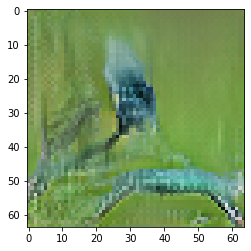

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 3

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.41741752624512 sec
Gen loss: 4.356471549527755, Gen valid loss: 1.206548208305183, Gen attr loss: 1.6007715822235355, Gen caption loss: 1.5491517585144456, Disc valid loss: 1.1105959357284918, Disc valid real loss: 0.5780174873547179, Disc valid fake loss: 0.5325784482122436, Disc attr loss: 3.1523657433062713, Disc attr real loss: 1.5515941610827355, Disc attr fake loss: 1.6007715822235355
Time for epoch 2 is 38.45460748672485 sec
Gen loss: 4.364624316130227, Gen valid loss: 1.2126258572911828, Gen attr loss: 1.6017143277294914, Gen caption loss: 1.5502841336940363, Disc valid loss: 1.0995933780179115, Disc valid real loss: 0.5753147420359821, Disc valid fake loss: 0.5242786370318756, Disc attr loss: 3.1527491513952652, Disc attr real loss: 1.551034823665774, Disc attr fake loss: 1.6017143277294914
Time for epoch 3 is 38.358187437057495 sec
Gen los

Time for epoch 21 is 38.33433651924133 sec
Gen loss: 4.384586601722531, Gen valid loss: 1.2246637903254853, Gen attr loss: 1.6049455413973428, Gen caption loss: 1.5549772674152198, Disc valid loss: 1.10177526612915, Disc valid real loss: 0.5761028140541015, Disc valid fake loss: 0.525672450055921, Disc attr loss: 3.153649288464368, Disc attr real loss: 1.548703747067025, Disc attr fake loss: 1.6049455413973428
Time for epoch 22 is 38.37350583076477 sec
Gen loss: 4.361559665623073, Gen valid loss: 1.2146039430688067, Gen attr loss: 1.6002854774314859, Gen caption loss: 1.5466702527146998, Disc valid loss: 1.1013880554576554, Disc valid real loss: 0.5733939498905244, Disc valid fake loss: 0.5279941051633055, Disc attr loss: 3.1490408812111954, Disc attr real loss: 1.5487554037797095, Disc attr fake loss: 1.6002854774314859
Time for epoch 23 is 38.40968656539917 sec
Gen loss: 4.371143229285553, Gen valid loss: 1.2147343775767299, Gen attr loss: 1.6036057866362698, Gen caption loss: 1.5528

Time for epoch 41 is 38.32107090950012 sec
Gen loss: 4.3566530513246535, Gen valid loss: 1.2121238193214747, Gen attr loss: 1.598331796767589, Gen caption loss: 1.5461974567191064, Disc valid loss: 1.1048722149233832, Disc valid real loss: 0.575650196976778, Disc valid fake loss: 0.5292220154832695, Disc attr loss: 3.1443947059352224, Disc attr real loss: 1.5460629091676334, Disc attr fake loss: 1.598331796767589
Time for epoch 42 is 38.344523906707764 sec
Gen loss: 4.364142803641839, Gen valid loss: 1.2132613624983686, Gen attr loss: 1.6009032913662877, Gen caption loss: 1.5499781405699609, Disc valid loss: 1.1021229232229837, Disc valid real loss: 0.5758925262828506, Disc valid fake loss: 0.5262303950825358, Disc attr loss: 3.14688398489138, Disc attr real loss: 1.5459806935250922, Disc attr fake loss: 1.6009032913662877
Time for epoch 43 is 38.35302972793579 sec
Gen loss: 4.363616593161896, Gen valid loss: 1.2143250886340775, Gen attr loss: 1.6007362084013983, Gen caption loss: 1.54

Time for epoch 61 is 38.27073860168457 sec
Gen loss: 4.36526900965993, Gen valid loss: 1.2100002575049877, Gen attr loss: 1.6048634750087087, Gen caption loss: 1.5504052748848107, Disc valid loss: 1.1126088545251345, Disc valid real loss: 0.577458914137145, Disc valid fake loss: 0.5351499385303922, Disc attr loss: 3.148568279374906, Disc attr real loss: 1.543704804366197, Disc attr fake loss: 1.6048634750087087
Time for epoch 62 is 38.31846642494202 sec
Gen loss: 4.346710406021697, Gen valid loss: 1.2032437427903255, Gen attr loss: 1.595975359280904, Gen caption loss: 1.5474913058888298, Disc valid loss: 1.1045278055558037, Disc valid real loss: 0.5779452598514919, Disc valid fake loss: 0.5265825472388487, Disc attr loss: 3.1386958845262605, Disc attr real loss: 1.5427205252453564, Disc attr fake loss: 1.595975359280904
Time for epoch 63 is 38.27403163909912 sec
Gen loss: 4.3634147308060145, Gen valid loss: 1.2056346530836772, Gen attr loss: 1.6027409051491963, Gen caption loss: 1.5550

Time for epoch 81 is 38.35310506820679 sec
Gen loss: 4.369845596432363, Gen valid loss: 1.2240814472924726, Gen attr loss: 1.5994349217350243, Gen caption loss: 1.5463292178745838, Disc valid loss: 1.0988896999578812, Disc valid real loss: 0.5690920880331902, Disc valid fake loss: 0.5297976143476439, Disc attr loss: 3.141821410274764, Disc attr real loss: 1.5423864885397396, Disc attr fake loss: 1.5994349217350243
Time for epoch 82 is 38.382975816726685 sec
Gen loss: 4.3782579162256505, Gen valid loss: 1.2242879907936262, Gen attr loss: 1.602400998112955, Gen caption loss: 1.5515689219885724, Disc valid loss: 1.0930038081598152, Disc valid real loss: 0.5708682002413886, Disc valid fake loss: 0.5221356078376614, Disc attr loss: 3.1439393060963328, Disc attr real loss: 1.5415383079833778, Disc attr fake loss: 1.602400998112955
Time for epoch 83 is 38.35335063934326 sec
Gen loss: 4.381208847531782, Gen valid loss: 1.2279897080204352, Gen attr loss: 1.6014334822734844, Gen caption loss: 1.

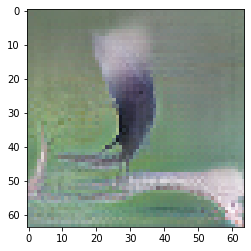

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 4

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.37337398529053 sec
Gen loss: 4.380368772884048, Gen valid loss: 1.224377752965705, Gen attr loss: 1.60377078973827, Gen caption loss: 1.5522202447177917, Disc valid loss: 1.0992065356352787, Disc valid real loss: 0.5720459636310898, Disc valid fake loss: 0.5271605702273567, Disc attr loss: 3.1441041925735265, Disc attr real loss: 1.5403334028352567, Disc attr fake loss: 1.60377078973827
Time for epoch 2 is 38.82776141166687 sec
Gen loss: 4.379106836913401, Gen valid loss: 1.225472218460507, Gen attr loss: 1.6040052698879708, Gen caption loss: 1.5496293648794737, Disc valid loss: 1.0913405799607274, Disc valid real loss: 0.5669900669961118, Disc valid fake loss: 0.5243505149029781, Disc attr loss: 3.143710742797955, Disc attr real loss: 1.5397054729099842, Disc attr fake loss: 1.6040052698879708
Time for epoch 3 is 38.638615131378174 sec
Gen loss: 4.

Time for epoch 21 is 38.55801033973694 sec
Gen loss: 4.373216534048561, Gen valid loss: 1.2211596880178788, Gen attr loss: 1.6009458019158382, Gen caption loss: 1.551111036845985, Disc valid loss: 1.106412643501106, Disc valid real loss: 0.5736687740659326, Disc valid fake loss: 0.5327438662853344, Disc attr loss: 3.1392510069741144, Disc attr real loss: 1.5383052050582762, Disc attr fake loss: 1.6009458019158382
Time for epoch 22 is 38.59702515602112 sec
Gen loss: 4.401182614044768, Gen valid loss: 1.2419473084653943, Gen attr loss: 1.60697797708072, Gen caption loss: 1.5522573330215, Disc valid loss: 1.0885833653654187, Disc valid real loss: 0.5615186336725385, Disc valid fake loss: 0.5270647296737526, Disc attr loss: 3.145238154625828, Disc attr real loss: 1.5382601775451081, Disc attr fake loss: 1.60697797708072
Time for epoch 23 is 38.60183644294739 sec
Gen loss: 4.391518282050363, Gen valid loss: 1.2378225019630702, Gen attr loss: 1.6023756979603754, Gen caption loss: 1.551320075

Time for epoch 41 is 38.641910552978516 sec
Gen loss: 4.3745295167938485, Gen valid loss: 1.2264121707861986, Gen attr loss: 1.5996295569065786, Gen caption loss: 1.548487789908722, Disc valid loss: 1.1054189802831427, Disc valid real loss: 0.5752287926228066, Disc valid fake loss: 0.5301901878218663, Disc attr loss: 3.1361796439178593, Disc attr real loss: 1.5365500870112805, Disc attr fake loss: 1.5996295569065786
Time for epoch 42 is 38.56416440010071 sec
Gen loss: 4.360431347436052, Gen valid loss: 1.2110605982907097, Gen attr loss: 1.603141047444124, Gen caption loss: 1.5462296865173795, Disc valid loss: 1.097413841463363, Disc valid real loss: 0.5693899618416298, Disc valid fake loss: 0.5280238821254513, Disc attr loss: 3.1397692724295103, Disc attr real loss: 1.5366282249853862, Disc attr fake loss: 1.603141047444124
Time for epoch 43 is 38.58812093734741 sec
Gen loss: 4.388247734808987, Gen valid loss: 1.2241448551658693, Gen attr loss: 1.6086059278912015, Gen caption loss: 1.5

Time for epoch 61 is 38.54626393318176 sec
Gen loss: 4.367401536564194, Gen valid loss: 1.2206126115509488, Gen attr loss: 1.6000799793538039, Gen caption loss: 1.546708955997374, Disc valid loss: 1.1045652972004278, Disc valid real loss: 0.5701371498385742, Disc valid fake loss: 0.5344281446158401, Disc attr loss: 3.1351494646976956, Disc attr real loss: 1.5350694853438918, Disc attr fake loss: 1.6000799793538039
Time for epoch 62 is 38.567211627960205 sec
Gen loss: 4.386477587345816, Gen valid loss: 1.2335168934126857, Gen attr loss: 1.6020591578832486, Gen caption loss: 1.5509015383113045, Disc valid loss: 1.0872315591589867, Disc valid real loss: 0.5652547541672621, Disc valid fake loss: 0.5219768066070267, Disc attr loss: 3.137453255614614, Disc attr real loss: 1.5353940977313654, Disc attr fake loss: 1.6020591578832486
Time for epoch 63 is 38.63460922241211 sec
Gen loss: 4.37723886675951, Gen valid loss: 1.2258950662483692, Gen attr loss: 1.60157926328137, Gen caption loss: 1.549

Time for epoch 81 is 38.59780025482178 sec
Gen loss: 4.374937843178023, Gen valid loss: 1.2161420628953432, Gen attr loss: 1.605273822458779, Gen caption loss: 1.5535219568547194, Disc valid loss: 1.101714021306697, Disc valid real loss: 0.5711810152705122, Disc valid fake loss: 0.5305330071668961, Disc attr loss: 3.1390101689956373, Disc attr real loss: 1.5337363465368585, Disc attr fake loss: 1.605273822458779
Time for epoch 82 is 38.621655225753784 sec
Gen loss: 4.382298209156771, Gen valid loss: 1.2271223557673818, Gen attr loss: 1.6019359659050216, Gen caption loss: 1.5532398902303803, Disc valid loss: 1.0934151638814105, Disc valid real loss: 0.5684325850914488, Disc valid fake loss: 0.524982580647559, Disc attr loss: 3.136626223238503, Disc attr real loss: 1.5346902573334815, Disc attr fake loss: 1.6019359659050216
Time for epoch 83 is 38.593101024627686 sec
Gen loss: 4.3793736615478185, Gen valid loss: 1.2286746178862202, Gen attr loss: 1.6031529312211323, Gen caption loss: 1.5

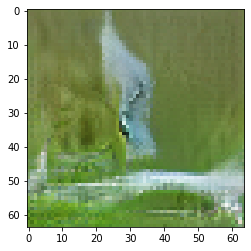

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 5

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.556517124176025 sec
Gen loss: 4.376531009105486, Gen valid loss: 1.2277180400644214, Gen attr loss: 1.5985416923435076, Gen caption loss: 1.5502712901045637, Disc valid loss: 1.0954461903752997, Disc valid real loss: 0.5666351076064071, Disc valid fake loss: 0.5288110830919529, Disc attr loss: 3.131601802055752, Disc attr real loss: 1.533060109712244, Disc attr fake loss: 1.5985416923435076
Time for epoch 2 is 38.68854570388794 sec
Gen loss: 4.395729804749735, Gen valid loss: 1.2434837068645612, Gen attr loss: 1.603625412555891, Gen caption loss: 1.5486206682070807, Disc valid loss: 1.100340168489027, Disc valid real loss: 0.5640659385580358, Disc valid fake loss: 0.5362742309405552, Disc attr loss: 3.13616226746784, Disc attr real loss: 1.532536854911949, Disc attr fake loss: 1.603625412555891
Time for epoch 3 is 38.372706174850464 sec
Gen loss: 4.

Time for epoch 21 is 39.103121280670166 sec
Gen loss: 4.392544931835598, Gen valid loss: 1.2412097580064603, Gen attr loss: 1.6022924446478122, Gen caption loss: 1.5490427411345609, Disc valid loss: 1.098017578525595, Disc valid real loss: 0.566136592125828, Disc valid fake loss: 0.5318809868843575, Disc attr loss: 3.1342903747145074, Disc attr real loss: 1.5319979300666955, Disc attr fake loss: 1.6022924446478122
Time for epoch 22 is 38.62325310707092 sec
Gen loss: 4.393353946809846, Gen valid loss: 1.2421077481776395, Gen attr loss: 1.6035445024004473, Gen caption loss: 1.5477016951010478, Disc valid loss: 1.0893164146237257, Disc valid real loss: 0.5622517835641618, Disc valid fake loss: 0.527064629605792, Disc attr loss: 3.1351039729467254, Disc attr real loss: 1.5315594705462778, Disc attr fake loss: 1.6035445024004473
Time for epoch 23 is 38.6174795627594 sec
Gen loss: 4.384281339361093, Gen valid loss: 1.233793603695505, Gen attr loss: 1.6018428314669022, Gen caption loss: 1.548

Time for epoch 41 is 38.67712593078613 sec
Gen loss: 4.383015568663434, Gen valid loss: 1.2358908473960752, Gen attr loss: 1.5984757657296613, Gen caption loss: 1.5486489611912548, Disc valid loss: 1.0960443118400367, Disc valid real loss: 0.5701257613939321, Disc valid fake loss: 0.5259185504461046, Disc attr loss: 3.129327251982237, Disc attr real loss: 1.5308514862525753, Disc attr fake loss: 1.5984757657296613
Time for epoch 42 is 38.608439445495605 sec
Gen loss: 4.386995381456081, Gen valid loss: 1.242953526618358, Gen attr loss: 1.5965743216718762, Gen caption loss: 1.547467532196665, Disc valid loss: 1.0913706027718417, Disc valid real loss: 0.5646863414181603, Disc valid fake loss: 0.5266842598999096, Disc attr loss: 3.127928476669601, Disc attr real loss: 1.5313541549977248, Disc attr fake loss: 1.5965743216718762
Time for epoch 43 is 38.65286374092102 sec
Gen loss: 4.398498300614396, Gen valid loss: 1.2335786449553843, Gen attr loss: 1.6087887222527812, Gen caption loss: 1.55

Time for epoch 61 is 38.62216806411743 sec
Gen loss: 4.376647931773488, Gen valid loss: 1.23111847115726, Gen attr loss: 1.5959740831923033, Gen caption loss: 1.5495553905078712, Disc valid loss: 1.1043003224098908, Disc valid real loss: 0.5750483125044401, Disc valid fake loss: 0.5292520094208601, Disc attr loss: 3.1263559365337135, Disc attr real loss: 1.5303818533414102, Disc attr fake loss: 1.5959740831923033
Time for epoch 62 is 38.67598748207092 sec
Gen loss: 4.385003459485889, Gen valid loss: 1.2350276052790283, Gen attr loss: 1.6006161116649142, Gen caption loss: 1.549359742218886, Disc valid loss: 1.093790833058396, Disc valid real loss: 0.5679986165144902, Disc valid fake loss: 0.5257922178361474, Disc attr loss: 3.130078818416854, Disc attr real loss: 1.5294627067519397, Disc attr fake loss: 1.6006161116649142
Time for epoch 63 is 38.67017722129822 sec
Gen loss: 4.391012881183366, Gen valid loss: 1.2423230028410914, Gen attr loss: 1.6001469087471485, Gen caption loss: 1.5485

Time for epoch 81 is 38.70125222206116 sec
Gen loss: 4.371619161228501, Gen valid loss: 1.229601434575833, Gen attr loss: 1.5958533403350086, Gen caption loss: 1.5461643859945984, Disc valid loss: 1.1042514149412552, Disc valid real loss: 0.5723080474348249, Disc valid fake loss: 0.5319433682333163, Disc attr loss: 3.124721350708628, Disc attr real loss: 1.5288680103736194, Disc attr fake loss: 1.5958533403350086
Time for epoch 82 is 38.6432421207428 sec
Gen loss: 4.385272328446551, Gen valid loss: 1.2377218634778568, Gen attr loss: 1.59838078855499, Gen caption loss: 1.549169692243664, Disc valid loss: 1.0954963868549523, Disc valid real loss: 0.5670245152501879, Disc valid fake loss: 0.5284718707163483, Disc attr loss: 3.1274283361951833, Disc attr real loss: 1.529047547640193, Disc attr fake loss: 1.59838078855499
Time for epoch 83 is 38.655198097229004 sec
Gen loss: 4.381905853586791, Gen valid loss: 1.2284615719867593, Gen attr loss: 1.6025689633558113, Gen caption loss: 1.5508753

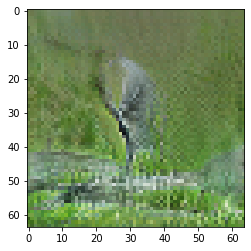

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 6

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.63899564743042 sec
Gen loss: 4.429946714623511, Gen valid loss: 1.27866948103194, Gen attr loss: 1.6016927618321364, Gen caption loss: 1.5495844769284008, Disc valid loss: 1.084068002093452, Disc valid real loss: 0.5629841659450272, Disc valid fake loss: 0.5210838385309954, Disc attr loss: 3.129807618252307, Disc attr real loss: 1.5281148564201708, Disc attr fake loss: 1.6016927618321364
Time for epoch 2 is 38.41229796409607 sec
Gen loss: 4.380142030354115, Gen valid loss: 1.2334311754722906, Gen attr loss: 1.6001660029093425, Gen caption loss: 1.5465448493879985, Disc valid loss: 1.1008118206892556, Disc valid real loss: 0.5732760750019776, Disc valid fake loss: 0.5275357455257478, Disc attr loss: 3.1284471789026647, Disc attr real loss: 1.5282811759933224, Disc attr fake loss: 1.6001660029093425
Time for epoch 3 is 38.77544569969177 sec
Gen loss: 

Time for epoch 21 is 38.87420439720154 sec
Gen loss: 4.4035087756025115, Gen valid loss: 1.248320056978603, Gen attr loss: 1.603199055201316, Gen caption loss: 1.5519896635841224, Disc valid loss: 1.0940800620934505, Disc valid real loss: 0.5652109306194595, Disc valid fake loss: 0.5288691305048098, Disc attr loss: 3.1305749332355615, Disc attr real loss: 1.5273758780342455, Disc attr fake loss: 1.603199055201316
Time for epoch 22 is 38.47625160217285 sec
Gen loss: 4.3956549710374535, Gen valid loss: 1.2425274894166445, Gen attr loss: 1.6016758215136644, Gen caption loss: 1.5514516565534804, Disc valid loss: 1.0927098222218232, Disc valid real loss: 0.5698502973973912, Disc valid fake loss: 0.5228595260359085, Disc attr loss: 3.12904694894465, Disc attr real loss: 1.5273711274309856, Disc attr fake loss: 1.6016758215136644
Time for epoch 23 is 38.8030149936676 sec
Gen loss: 4.40336448002637, Gen valid loss: 1.2497796450203997, Gen attr loss: 1.6016053907916474, Gen caption loss: 1.5519

Time for epoch 41 is 38.60844087600708 sec
Gen loss: 4.388486868643826, Gen valid loss: 1.250670101745988, Gen attr loss: 1.5959085038683924, Gen caption loss: 1.5419082557605857, Disc valid loss: 1.0871873864636512, Disc valid real loss: 0.562059705900306, Disc valid fake loss: 0.5251276771712109, Disc attr loss: 3.123242918391861, Disc attr real loss: 1.5273344145234684, Disc attr fake loss: 1.5959085038683924
Time for epoch 42 is 38.61163783073425 sec
Gen loss: 4.385789633443362, Gen valid loss: 1.2409654440595528, Gen attr loss: 1.5971018085634805, Gen caption loss: 1.5477223783973757, Disc valid loss: 1.097375599187887, Disc valid real loss: 0.5652334390455468, Disc valid fake loss: 0.5321421603846356, Disc attr loss: 3.1242468050178798, Disc attr real loss: 1.527144996454399, Disc attr fake loss: 1.5971018085634805
Time for epoch 43 is 38.66025447845459 sec
Gen loss: 4.382956256065265, Gen valid loss: 1.2335327109347192, Gen attr loss: 1.6003086043567192, Gen caption loss: 1.5491

Time for epoch 61 is 38.65842008590698 sec
Gen loss: 4.394449754782163, Gen valid loss: 1.240553808729177, Gen attr loss: 1.6001545420184045, Gen caption loss: 1.5537413972503125, Disc valid loss: 1.0988670081950138, Disc valid real loss: 0.5668924177888286, Disc valid fake loss: 0.5319745901638899, Disc attr loss: 3.1271316178122834, Disc attr real loss: 1.5269770757938788, Disc attr fake loss: 1.6001545420184045
Time for epoch 62 is 39.1018705368042 sec
Gen loss: 4.393508850397456, Gen valid loss: 1.2463342213049167, Gen attr loss: 1.598240702455929, Gen caption loss: 1.5489339259904897, Disc valid loss: 1.0941729167612588, Disc valid real loss: 0.5635962381272458, Disc valid fake loss: 0.530576681056966, Disc attr loss: 3.1247102209546056, Disc attr real loss: 1.5264695184986765, Disc attr fake loss: 1.598240702455929
Time for epoch 63 is 38.674699783325195 sec
Gen loss: 4.385658948402095, Gen valid loss: 1.2360336224884199, Gen attr loss: 1.6029289401966704, Gen caption loss: 1.546

Time for epoch 81 is 38.42271304130554 sec
Gen loss: 4.397042883767022, Gen valid loss: 1.245649423379562, Gen attr loss: 1.60199578829251, Gen caption loss: 1.5493976743563727, Disc valid loss: 1.0938044678228012, Disc valid real loss: 0.5660440922591098, Disc valid fake loss: 0.5277603758059866, Disc attr loss: 3.1280382629332504, Disc attr real loss: 1.5260424746407404, Disc attr fake loss: 1.60199578829251
Time for epoch 82 is 38.76554226875305 sec
Gen loss: 4.399773198414624, Gen valid loss: 1.2501891583285034, Gen attr loss: 1.5996771133365992, Gen caption loss: 1.5499069186730114, Disc valid loss: 1.0822764925840425, Disc valid real loss: 0.5580846089819259, Disc valid fake loss: 0.524191885621244, Disc attr loss: 3.124955338514271, Disc attr real loss: 1.5252782251776718, Disc attr fake loss: 1.5996771133365992
Time for epoch 83 is 38.32660531997681 sec
Gen loss: 4.389408794521962, Gen valid loss: 1.2399455987341035, Gen attr loss: 1.5998112005269947, Gen caption loss: 1.549652

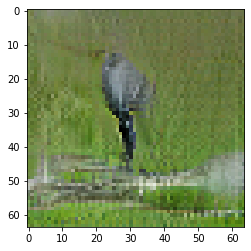

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 7

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.29521822929382 sec
Gen loss: 4.396862489421193, Gen valid loss: 1.24665610706257, Gen attr loss: 1.6006892367107113, Gen caption loss: 1.5495171456479122, Disc valid loss: 1.0909559865631062, Disc valid real loss: 0.5629794698582109, Disc valid fake loss: 0.5279765154934188, Disc attr loss: 3.1252661116401033, Disc attr real loss: 1.524576874929392, Disc attr fake loss: 1.6006892367107113
Time for epoch 2 is 38.58215832710266 sec
Gen loss: 4.385831044618353, Gen valid loss: 1.2421083308170804, Gen attr loss: 1.5988867299020453, Gen caption loss: 1.5448359771149591, Disc valid loss: 1.0954499965114646, Disc valid real loss: 0.5668437875060208, Disc valid fake loss: 0.5286062109438061, Disc attr loss: 3.1238086304367396, Disc attr real loss: 1.5249219005346943, Disc attr fake loss: 1.5988867299020453
Time for epoch 3 is 38.668360471725464 sec
Gen loss

Time for epoch 21 is 38.89797759056091 sec
Gen loss: 4.395707719048187, Gen valid loss: 1.2426578643199229, Gen attr loss: 1.6028761660180442, Gen caption loss: 1.5501736854796164, Disc valid loss: 1.0965753559497637, Disc valid real loss: 0.5644565017081211, Disc valid fake loss: 0.5321188535955217, Disc attr loss: 3.127629199648291, Disc attr real loss: 1.524753033630247, Disc attr fake loss: 1.6028761660180442
Time for epoch 22 is 38.889002561569214 sec
Gen loss: 4.391537409164719, Gen valid loss: 1.247049535677685, Gen attr loss: 1.5962985876776015, Gen caption loss: 1.5481893034162237, Disc valid loss: 1.0914108449527564, Disc valid real loss: 0.5599412889015384, Disc valid fake loss: 0.5314695579088154, Disc attr loss: 3.1207418015332724, Disc attr real loss: 1.524443213855671, Disc attr fake loss: 1.5962985876776015
Time for epoch 23 is 38.87207841873169 sec
Gen loss: 4.399447728624835, Gen valid loss: 1.254424559391611, Gen attr loss: 1.5979361298284556, Gen caption loss: 1.547

Time for epoch 41 is 38.918920278549194 sec
Gen loss: 4.398014094448348, Gen valid loss: 1.2438153015565743, Gen attr loss: 1.6023262480733194, Gen caption loss: 1.5518725635559578, Disc valid loss: 1.092603329882066, Disc valid real loss: 0.5653888854554029, Disc valid fake loss: 0.5272144441843679, Disc attr loss: 3.1256422285788106, Disc attr real loss: 1.523315980505491, Disc attr fake loss: 1.6023262480733194
Time for epoch 42 is 38.98876595497131 sec
Gen loss: 4.389269415925189, Gen valid loss: 1.2397114555364055, Gen attr loss: 1.6006159320433289, Gen caption loss: 1.5489420212381255, Disc valid loss: 1.0911295837180077, Disc valid real loss: 0.5587517346146953, Disc valid fake loss: 0.5323778521723863, Disc attr loss: 3.1245096857308696, Disc attr real loss: 1.5238937536875408, Disc attr fake loss: 1.6006159320433289
Time for epoch 43 is 38.922911167144775 sec
Gen loss: 4.395575150564757, Gen valid loss: 1.2457616933316074, Gen attr loss: 1.6035810053187012, Gen caption loss: 1

Time for epoch 61 is 38.59708881378174 sec
Gen loss: 4.388941340976292, Gen valid loss: 1.2411307256396225, Gen attr loss: 1.5997145398845518, Gen caption loss: 1.548096073029164, Disc valid loss: 1.0984133932648636, Disc valid real loss: 0.5656024839496872, Disc valid fake loss: 0.5328109079421697, Disc attr loss: 3.122080604881452, Disc attr real loss: 1.5223660649969002, Disc attr fake loss: 1.5997145398845518
Time for epoch 62 is 38.6615309715271 sec
Gen loss: 4.393608344602714, Gen valid loss: 1.2455989590828336, Gen attr loss: 1.600045980799812, Gen caption loss: 1.5479634111812768, Disc valid loss: 1.0862554053303994, Disc valid real loss: 0.5602517186141596, Disc valid fake loss: 0.5260036893007232, Disc attr loss: 3.1220969016635967, Disc attr real loss: 1.5220509208637847, Disc attr fake loss: 1.600045980799812
Time for epoch 63 is 38.430909156799316 sec
Gen loss: 4.392171027537607, Gen valid loss: 1.2462836421602141, Gen attr loss: 1.59952096693561, Gen caption loss: 1.54636

Time for epoch 81 is 38.43464422225952 sec
Gen loss: 4.39170414322437, Gen valid loss: 1.243667649867412, Gen attr loss: 1.6012382743158315, Gen caption loss: 1.5467982137106298, Disc valid loss: 1.0928285278602021, Disc valid real loss: 0.5655899463791835, Disc valid fake loss: 0.5272385839847368, Disc attr loss: 3.122898797032633, Disc attr real loss: 1.5216605227168014, Disc attr fake loss: 1.6012382743158315
Time for epoch 82 is 38.42838954925537 sec
Gen loss: 4.3812118429478595, Gen valid loss: 1.2359998418386713, Gen attr loss: 1.598311132531825, Gen caption loss: 1.5469008771384634, Disc valid loss: 1.0976759528079976, Disc valid real loss: 0.566444456496536, Disc valid fake loss: 0.5312314958268711, Disc attr loss: 3.1203054451360934, Disc attr real loss: 1.5219943126042683, Disc attr fake loss: 1.598311132531825
Time for epoch 83 is 38.46880102157593 sec
Gen loss: 4.408805011733761, Gen valid loss: 1.2575204377251912, Gen attr loss: 1.6034668506322514, Gen caption loss: 1.5478

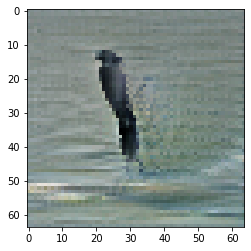

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 8

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.43440532684326 sec
Gen loss: 4.401967648891253, Gen valid loss: 1.2572875597935704, Gen attr loss: 1.5979666073470904, Gen caption loss: 1.546713483688954, Disc valid loss: 1.0903973503487543, Disc valid real loss: 0.5635174017773088, Disc valid fake loss: 0.5268799484906804, Disc attr loss: 3.1188043924528084, Disc attr real loss: 1.5208377851057182, Disc attr fake loss: 1.5979666073470904
Time for epoch 2 is 38.36082601547241 sec
Gen loss: 4.412552851002391, Gen valid loss: 1.264198900076755, Gen attr loss: 1.5980090122558883, Gen caption loss: 1.5503449517536938, Disc valid loss: 1.0825913086493164, Disc valid real loss: 0.5525298101630637, Disc valid fake loss: 0.5300615008284406, Disc attr loss: 3.1189249886406794, Disc attr real loss: 1.520915976384791, Disc attr fake loss: 1.5980090122558883
Time for epoch 3 is 38.39729309082031 sec
Gen loss:

Time for epoch 21 is 38.34210968017578 sec
Gen loss: 4.392237982452723, Gen valid loss: 1.2480282098620241, Gen attr loss: 1.598052114329041, Gen caption loss: 1.5461576560002355, Disc valid loss: 1.0998308928355292, Disc valid real loss: 0.5650466896977205, Disc valid fake loss: 0.5347842023301577, Disc attr loss: 3.11870531208793, Disc attr real loss: 1.520653197758889, Disc attr fake loss: 1.598052114329041
Time for epoch 22 is 38.39747929573059 sec
Gen loss: 4.403073986048298, Gen valid loss: 1.2533048693403641, Gen attr loss: 1.6018888730666825, Gen caption loss: 1.5478802405721772, Disc valid loss: 1.0882169286086953, Disc valid real loss: 0.5589758977495881, Disc valid fake loss: 0.5292410308591072, Disc attr loss: 3.1222975212060984, Disc attr real loss: 1.5204086481394161, Disc attr fake loss: 1.6018888730666825
Time for epoch 23 is 38.36811327934265 sec
Gen loss: 4.401109860195377, Gen valid loss: 1.248199848624749, Gen attr loss: 1.6011495289763784, Gen caption loss: 1.55176

Time for epoch 41 is 38.43168568611145 sec
Gen loss: 4.38731446692614, Gen valid loss: 1.2368753757580186, Gen attr loss: 1.599688293488045, Gen caption loss: 1.550750800910681, Disc valid loss: 1.0991837723145317, Disc valid real loss: 0.566044541151543, Disc valid fake loss: 0.5331392333436464, Disc attr loss: 3.119282514745304, Disc attr real loss: 1.5195942212572588, Disc attr fake loss: 1.599688293488045
Time for epoch 42 is 38.498403787612915 sec
Gen loss: 4.3846312770998574, Gen valid loss: 1.2479617187001195, Gen attr loss: 1.5929834862065508, Gen caption loss: 1.5436860668626904, Disc valid loss: 1.0942505670756828, Disc valid real loss: 0.5667441415431377, Disc valid fake loss: 0.5275064248056592, Disc attr loss: 3.112863310953466, Disc attr real loss: 1.519879824746915, Disc attr fake loss: 1.5929834862065508
Time for epoch 43 is 38.43388080596924 sec
Gen loss: 4.399979170744981, Gen valid loss: 1.2516320226638298, Gen attr loss: 1.6003843801131417, Gen caption loss: 1.54796

Time for epoch 61 is 38.61801242828369 sec
Gen loss: 4.389151903995008, Gen valid loss: 1.2420475020964294, Gen attr loss: 1.5995177605610875, Gen caption loss: 1.5475866445680944, Disc valid loss: 1.0925195650033512, Disc valid real loss: 0.5592524977880442, Disc valid fake loss: 0.5332670653577096, Disc attr loss: 3.1189368572338485, Disc attr real loss: 1.519419096672761, Disc attr fake loss: 1.5995177605610875
Time for epoch 62 is 38.56829047203064 sec
Gen loss: 4.402512605274273, Gen valid loss: 1.2492396522989764, Gen attr loss: 1.6022814134272134, Gen caption loss: 1.5509915342175864, Disc valid loss: 1.0909970120039736, Disc valid real loss: 0.5648823515347995, Disc valid fake loss: 0.5261146603076439, Disc attr loss: 3.121202043724577, Disc attr real loss: 1.5189206302973637, Disc attr fake loss: 1.6022814134272134
Time for epoch 63 is 38.53785800933838 sec
Gen loss: 4.395695794888629, Gen valid loss: 1.2553993860880535, Gen attr loss: 1.594246517028912, Gen caption loss: 1.54

Time for epoch 81 is 38.52943181991577 sec
Gen loss: 4.404399475754115, Gen valid loss: 1.2584036268839023, Gen attr loss: 1.5967207074488405, Gen caption loss: 1.549275135606285, Disc valid loss: 1.0963850300809554, Disc valid real loss: 0.5641107881456856, Disc valid fake loss: 0.5322742417737397, Disc attr loss: 3.114163990266278, Disc attr real loss: 1.5174432828174373, Disc attr fake loss: 1.5967207074488405
Time for epoch 82 is 38.53595042228699 sec
Gen loss: 4.374140479700352, Gen valid loss: 1.2360541831833238, Gen attr loss: 1.595028738019266, Gen caption loss: 1.5430575560748092, Disc valid loss: 1.0991653470489067, Disc valid real loss: 0.5659471394892953, Disc valid fake loss: 0.5332182052981885, Disc attr loss: 3.1124354197080866, Disc attr real loss: 1.5174066816888205, Disc attr fake loss: 1.595028738019266
Time for epoch 83 is 38.56245541572571 sec
Gen loss: 4.385022336551491, Gen valid loss: 1.2448448708386926, Gen attr loss: 1.5960348146717722, Gen caption loss: 1.544

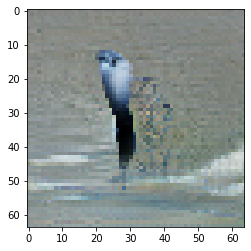

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 9

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.16873335838318 sec
Gen loss: 4.402171713226856, Gen valid loss: 1.2559562191407532, Gen attr loss: 1.5982106843291906, Gen caption loss: 1.5480048036187646, Disc valid loss: 1.09514696924344, Disc valid real loss: 0.5628653506276408, Disc valid fake loss: 0.5322816197465106, Disc attr loss: 3.1147842736748177, Disc attr real loss: 1.5165735893456271, Disc attr fake loss: 1.5982106843291906
Time for epoch 2 is 38.569923877716064 sec
Gen loss: 4.409707434455231, Gen valid loss: 1.2635922546632246, Gen attr loss: 1.5985995298478661, Gen caption loss: 1.547515649136489, Disc valid loss: 1.0811801735301652, Disc valid real loss: 0.5516739183163578, Disc valid fake loss: 0.5295062520639683, Disc attr loss: 3.115284442578551, Disc attr real loss: 1.5166849127306847, Disc attr fake loss: 1.5985995298478661
Time for epoch 3 is 38.53515315055847 sec
Gen loss:

Time for epoch 21 is 38.51801657676697 sec
Gen loss: 4.410613534250234, Gen valid loss: 1.2636727784384234, Gen attr loss: 1.598635877374065, Gen caption loss: 1.5483048740764298, Disc valid loss: 1.0909868528849387, Disc valid real loss: 0.5613702682621757, Disc valid fake loss: 0.5296165850265886, Disc attr loss: 3.1145424271017554, Disc attr real loss: 1.5159065497276907, Disc attr fake loss: 1.598635877374065
Time for epoch 22 is 38.43851041793823 sec
Gen loss: 4.414939058505423, Gen valid loss: 1.2555457032146815, Gen attr loss: 1.6042103382953137, Gen caption loss: 1.5551829893737628, Disc valid loss: 1.091001124724463, Disc valid real loss: 0.5622457171358713, Disc valid fake loss: 0.5287554097692495, Disc attr loss: 3.1197675831595735, Disc attr real loss: 1.5155572448642596, Disc attr fake loss: 1.6042103382953137
Time for epoch 23 is 38.553349018096924 sec
Gen loss: 4.4025204730873835, Gen valid loss: 1.2535377041434208, Gen attr loss: 1.596356715290204, Gen caption loss: 1.5

Time for epoch 41 is 38.56116080284119 sec
Gen loss: 4.407274926581034, Gen valid loss: 1.2575250402052551, Gen attr loss: 1.6004786371861692, Gen caption loss: 1.5492712430514617, Disc valid loss: 1.0918496367408008, Disc valid real loss: 0.55881740471858, Disc valid fake loss: 0.5330322315376302, Disc attr loss: 3.1151747031586603, Disc attr real loss: 1.514696065972491, Disc attr fake loss: 1.6004786371861692
Time for epoch 42 is 38.60118770599365 sec
Gen loss: 4.391908537081586, Gen valid loss: 1.2462431276393777, Gen attr loss: 1.5995966280055887, Gen caption loss: 1.5460687791751975, Disc valid loss: 1.0884457689313707, Disc valid real loss: 0.5580832101303711, Disc valid fake loss: 0.5303625602547716, Disc attr loss: 3.114624837549721, Disc attr real loss: 1.5150282095441328, Disc attr fake loss: 1.5995966280055887
Time for epoch 43 is 38.57123279571533 sec
Gen loss: 4.401933879387088, Gen valid loss: 1.2569699012813207, Gen attr loss: 1.5946666512709, Gen caption loss: 1.550297

Time for epoch 61 is 38.489627838134766 sec
Gen loss: 4.3886467163478775, Gen valid loss: 1.242436992443674, Gen attr loss: 1.5970311155164145, Gen caption loss: 1.5491786174334807, Disc valid loss: 1.0974277509906427, Disc valid real loss: 0.562154316401417, Disc valid fake loss: 0.5352734354776418, Disc attr loss: 3.1114258333273375, Disc attr real loss: 1.514394717810923, Disc attr fake loss: 1.5970311155164145
Time for epoch 62 is 38.52416968345642 sec
Gen loss: 4.3916871276328235, Gen valid loss: 1.2484250722861872, Gen attr loss: 1.5950372542146098, Gen caption loss: 1.5482247945092882, Disc valid loss: 1.0938160700526665, Disc valid real loss: 0.5594317321047227, Disc valid fake loss: 0.5343843391594202, Disc attr loss: 3.1088534060532487, Disc attr real loss: 1.5138161518386386, Disc attr fake loss: 1.5950372542146098
Time for epoch 63 is 38.496166467666626 sec
Gen loss: 4.40031008474872, Gen valid loss: 1.2573666286662342, Gen attr loss: 1.5973786028420054, Gen caption loss: 1

Time for epoch 81 is 38.468435525894165 sec
Gen loss: 4.3886251068373685, Gen valid loss: 1.2507701259318407, Gen attr loss: 1.5953737897924614, Gen caption loss: 1.5424812024201804, Disc valid loss: 1.0884062126076965, Disc valid real loss: 0.5608208823171734, Disc valid fake loss: 0.5275853319865901, Disc attr loss: 3.1084591214895894, Disc attr real loss: 1.513085331697128, Disc attr fake loss: 1.5953737897924614
Time for epoch 82 is 38.52382183074951 sec
Gen loss: 4.402440002617151, Gen valid loss: 1.2587227674357613, Gen attr loss: 1.5981134505775887, Gen caption loss: 1.5456037744273985, Disc valid loss: 1.0875427041273453, Disc valid real loss: 0.55655726661204, Disc valid fake loss: 0.530985439695963, Disc attr loss: 3.1111593059084925, Disc attr real loss: 1.513045855330904, Disc attr fake loss: 1.5981134505775887
Time for epoch 83 is 38.47028470039368 sec
Gen loss: 4.392874416620105, Gen valid loss: 1.2524910588574603, Gen attr loss: 1.5951809986497005, Gen caption loss: 1.54

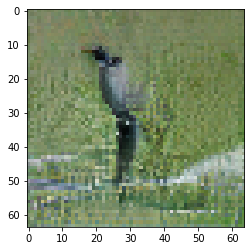

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 10

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.189796686172485 sec
Gen loss: 4.4021838208847255, Gen valid loss: 1.2552644668555841, Gen attr loss: 1.599926604811092, Gen caption loss: 1.5469927487334585, Disc valid loss: 1.097067073754825, Disc valid real loss: 0.5667727872285093, Disc valid fake loss: 0.5302942846687182, Disc attr loss: 3.112305535533564, Disc attr real loss: 1.5123789307224718, Disc attr fake loss: 1.599926604811092
Time for epoch 2 is 38.56238412857056 sec
Gen loss: 4.4161428920621795, Gen valid loss: 1.2660307628998588, Gen attr loss: 1.5988246318770618, Gen caption loss: 1.5512874995466817, Disc valid loss: 1.0897989987034784, Disc valid real loss: 0.5591085924688717, Disc valid fake loss: 0.5306904046193048, Disc attr loss: 3.112076782598728, Disc attr real loss: 1.5132521507216663, Disc attr fake loss: 1.5988246318770618
Time for epoch 3 is 38.53660583496094 sec
Gen los

Time for epoch 21 is 38.25661849975586 sec
Gen loss: 4.405667630637565, Gen valid loss: 1.2578625147581746, Gen attr loss: 1.5993228236511148, Gen caption loss: 1.548482287543899, Disc valid loss: 1.0947990535397516, Disc valid real loss: 0.5627698686710865, Disc valid fake loss: 0.5320291835764236, Disc attr loss: 3.110509135535739, Disc attr real loss: 1.5111863118846243, Disc attr fake loss: 1.5993228236511148
Time for epoch 22 is 38.53567552566528 sec
Gen loss: 4.391412942390132, Gen valid loss: 1.2523338279426905, Gen attr loss: 1.593879391830465, Gen caption loss: 1.5451997140558755, Disc valid loss: 1.0903817192325747, Disc valid real loss: 0.5610480657437953, Disc valid fake loss: 0.5293336532464842, Disc attr loss: 3.1054670248574356, Disc attr real loss: 1.5115876330269709, Disc attr fake loss: 1.593879391830465
Time for epoch 23 is 38.48063349723816 sec
Gen loss: 4.423497040420367, Gen valid loss: 1.262315651104056, Gen attr loss: 1.6060352661422275, Gen caption loss: 1.5551

Time for epoch 41 is 38.35348582267761 sec
Gen loss: 4.398776292154783, Gen valid loss: 1.2493929858130168, Gen attr loss: 1.5999459393302276, Gen caption loss: 1.54943735263535, Disc valid loss: 1.0990229996885388, Disc valid real loss: 0.5666365870615331, Disc valid fake loss: 0.5323864136769519, Disc attr loss: 3.1101202470500295, Disc attr real loss: 1.5101743077198018, Disc attr fake loss: 1.5999459393302276
Time for epoch 42 is 38.417611837387085 sec
Gen loss: 4.394951946367093, Gen valid loss: 1.2557317753471333, Gen attr loss: 1.5946094585951105, Gen caption loss: 1.544610706448232, Disc valid loss: 1.0918099245404809, Disc valid real loss: 0.5588520568237718, Disc valid fake loss: 0.5329578656168165, Disc attr loss: 3.104919309215494, Disc attr real loss: 1.5103098506203836, Disc attr fake loss: 1.5946094585951105
Time for epoch 43 is 38.387539863586426 sec
Gen loss: 4.380475088186704, Gen valid loss: 1.236216206860736, Gen attr loss: 1.5959530119004288, Gen caption loss: 1.54

Time for epoch 61 is 38.35818028450012 sec
Gen loss: 4.4150348000410125, Gen valid loss: 1.2675332003815711, Gen attr loss: 1.5996258549573945, Gen caption loss: 1.5478757426021545, Disc valid loss: 1.086959443925842, Disc valid real loss: 0.5580686996299723, Disc valid fake loss: 0.5288907447804604, Disc attr loss: 3.1090382340800793, Disc attr real loss: 1.509412379122685, Disc attr fake loss: 1.5996258549573945
Time for epoch 62 is 38.37663817405701 sec
Gen loss: 4.401587165145047, Gen valid loss: 1.257322792761371, Gen attr loss: 1.596045386500475, Gen caption loss: 1.5482189803911741, Disc valid loss: 1.091482170552096, Disc valid real loss: 0.5602307437558162, Disc valid fake loss: 0.5312514242117967, Disc attr loss: 3.1050138059993424, Disc attr real loss: 1.5089684194988675, Disc attr fake loss: 1.596045386500475
Time for epoch 63 is 38.40881037712097 sec
Gen loss: 4.390182152027037, Gen valid loss: 1.2484256870701385, Gen attr loss: 1.5960933070195722, Gen caption loss: 1.5456

Time for epoch 81 is 38.396034717559814 sec
Gen loss: 4.395502423206319, Gen valid loss: 1.2515488559314552, Gen attr loss: 1.5976775622949368, Gen caption loss: 1.5462759956111753, Disc valid loss: 1.0958452488025676, Disc valid real loss: 0.5600049573231519, Disc valid fake loss: 0.535840287764221, Disc attr loss: 3.1060447088748138, Disc attr real loss: 1.508367146579877, Disc attr fake loss: 1.5976775622949368
Time for epoch 82 is 38.71038293838501 sec
Gen loss: 4.391610855655618, Gen valid loss: 1.2436695811225147, Gen attr loss: 1.5981028448275434, Gen caption loss: 1.5498384376205403, Disc valid loss: 1.0981246388055446, Disc valid real loss: 0.5631100356901887, Disc valid fake loss: 0.5350146012577585, Disc attr loss: 3.1065188203723775, Disc attr real loss: 1.5084159755448339, Disc attr fake loss: 1.5981028448275434
Time for epoch 83 is 38.23451352119446 sec
Gen loss: 4.398549485012768, Gen valid loss: 1.2463011864401137, Gen attr loss: 1.601640846994188, Gen caption loss: 1.5

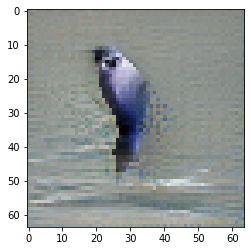

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 11

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.425867319107056 sec
Gen loss: 4.381974728126836, Gen valid loss: 1.237874355904132, Gen attr loss: 1.596943271515492, Gen caption loss: 1.5471571060377085, Disc valid loss: 1.1052096910916047, Disc valid real loss: 0.564928526477762, Disc valid fake loss: 0.5402811654214936, Disc attr loss: 3.103761384803751, Disc attr real loss: 1.5068181132882592, Disc attr fake loss: 1.596943271515492
Time for epoch 2 is 38.761667013168335 sec
Gen loss: 4.410437298984062, Gen valid loss: 1.262938186566681, Gen attr loss: 1.6003864247624466, Gen caption loss: 1.547112691047069, Disc valid loss: 1.0854987791237147, Disc valid real loss: 0.5566408303048875, Disc valid fake loss: 0.5288579459920485, Disc attr loss: 3.1082126422303156, Disc attr real loss: 1.507826217467869, Disc attr fake loss: 1.6003864247624466
Time for epoch 3 is 38.34052753448486 sec
Gen loss: 4

Time for epoch 21 is 38.60996055603027 sec
Gen loss: 4.386149440677508, Gen valid loss: 1.2459433800805875, Gen attr loss: 1.5951416288934104, Gen caption loss: 1.5450644241115912, Disc valid loss: 1.1019342236402558, Disc valid real loss: 0.5655163231742414, Disc valid fake loss: 0.5364179011121352, Disc attr loss: 3.1022231866350665, Disc attr real loss: 1.5070815577416563, Disc attr fake loss: 1.5951416288934104
Time for epoch 22 is 38.66465353965759 sec
Gen loss: 4.38563800439602, Gen valid loss: 1.2458714529427732, Gen attr loss: 1.596349640913449, Gen caption loss: 1.543416906824603, Disc valid loss: 1.094677600434156, Disc valid real loss: 0.5648642905197816, Disc valid fake loss: 0.5298133092682537, Disc attr loss: 3.102617677957385, Disc attr real loss: 1.5062680370439359, Disc attr fake loss: 1.596349640913449
Time for epoch 23 is 38.64180827140808 sec
Gen loss: 4.400384147638874, Gen valid loss: 1.2524436909331862, Gen attr loss: 1.5986144306859995, Gen caption loss: 1.54932

Time for epoch 41 is 38.652830839157104 sec
Gen loss: 4.381692995546956, Gen valid loss: 1.2409710927707394, Gen attr loss: 1.596605112559104, Gen caption loss: 1.5441167742256228, Disc valid loss: 1.0991942162113137, Disc valid real loss: 0.5609937206031831, Disc valid fake loss: 0.5382004979503187, Disc attr loss: 3.1023983128348664, Disc attr real loss: 1.5057932002757624, Disc attr fake loss: 1.596605112559104
Time for epoch 42 is 38.59816312789917 sec
Gen loss: 4.389103642647182, Gen valid loss: 1.248362300841789, Gen attr loss: 1.5961705152258316, Gen caption loss: 1.544570813980206, Disc valid loss: 1.0911748966550439, Disc valid real loss: 0.5574690406400014, Disc valid fake loss: 0.5337058542382104, Disc attr loss: 3.101330092282799, Disc attr real loss: 1.5051595770569675, Disc attr fake loss: 1.5961705152258316
Time for epoch 43 is 38.590972661972046 sec
Gen loss: 4.400573410638949, Gen valid loss: 1.254124936211077, Gen attr loss: 1.598147271771418, Gen caption loss: 1.5483

Time for epoch 61 is 38.61522388458252 sec
Gen loss: 4.3942913072219065, Gen valid loss: 1.2499648298674482, Gen attr loss: 1.5971518616043132, Gen caption loss: 1.54717461203495, Disc valid loss: 1.0975105192280075, Disc valid real loss: 0.5588154856590074, Disc valid fake loss: 0.5386950362342483, Disc attr loss: 3.1013537331971373, Disc attr real loss: 1.504201871592824, Disc attr fake loss: 1.5971518616043132
Time for epoch 62 is 38.57843255996704 sec
Gen loss: 4.398884111626685, Gen valid loss: 1.2534760508110854, Gen attr loss: 1.5966921188643954, Gen caption loss: 1.5487159461509892, Disc valid loss: 1.092973709591036, Disc valid real loss: 0.5607057897863672, Disc valid fake loss: 0.5322679188354875, Disc attr loss: 3.101356090891975, Disc attr real loss: 1.5046639720275796, Disc attr fake loss: 1.5966921188643954
Time for epoch 63 is 38.61853241920471 sec
Gen loss: 4.400280412296616, Gen valid loss: 1.2626974875041785, Gen attr loss: 1.5925702124753296, Gen caption loss: 1.545

Time for epoch 81 is 38.81941866874695 sec
Gen loss: 4.385351043406541, Gen valid loss: 1.2420768732947063, Gen attr loss: 1.5994479300853037, Gen caption loss: 1.5438262363113362, Disc valid loss: 1.1017570032013788, Disc valid real loss: 0.5621871687370911, Disc valid fake loss: 0.5395698366449454, Disc attr loss: 3.1033539513585366, Disc attr real loss: 1.5039060212732331, Disc attr fake loss: 1.5994479300853037
Time for epoch 82 is 38.80080056190491 sec
Gen loss: 4.389299374608813, Gen valid loss: 1.2481705518918955, Gen attr loss: 1.5955081364003623, Gen caption loss: 1.5456206834090112, Disc valid loss: 1.097222951369557, Disc valid real loss: 0.5616528917618884, Disc valid fake loss: 0.5355700603345546, Disc attr loss: 3.0988519792634297, Disc attr real loss: 1.5033438428630674, Disc attr fake loss: 1.5955081364003623
Time for epoch 83 is 38.816291093826294 sec
Gen loss: 4.400949586697711, Gen valid loss: 1.2586777426686067, Gen attr loss: 1.5974123671772034, Gen caption loss: 1

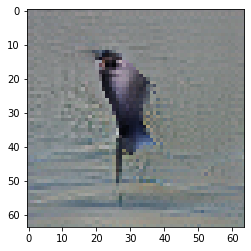

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 12

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.81922674179077 sec
Gen loss: 4.390199302657833, Gen valid loss: 1.2579402382457805, Gen attr loss: 1.590708366254481, Gen caption loss: 1.5415506857197459, Disc valid loss: 1.095964751107906, Disc valid real loss: 0.5611566013598507, Disc valid fake loss: 0.5348081507172365, Disc attr loss: 3.0935141096916303, Disc attr real loss: 1.5028057434371493, Disc attr fake loss: 1.590708366254481
Time for epoch 2 is 38.61236047744751 sec
Gen loss: 4.419888002762627, Gen valid loss: 1.2779660992183013, Gen attr loss: 1.5954755951718587, Gen caption loss: 1.5464463172566276, Disc valid loss: 1.081827542323084, Disc valid real loss: 0.5550806120159181, Disc valid fake loss: 0.5267469305494613, Disc attr loss: 3.097946823450931, Disc attr real loss: 1.5024712282790724, Disc attr fake loss: 1.5954755951718587
Time for epoch 3 is 39.12006735801697 sec
Gen loss: 

Time for epoch 21 is 38.894219160079956 sec
Gen loss: 4.381818613062706, Gen valid loss: 1.2451318794795814, Gen attr loss: 1.5924086667657869, Gen caption loss: 1.5442780679480492, Disc valid loss: 1.0985615377826743, Disc valid real loss: 0.5611077619761955, Disc valid fake loss: 0.5374537735450559, Disc attr loss: 3.0939361467594053, Disc attr real loss: 1.5015274799936187, Disc attr fake loss: 1.5924086667657869
Time for epoch 22 is 39.04917335510254 sec
Gen loss: 4.397856167661465, Gen valid loss: 1.2615092453271717, Gen attr loss: 1.5935049615901338, Gen caption loss: 1.5428419597749787, Disc valid loss: 1.08839268041497, Disc valid real loss: 0.5542977847219482, Disc valid fake loss: 0.5340948946430755, Disc attr loss: 3.095026199733662, Disc attr real loss: 1.5015212381435281, Disc attr fake loss: 1.5935049615901338
Time for epoch 23 is 39.034892320632935 sec
Gen loss: 4.405463621868351, Gen valid loss: 1.2652133530394494, Gen attr loss: 1.5961598225725375, Gen caption loss: 1.

Time for epoch 41 is 38.797969818115234 sec
Gen loss: 4.399454799124865, Gen valid loss: 1.255560972987798, Gen attr loss: 1.5969597870095313, Gen caption loss: 1.5469340386429453, Disc valid loss: 1.0908983974921993, Disc valid real loss: 0.5566526904984864, Disc valid fake loss: 0.5342457043284646, Disc attr loss: 3.098019311744669, Disc attr real loss: 1.501059524735138, Disc attr fake loss: 1.5969597870095313
Time for epoch 42 is 38.82118344306946 sec
Gen loss: 4.394427301437874, Gen valid loss: 1.248554242335684, Gen attr loss: 1.5973620925169327, Gen caption loss: 1.5485109801537946, Disc valid loss: 1.0963253871535221, Disc valid real loss: 0.5603532663528835, Disc valid fake loss: 0.5359721193468667, Disc attr loss: 3.098124754138109, Disc attr real loss: 1.5007626616211764, Disc attr fake loss: 1.5973620925169327
Time for epoch 43 is 39.06378793716431 sec
Gen loss: 4.402022329449331, Gen valid loss: 1.254584259941649, Gen attr loss: 1.5992471990869621, Gen caption loss: 1.5481

Time for epoch 61 is 39.07573962211609 sec
Gen loss: 4.419534989488803, Gen valid loss: 1.2655682949838922, Gen attr loss: 1.6019922659649113, Gen caption loss: 1.5519744128715702, Disc valid loss: 1.093203817118151, Disc valid real loss: 0.5624843927095253, Disc valid fake loss: 0.5307194237625049, Disc attr loss: 3.1014523393093407, Disc attr real loss: 1.4994600733444297, Disc attr fake loss: 1.6019922659649113
Time for epoch 62 is 39.13421010971069 sec
Gen loss: 4.384190379765622, Gen valid loss: 1.2571155302892856, Gen attr loss: 1.590823218105285, Gen caption loss: 1.536251641870514, Disc valid loss: 1.0938527034873238, Disc valid real loss: 0.5595446435739677, Disc valid fake loss: 0.5343080581365239, Disc attr loss: 3.0909073158977476, Disc attr real loss: 1.5000840977924625, Disc attr fake loss: 1.590823218105285
Time for epoch 63 is 39.07715368270874 sec
Gen loss: 4.401958507574024, Gen valid loss: 1.2627672041011697, Gen attr loss: 1.593849991072161, Gen caption loss: 1.5453

Time for epoch 81 is 39.05773711204529 sec
Gen loss: 4.380944548583612, Gen valid loss: 1.2413695903651436, Gen attr loss: 1.594019925691248, Gen caption loss: 1.5455550404422005, Disc valid loss: 1.10082869122668, Disc valid real loss: 0.5650389738845308, Disc valid fake loss: 0.5357897160499077, Disc attr loss: 3.093009500968747, Disc attr real loss: 1.498989575277499, Disc attr fake loss: 1.594019925691248
Time for epoch 82 is 39.06834864616394 sec
Gen loss: 4.401635611929545, Gen valid loss: 1.2507650800513703, Gen attr loss: 1.6003444256175179, Gen caption loss: 1.55052609333824, Disc valid loss: 1.0920895811341966, Disc valid real loss: 0.5572836005752325, Disc valid fake loss: 0.534805982174266, Disc attr loss: 3.0995484280392405, Disc attr real loss: 1.4992040024217228, Disc attr fake loss: 1.6003444256175179
Time for epoch 83 is 39.12890148162842 sec
Gen loss: 4.390601175587352, Gen valid loss: 1.2527910916785883, Gen attr loss: 1.5957914157934627, Gen caption loss: 1.54201866

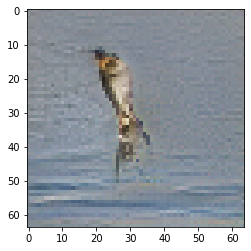

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 13

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.87882399559021 sec
Gen loss: 4.401317496286821, Gen valid loss: 1.2609627065942863, Gen attr loss: 1.595483036545234, Gen caption loss: 1.5448717512089385, Disc valid loss: 1.0910223315401775, Disc valid real loss: 0.5594190624832784, Disc valid fake loss: 0.5316032698645501, Disc attr loss: 3.093756092596183, Disc attr real loss: 1.4982730560509494, Disc attr fake loss: 1.595483036545234
Time for epoch 2 is 39.09498071670532 sec
Gen loss: 4.394418618220301, Gen valid loss: 1.2600333566265054, Gen attr loss: 1.592414899570186, Gen caption loss: 1.541970359923717, Disc valid loss: 1.0925546015504253, Disc valid real loss: 0.5596233460153668, Disc valid fake loss: 0.5329312552119981, Disc attr loss: 3.090787036955195, Disc attr real loss: 1.4983721373850092, Disc attr fake loss: 1.592414899570186
Time for epoch 3 is 39.07023334503174 sec
Gen loss: 4.

Time for epoch 21 is 39.02570128440857 sec
Gen loss: 4.391499861792174, Gen valid loss: 1.2503590333429455, Gen attr loss: 1.5963850021362305, Gen caption loss: 1.5447558132290518, Disc valid loss: 1.097325370402194, Disc valid real loss: 0.5614161963062234, Disc valid fake loss: 0.5359091759535678, Disc attr loss: 3.0947906541307444, Disc attr real loss: 1.498405651994514, Disc attr fake loss: 1.5963850021362305
Time for epoch 22 is 39.02342200279236 sec
Gen loss: 4.397981469224139, Gen valid loss: 1.2557333631890253, Gen attr loss: 1.5955565973995178, Gen caption loss: 1.546691509443247, Disc valid loss: 1.093149861830683, Disc valid real loss: 0.558948305483433, Disc valid fake loss: 0.5342015540050621, Disc attr loss: 3.093229147153818, Disc attr real loss: 1.4976725497543004, Disc attr fake loss: 1.5955565973995178
Time for epoch 23 is 39.085819482803345 sec
Gen loss: 4.408598768678784, Gen valid loss: 1.2610437209367107, Gen attr loss: 1.5975565445132371, Gen caption loss: 1.5499

Time for epoch 41 is 39.06081461906433 sec
Gen loss: 4.393627807699891, Gen valid loss: 1.253123626476381, Gen attr loss: 1.5955049374562291, Gen caption loss: 1.5449992499054286, Disc valid loss: 1.1005607958085493, Disc valid real loss: 0.563140195640445, Disc valid fake loss: 0.5374206022679967, Disc attr loss: 3.092564215181966, Disc attr real loss: 1.4970592777257365, Disc attr fake loss: 1.5955049374562291
Time for epoch 42 is 39.01899576187134 sec
Gen loss: 4.394202252390585, Gen valid loss: 1.2592989362998384, Gen attr loss: 1.59362499629902, Gen caption loss: 1.5412783134920487, Disc valid loss: 1.087250866217988, Disc valid real loss: 0.5590381788690562, Disc valid fake loss: 0.5282126858143948, Disc attr loss: 3.0908934226850184, Disc attr real loss: 1.4972684263859983, Disc attr fake loss: 1.59362499629902
Time for epoch 43 is 38.99864935874939 sec
Gen loss: 4.4049192973914835, Gen valid loss: 1.2670128364873126, Gen attr loss: 1.5924118153124966, Gen caption loss: 1.545494

Time for epoch 61 is 39.03247261047363 sec
Gen loss: 4.398050429698252, Gen valid loss: 1.2564272226356878, Gen attr loss: 1.5967086705412, Gen caption loss: 1.5449145286063837, Disc valid loss: 1.089734950201298, Disc valid real loss: 0.5586424746164461, Disc valid fake loss: 0.5310924729196037, Disc attr loss: 3.0936396222127485, Disc attr real loss: 1.4969309516715485, Disc attr fake loss: 1.5967086705412
Time for epoch 62 is 39.020910024642944 sec
Gen loss: 4.394513753694571, Gen valid loss: 1.253491391819021, Gen attr loss: 1.5942001853208878, Gen caption loss: 1.5468221796237356, Disc valid loss: 1.099924181534992, Disc valid real loss: 0.5634513907639315, Disc valid fake loss: 0.5364727870558659, Disc attr loss: 3.0912154244213568, Disc attr real loss: 1.4970152391004692, Disc attr fake loss: 1.5942001853208878
Time for epoch 63 is 39.07826209068298 sec
Gen loss: 4.3846983050266255, Gen valid loss: 1.244036720212559, Gen attr loss: 1.5947087722096016, Gen caption loss: 1.5459528

Time for epoch 81 is 39.10661220550537 sec
Gen loss: 4.398834043725073, Gen valid loss: 1.2656476651103838, Gen attr loss: 1.592238606153142, Gen caption loss: 1.5409477622851446, Disc valid loss: 1.0935391680334965, Disc valid real loss: 0.5589270216178118, Disc valid fake loss: 0.5346121456080336, Disc attr loss: 3.0884109170133183, Disc attr real loss: 1.4961723108601763, Disc attr fake loss: 1.592238606153142
Time for epoch 82 is 39.03405547142029 sec
Gen loss: 4.394637025791778, Gen valid loss: 1.2648478151983038, Gen attr loss: 1.592645892605872, Gen caption loss: 1.537143318633723, Disc valid loss: 1.0864632880784633, Disc valid real loss: 0.5534807570419984, Disc valid fake loss: 0.5329825322479413, Disc attr loss: 3.0884714853472826, Disc attr real loss: 1.4958255927414106, Disc attr fake loss: 1.592645892605872
Time for epoch 83 is 39.02210330963135 sec
Gen loss: 4.403718676993518, Gen valid loss: 1.263364189200931, Gen attr loss: 1.5970635229979104, Gen caption loss: 1.54329

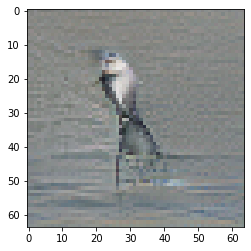

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 14

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.07430672645569 sec
Gen loss: 4.393935854195902, Gen valid loss: 1.255603346075146, Gen attr loss: 1.594564638809783, Gen caption loss: 1.543767872864638, Disc valid loss: 1.0948629994702532, Disc valid real loss: 0.5597910855197648, Disc valid fake loss: 0.5350719126582468, Disc attr loss: 3.090549638277793, Disc attr real loss: 1.49598499946801, Disc attr fake loss: 1.594564638809783
Time for epoch 2 is 38.99172019958496 sec
Gen loss: 4.401515804332123, Gen valid loss: 1.2588771463732733, Gen attr loss: 1.5968137775979392, Gen caption loss: 1.5458248902142533, Disc valid loss: 1.0915170728675718, Disc valid real loss: 0.555155937829961, Disc valid fake loss: 0.5363611361683223, Disc attr loss: 3.09287506971902, Disc attr real loss: 1.4960612921210807, Disc attr fake loss: 1.5968137775979392
Time for epoch 3 is 39.068511724472046 sec
Gen loss: 4.41

Time for epoch 21 is 39.09087252616882 sec
Gen loss: 4.3909136409035865, Gen valid loss: 1.2568707813415423, Gen attr loss: 1.592624530559633, Gen caption loss: 1.5414183275486395, Disc valid loss: 1.102639026435087, Disc valid real loss: 0.5675999729775478, Disc valid fake loss: 0.5350390529729486, Disc attr loss: 3.0878554033393137, Disc attr real loss: 1.4952308727796808, Disc attr fake loss: 1.592624530559633
Time for epoch 22 is 39.05255389213562 sec
Gen loss: 4.389649607624788, Gen valid loss: 1.2552952598427047, Gen attr loss: 1.5909565790558895, Gen caption loss: 1.5433977671108918, Disc valid loss: 1.0947661031552447, Disc valid real loss: 0.5599042224851727, Disc valid fake loss: 0.5348618800239511, Disc attr loss: 3.0858258784301884, Disc attr real loss: 1.4948692993742987, Disc attr fake loss: 1.5909565790558895
Time for epoch 23 is 39.078667402267456 sec
Gen loss: 4.389866514903743, Gen valid loss: 1.247458431294294, Gen attr loss: 1.5951377815670438, Gen caption loss: 1.5

Time for epoch 41 is 39.05072593688965 sec
Gen loss: 4.38884943222935, Gen valid loss: 1.2496822048331986, Gen attr loss: 1.5933789748163405, Gen caption loss: 1.5457882529028708, Disc valid loss: 1.1061189481559484, Disc valid real loss: 0.5646893835164667, Disc valid fake loss: 0.5414295648817771, Disc attr loss: 3.0881263860842076, Disc attr real loss: 1.4947474112678674, Disc attr fake loss: 1.5933789748163405
Time for epoch 42 is 39.02178406715393 sec
Gen loss: 4.3910753319903115, Gen valid loss: 1.2531211710557706, Gen attr loss: 1.593534645672413, Gen caption loss: 1.5444195276999537, Disc valid loss: 1.0893613710636045, Disc valid real loss: 0.559432754267845, Disc valid fake loss: 0.5299286177649407, Disc attr loss: 3.0882375595692375, Disc attr real loss: 1.4947029138968242, Disc attr fake loss: 1.593534645672413
Time for epoch 43 is 39.068002462387085 sec
Gen loss: 4.405273611306498, Gen valid loss: 1.2571210951662968, Gen attr loss: 1.5998738655229894, Gen caption loss: 1.5

Time for epoch 61 is 39.06196880340576 sec
Gen loss: 4.4014468703489635, Gen valid loss: 1.2592418187355932, Gen attr loss: 1.5947758479493097, Gen caption loss: 1.5474292033410009, Disc valid loss: 1.0924303244122968, Disc valid real loss: 0.557373423886493, Disc valid fake loss: 0.5350569028679918, Disc attr loss: 3.088088538588547, Disc attr real loss: 1.4933126906392373, Disc attr fake loss: 1.5947758479493097
Time for epoch 62 is 39.01820945739746 sec
Gen loss: 4.405469301916396, Gen valid loss: 1.2602248543969339, Gen attr loss: 1.5964274080142096, Gen caption loss: 1.5488170398283134, Disc valid loss: 1.095686671695089, Disc valid real loss: 0.5613102019640811, Disc valid fake loss: 0.534376470619424, Disc attr loss: 3.089490379098308, Disc attr real loss: 1.4930629710840986, Disc attr fake loss: 1.5964274080142096
Time for epoch 63 is 39.00832772254944 sec
Gen loss: 4.394819237675447, Gen valid loss: 1.2559588160618211, Gen attr loss: 1.5949122511597507, Gen caption loss: 1.543

Time for epoch 81 is 39.037912130355835 sec
Gen loss: 4.394796304263397, Gen valid loss: 1.2544372559885992, Gen attr loss: 1.5943454268178965, Gen caption loss: 1.5460136237183237, Disc valid loss: 1.0988785836108654, Disc valid real loss: 0.5619254999852116, Disc valid fake loss: 0.5369530820911169, Disc attr loss: 3.086957271183086, Disc attr real loss: 1.4926118443651897, Disc attr fake loss: 1.5943454268178965
Time for epoch 82 is 39.00349521636963 sec
Gen loss: 4.4044502014067115, Gen valid loss: 1.2622510273928242, Gen attr loss: 1.5954244275726277, Gen caption loss: 1.546774732388132, Disc valid loss: 1.0851493865493838, Disc valid real loss: 0.5532684045916973, Disc valid fake loss: 0.5318809815538608, Disc attr loss: 3.088038869666536, Disc attr real loss: 1.4926144420939087, Disc attr fake loss: 1.5954244275726277
Time for epoch 83 is 39.07036352157593 sec
Gen loss: 4.392222009700165, Gen valid loss: 1.259045561639274, Gen attr loss: 1.591913157362279, Gen caption loss: 1.54

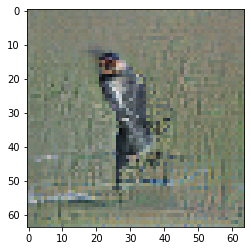

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 15

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.05804753303528 sec
Gen loss: 4.41887597146073, Gen valid loss: 1.2659057096091066, Gen attr loss: 1.600412602347087, Gen caption loss: 1.5525576796958116, Disc valid loss: 1.0937938082831984, Disc valid real loss: 0.5612973822003134, Disc valid fake loss: 0.5324964251944689, Disc attr loss: 3.092176014491859, Disc attr real loss: 1.491763412144772, Disc attr fake loss: 1.600412602347087
Time for epoch 2 is 39.02414345741272 sec
Gen loss: 4.402633444726629, Gen valid loss: 1.269219476356093, Gen attr loss: 1.5919688991737884, Gen caption loss: 1.541445054335969, Disc valid loss: 1.0853882851962475, Disc valid real loss: 0.5537257771181866, Disc valid fake loss: 0.5316625086434166, Disc attr loss: 3.083655336038853, Disc attr real loss: 1.4916864368650649, Disc attr fake loss: 1.5919688991737884
Time for epoch 3 is 39.011555433273315 sec
Gen loss: 4.

Time for epoch 21 is 39.0062198638916 sec
Gen loss: 4.405295467635157, Gen valid loss: 1.2654749466797848, Gen attr loss: 1.5946843103987738, Gen caption loss: 1.5451362168562768, Disc valid loss: 1.0905668549744418, Disc valid real loss: 0.5545042901827391, Disc valid fake loss: 0.5360625668108302, Disc attr loss: 3.0851711348143374, Disc attr real loss: 1.4904868244155636, Disc attr fake loss: 1.5946843103987738
Time for epoch 22 is 39.01979994773865 sec
Gen loss: 4.413127590970295, Gen valid loss: 1.2783718159205222, Gen attr loss: 1.5923069114607524, Gen caption loss: 1.542448875057665, Disc valid loss: 1.0850103125985722, Disc valid real loss: 0.5559169604041712, Disc valid fake loss: 0.5290933533251124, Disc attr loss: 3.082669728493626, Disc attr real loss: 1.4903628170328735, Disc attr fake loss: 1.5923069114607524
Time for epoch 23 is 39.092421531677246 sec
Gen loss: 4.398483622041821, Gen valid loss: 1.2564944049853297, Gen attr loss: 1.594145471487588, Gen caption loss: 1.54

Time for epoch 41 is 39.06141138076782 sec
Gen loss: 4.408724590368711, Gen valid loss: 1.272309372418618, Gen attr loss: 1.5928802141329137, Gen caption loss: 1.5435350025249368, Disc valid loss: 1.0923371495916268, Disc valid real loss: 0.5609151747653155, Disc valid fake loss: 0.5314219740186603, Disc attr loss: 3.082738608848758, Disc attr real loss: 1.4898583947158441, Disc attr fake loss: 1.5928802141329137
Time for epoch 42 is 39.038846015930176 sec
Gen loss: 4.409067312230262, Gen valid loss: 1.2708583845678707, Gen attr loss: 1.593668643052016, Gen caption loss: 1.5445402938175976, Disc valid loss: 1.092544602992412, Disc valid real loss: 0.5591559704080183, Disc valid fake loss: 0.5333886339574002, Disc attr loss: 3.0831759121359847, Disc attr real loss: 1.489507269083969, Disc attr fake loss: 1.593668643052016
Time for epoch 43 is 39.043981075286865 sec
Gen loss: 4.395856097461731, Gen valid loss: 1.2573929047842982, Gen attr loss: 1.5945988893508911, Gen caption loss: 1.543

Time for epoch 61 is 39.01738357543945 sec
Gen loss: 4.391948962276221, Gen valid loss: 1.256912623963705, Gen attr loss: 1.5899805185917593, Gen caption loss: 1.545055819074636, Disc valid loss: 1.0988632261268492, Disc valid real loss: 0.5649526596553927, Disc valid fake loss: 0.5339105653407451, Disc attr loss: 3.078694570032239, Disc attr real loss: 1.4887140514404793, Disc attr fake loss: 1.5899805185917593
Time for epoch 62 is 39.025959968566895 sec
Gen loss: 4.400277204306791, Gen valid loss: 1.260892975459577, Gen attr loss: 1.593135996885739, Gen caption loss: 1.546248239876455, Disc valid loss: 1.0951996923785223, Disc valid real loss: 0.5545681983151733, Disc valid fake loss: 0.5406314926095771, Disc attr loss: 3.0823951894997905, Disc attr real loss: 1.4892591926140515, Disc attr fake loss: 1.593135996885739
Time for epoch 63 is 39.08292531967163 sec
Gen loss: 4.397306459059883, Gen valid loss: 1.2614959509069035, Gen attr loss: 1.5925750031380796, Gen caption loss: 1.54323

Time for epoch 81 is 39.08725428581238 sec
Gen loss: 4.393594761851034, Gen valid loss: 1.2596841580499478, Gen attr loss: 1.5910795952892562, Gen caption loss: 1.542831003504394, Disc valid loss: 1.0992007005182385, Disc valid real loss: 0.5606410882175776, Disc valid fake loss: 0.5385596118968353, Disc attr loss: 3.0796109276412302, Disc attr real loss: 1.488531332351974, Disc attr fake loss: 1.5910795952892562
Time for epoch 82 is 39.055835485458374 sec
Gen loss: 4.4002685999159565, Gen valid loss: 1.2664781795930733, Gen attr loss: 1.592575114270859, Gen caption loss: 1.5412153102518098, Disc valid loss: 1.0863735688734184, Disc valid real loss: 0.5551803523124395, Disc valid fake loss: 0.5311932183378111, Disc attr loss: 3.0807717205063114, Disc attr real loss: 1.4881966062354524, Disc attr fake loss: 1.592575114270859
Time for epoch 83 is 39.47080373764038 sec
Gen loss: 4.383742441652913, Gen valid loss: 1.2533493851258504, Gen attr loss: 1.59047632521084, Gen caption loss: 1.539

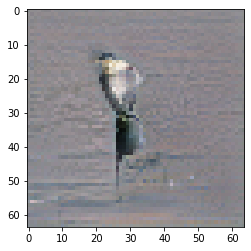

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 16

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.06153988838196 sec
Gen loss: 4.394211911250582, Gen valid loss: 1.2568269632050015, Gen attr loss: 1.593363031462279, Gen caption loss: 1.5440219227214493, Disc valid loss: 1.1047549042598341, Disc valid real loss: 0.5644148428265642, Disc valid fake loss: 0.5403400609486795, Disc attr loss: 3.0808198206469943, Disc attr real loss: 1.487456789184715, Disc attr fake loss: 1.593363031462279
Time for epoch 2 is 39.13740348815918 sec
Gen loss: 4.390341055748586, Gen valid loss: 1.2555313544867808, Gen attr loss: 1.5917019953895715, Gen caption loss: 1.543107707972126, Disc valid loss: 1.0964974098735385, Disc valid real loss: 0.5566834563485329, Disc valid fake loss: 0.5398139532019453, Disc attr loss: 3.0792215271047785, Disc attr real loss: 1.487519531715207, Disc attr fake loss: 1.5917019953895715
Time for epoch 3 is 39.136908292770386 sec
Gen loss:

Time for epoch 21 is 39.3530752658844 sec
Gen loss: 4.409963384876407, Gen valid loss: 1.2659947936773945, Gen attr loss: 1.5983308256480107, Gen caption loss: 1.5456377817040214, Disc valid loss: 1.0958472564614563, Disc valid real loss: 0.5585816811093793, Disc valid fake loss: 0.5372655779365602, Disc attr loss: 3.0852514453696687, Disc attr real loss: 1.4869206197216582, Disc attr fake loss: 1.5983308256480107
Time for epoch 22 is 40.715779542922974 sec
Gen loss: 4.411282094190438, Gen valid loss: 1.2684803039723942, Gen attr loss: 1.594106987562929, Gen caption loss: 1.5486948118623356, Disc valid loss: 1.0850464304288228, Disc valid real loss: 0.5541251072392555, Disc valid fake loss: 0.5309213240779835, Disc attr loss: 3.080686444512551, Disc attr real loss: 1.4865794569496218, Disc attr fake loss: 1.594106987562929
Time for epoch 23 is 40.20950436592102 sec
Gen loss: 4.404500573631225, Gen valid loss: 1.2582610780953716, Gen attr loss: 1.5972464811511156, Gen caption loss: 1.54

Time for epoch 41 is 39.03110384941101 sec
Gen loss: 4.413636000175786, Gen valid loss: 1.2686896716676108, Gen attr loss: 1.5988883968937364, Gen caption loss: 1.546057939529419, Disc valid loss: 1.092421166618988, Disc valid real loss: 0.5609072140723386, Disc valid fake loss: 0.5315139535158308, Disc attr loss: 3.0848218011985304, Disc attr real loss: 1.4859334043047938, Disc attr fake loss: 1.5988883968937364
Time for epoch 42 is 39.0942108631134 sec
Gen loss: 4.404132118070029, Gen valid loss: 1.269968828373162, Gen attr loss: 1.5926474297272804, Gen caption loss: 1.5415158633617205, Disc valid loss: 1.091655599715587, Disc valid real loss: 0.5557807863243227, Disc valid fake loss: 0.535874810079895, Disc attr loss: 3.0788416093604027, Disc attr real loss: 1.4861941796331224, Disc attr fake loss: 1.5926474297272804
Time for epoch 43 is 39.00645709037781 sec
Gen loss: 4.404781636829945, Gen valid loss: 1.2609684212097954, Gen attr loss: 1.595633183714497, Gen caption loss: 1.548180

Time for epoch 61 is 39.142245292663574 sec
Gen loss: 4.38485546809871, Gen valid loss: 1.2581282716779527, Gen attr loss: 1.5899883137162785, Gen caption loss: 1.5367388734972574, Disc valid loss: 1.1021735303124116, Disc valid real loss: 0.5578191942638822, Disc valid fake loss: 0.5443543364523549, Disc attr loss: 3.0753613283963706, Disc attr real loss: 1.4853730146800923, Disc attr fake loss: 1.5899883137162785
Time for epoch 62 is 39.156455755233765 sec
Gen loss: 4.392073460064606, Gen valid loss: 1.2618572732943507, Gen attr loss: 1.5890986951709116, Gen caption loss: 1.5411174791615183, Disc valid loss: 1.0962763929431678, Disc valid real loss: 0.5579563014229462, Disc valid fake loss: 0.5383200932970538, Disc attr loss: 3.073904980811969, Disc attr real loss: 1.4848062856410578, Disc attr fake loss: 1.5890986951709116
Time for epoch 63 is 39.1957631111145 sec
Gen loss: 4.39166533979297, Gen valid loss: 1.2540041697703725, Gen attr loss: 1.5931129688169898, Gen caption loss: 1.5

Time for epoch 81 is 39.14475059509277 sec
Gen loss: 4.389371180598975, Gen valid loss: 1.2553978245755844, Gen attr loss: 1.592172557422462, Gen caption loss: 1.5418008029622436, Disc valid loss: 1.093526220095513, Disc valid real loss: 0.5591388128314237, Disc valid fake loss: 0.5343874069410288, Disc attr loss: 3.076398907961238, Disc attr real loss: 1.4842263505387758, Disc attr fake loss: 1.592172557422462
Time for epoch 82 is 39.19972276687622 sec
Gen loss: 4.402635684827479, Gen valid loss: 1.262403156053083, Gen attr loss: 1.5939094083419014, Gen caption loss: 1.5463231268937025, Disc valid loss: 1.09211291562574, Disc valid real loss: 0.5573963658596442, Disc valid fake loss: 0.534716548958445, Disc attr loss: 3.0782182446017177, Disc attr real loss: 1.484308836259816, Disc attr fake loss: 1.5939094083419014
Time for epoch 83 is 39.13397765159607 sec
Gen loss: 4.398173436885926, Gen valid loss: 1.2621250026594333, Gen attr loss: 1.593655803339268, Gen caption loss: 1.542392633

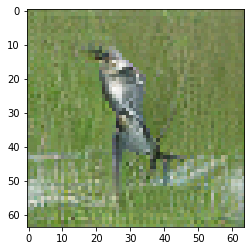

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 17

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.144110679626465 sec
Gen loss: 4.402987904664947, Gen valid loss: 1.2706593433369788, Gen attr loss: 1.5898075316979634, Gen caption loss: 1.5425210186459508, Disc valid loss: 1.099070986273489, Disc valid real loss: 0.5599965820629099, Disc valid fake loss: 0.5390744048566999, Disc attr loss: 3.0731831288273095, Disc attr real loss: 1.4833755971293463, Disc attr fake loss: 1.5898075316979634
Time for epoch 2 is 39.14637851715088 sec
Gen loss: 4.39197738642292, Gen valid loss: 1.2596975708718545, Gen attr loss: 1.5909075953449983, Gen caption loss: 1.5413722223059594, Disc valid loss: 1.0953325511317267, Disc valid real loss: 0.5595208348297491, Disc valid fake loss: 0.5358117203402325, Disc attr loss: 3.0742258647593057, Disc attr real loss: 1.4833182694143072, Disc attr fake loss: 1.5909075953449983
Time for epoch 3 is 39.248291015625 sec
Gen loss

Time for epoch 21 is 39.172443866729736 sec
Gen loss: 4.39905884401585, Gen valid loss: 1.2597288789787913, Gen attr loss: 1.5950512902200384, Gen caption loss: 1.5442786769169132, Disc valid loss: 1.0934054026112647, Disc valid real loss: 0.5612364597921449, Disc valid fake loss: 0.5321689424960594, Disc attr loss: 3.0772174499868377, Disc attr real loss: 1.4821661597667994, Disc attr fake loss: 1.5950512902200384
Time for epoch 22 is 39.1806058883667 sec
Gen loss: 4.405761483562025, Gen valid loss: 1.2667661911749903, Gen attr loss: 1.5945918941239354, Gen caption loss: 1.5444033869559848, Disc valid loss: 1.0909321744267533, Disc valid real loss: 0.5548087609654196, Disc valid fake loss: 0.5361234147535753, Disc attr loss: 3.0772847269931782, Disc attr real loss: 1.4826928328692428, Disc attr fake loss: 1.5945918941239354
Time for epoch 23 is 39.12464928627014 sec
Gen loss: 4.392100125470459, Gen valid loss: 1.251660128434499, Gen attr loss: 1.5954532788051823, Gen caption loss: 1.5

Time for epoch 41 is 39.139811515808105 sec
Gen loss: 4.407177583958076, Gen valid loss: 1.271486787130516, Gen attr loss: 1.5923310576415644, Gen caption loss: 1.5433597370861023, Disc valid loss: 1.0892046011560332, Disc valid real loss: 0.5514579770687796, Disc valid fake loss: 0.5377466215835354, Disc attr loss: 3.074112844337939, Disc attr real loss: 1.4817817866963745, Disc attr fake loss: 1.5923310576415644
Time for epoch 42 is 39.11898493766785 sec
Gen loss: 4.418821991943732, Gen valid loss: 1.2776738335769675, Gen attr loss: 1.5941161250034321, Gen caption loss: 1.5470320332018017, Disc valid loss: 1.0849477296599204, Disc valid real loss: 0.555935265168265, Disc valid fake loss: 0.5290124689337361, Disc attr loss: 3.0765377644923966, Disc attr real loss: 1.4824216394889644, Disc attr fake loss: 1.5941161250034321
Time for epoch 43 is 39.18809199333191 sec
Gen loss: 4.398308156305536, Gen valid loss: 1.2640340202222995, Gen attr loss: 1.5922181926122525, Gen caption loss: 1.5

Time for epoch 61 is 39.20720934867859 sec
Gen loss: 4.3895677848237, Gen valid loss: 1.2579755127268433, Gen attr loss: 1.5917876826392279, Gen caption loss: 1.5398045991494405, Disc valid loss: 1.0974731568075453, Disc valid real loss: 0.5605165487544, Disc valid fake loss: 0.5369566079723803, Disc attr loss: 3.0735230797997657, Disc attr real loss: 1.4817353971605378, Disc attr fake loss: 1.5917876826392279
Time for epoch 62 is 39.14549422264099 sec
Gen loss: 4.408883114817343, Gen valid loss: 1.2694148127302567, Gen attr loss: 1.5939024040692544, Gen caption loss: 1.545565892687335, Disc valid loss: 1.0867682267333756, Disc valid real loss: 0.5547368555534177, Disc valid fake loss: 0.5320313706146023, Disc attr loss: 3.0750255009669276, Disc attr real loss: 1.4811230968976732, Disc attr fake loss: 1.5939024040692544
Time for epoch 63 is 39.168663024902344 sec
Gen loss: 4.4140924670831945, Gen valid loss: 1.2762202234449103, Gen attr loss: 1.5932365390989516, Gen caption loss: 1.544

Time for epoch 81 is 39.131925106048584 sec
Gen loss: 4.400835564466027, Gen valid loss: 1.2560454374406396, Gen attr loss: 1.596805956951648, Gen caption loss: 1.5479841519823565, Disc valid loss: 1.1008845007193444, Disc valid real loss: 0.5624079591213527, Disc valid fake loss: 0.5384765411941663, Disc attr loss: 3.0770383763119455, Disc attr real loss: 1.4802324193602978, Disc attr fake loss: 1.596805956951648
Time for epoch 82 is 39.166051387786865 sec
Gen loss: 4.411696400422714, Gen valid loss: 1.266069502849889, Gen attr loss: 1.5996550693098446, Gen caption loss: 1.5459718093639467, Disc valid loss: 1.0858226271502693, Disc valid real loss: 0.5539189152278228, Disc valid fake loss: 0.5319037104686748, Disc attr loss: 3.0803046730475696, Disc attr real loss: 1.4806496037377253, Disc attr fake loss: 1.5996550693098446
Time for epoch 83 is 39.19450402259827 sec
Gen loss: 4.401054355187145, Gen valid loss: 1.2675985915227956, Gen attr loss: 1.591348022303284, Gen caption loss: 1.5

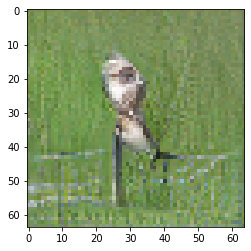

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 18

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.24784183502197 sec
Gen loss: 4.403277669172623, Gen valid loss: 1.263346046774691, Gen attr loss: 1.5953578212396886, Gen caption loss: 1.5445738061656797, Disc valid loss: 1.0946580812859987, Disc valid real loss: 0.5570254755537039, Disc valid fake loss: 0.5376326092859594, Disc attr loss: 3.075198900408861, Disc attr real loss: 1.4798410791691725, Disc attr fake loss: 1.5953578212396886
Time for epoch 2 is 39.42254877090454 sec
Gen loss: 4.407088699702648, Gen valid loss: 1.274267605165156, Gen attr loss: 1.5915894466363965, Gen caption loss: 1.5412316519393507, Disc valid loss: 1.0823019972338586, Disc valid real loss: 0.5508055805675383, Disc valid fake loss: 0.5314964169893808, Disc attr loss: 3.0715591009393295, Disc attr real loss: 1.479969654302933, Disc attr fake loss: 1.5915894466363965
Time for epoch 3 is 39.15453743934631 sec
Gen loss:

Time for epoch 21 is 39.12250733375549 sec
Gen loss: 4.408519560082495, Gen valid loss: 1.2750650490848676, Gen attr loss: 1.5920952532672623, Gen caption loss: 1.5413592685528887, Disc valid loss: 1.0943341402180473, Disc valid real loss: 0.5587315903446539, Disc valid fake loss: 0.5356025508425746, Disc attr loss: 3.070964584505655, Disc attr real loss: 1.4788693312383925, Disc attr fake loss: 1.5920952532672623
Time for epoch 22 is 39.127665519714355 sec
Gen loss: 4.404175819097173, Gen valid loss: 1.2641362053592031, Gen attr loss: 1.5951430739426031, Gen caption loss: 1.5448965373724133, Disc valid loss: 1.0908520024643358, Disc valid real loss: 0.555620093575015, Disc valid fake loss: 0.535231910666153, Disc attr loss: 3.074525716828137, Disc attr real loss: 1.4793826428855337, Disc attr fake loss: 1.5951430739426031
Time for epoch 23 is 39.13473153114319 sec
Gen loss: 4.408927079461778, Gen valid loss: 1.2646462461812709, Gen attr loss: 1.5964697754480006, Gen caption loss: 1.54

Time for epoch 41 is 39.16419053077698 sec
Gen loss: 4.414400944541787, Gen valid loss: 1.2704838436793506, Gen attr loss: 1.5979119416497911, Gen caption loss: 1.54600515533592, Disc valid loss: 1.093751245882453, Disc valid real loss: 0.5594456461548483, Disc valid fake loss: 0.5343055995660746, Disc attr loss: 3.0766780134139022, Disc attr real loss: 1.4787660717641111, Disc attr fake loss: 1.5979119416497911
Time for epoch 42 is 39.11978077888489 sec
Gen loss: 4.3995195649826755, Gen valid loss: 1.2610881436808, Gen attr loss: 1.59585963064416, Gen caption loss: 1.542571789527004, Disc valid loss: 1.0974715363365526, Disc valid real loss: 0.5608082941877164, Disc valid fake loss: 0.5366632422296013, Disc attr loss: 3.0742351026715946, Disc attr real loss: 1.478375472027435, Disc attr fake loss: 1.59585963064416
Time for epoch 43 is 39.09393572807312 sec
Gen loss: 4.412302281475325, Gen valid loss: 1.272320604582789, Gen attr loss: 1.5940647409537296, Gen caption loss: 1.54591695209

Time for epoch 61 is 38.685492277145386 sec
Gen loss: 4.410501180948604, Gen valid loss: 1.2632872919403118, Gen attr loss: 1.5970874084689752, Gen caption loss: 1.5501264941078539, Disc valid loss: 1.104156667947123, Disc valid real loss: 0.5624243725283036, Disc valid fake loss: 0.5417322974379469, Disc attr loss: 3.075595096197878, Disc attr real loss: 1.4785076877289025, Disc attr fake loss: 1.5970874084689752
Time for epoch 62 is 38.52581787109375 sec
Gen loss: 4.372029931241581, Gen valid loss: 1.2301037277632612, Gen attr loss: 1.5939458350178994, Gen caption loss: 1.5479803805751853, Disc valid loss: 1.1103383338225243, Disc valid real loss: 0.5663496933493833, Disc valid fake loss: 0.5439886378886577, Disc attr loss: 3.0720975350558275, Disc attr real loss: 1.4781517000379278, Disc attr fake loss: 1.5939458350178994
Time for epoch 63 is 38.5453040599823 sec
Gen loss: 4.4005007033102554, Gen valid loss: 1.261263031785081, Gen attr loss: 1.5964955320849328, Gen caption loss: 1.5

Time for epoch 81 is 38.60426592826843 sec
Gen loss: 4.4031296267419, Gen valid loss: 1.2645144793722365, Gen attr loss: 1.5940622469274008, Gen caption loss: 1.5445528860660749, Disc valid loss: 1.0957314480287919, Disc valid real loss: 0.5570834489049628, Disc valid fake loss: 0.5386479959739903, Disc attr loss: 3.0704261587887274, Disc attr real loss: 1.4763639118613265, Disc attr fake loss: 1.5940622469274008
Time for epoch 82 is 38.589484453201294 sec
Gen loss: 4.39356325700031, Gen valid loss: 1.2584868375524918, Gen attr loss: 1.5920699201625215, Gen caption loss: 1.5430064921779685, Disc valid loss: 1.0934220647747277, Disc valid real loss: 0.5554203732711512, Disc valid fake loss: 0.5380016940072946, Disc attr loss: 3.068358719510438, Disc attr real loss: 1.4762887993479163, Disc attr fake loss: 1.5920699201625215
Time for epoch 83 is 38.581759452819824 sec
Gen loss: 4.3949188875958205, Gen valid loss: 1.2531696323779864, Gen attr loss: 1.5951062130734204, Gen caption loss: 1.

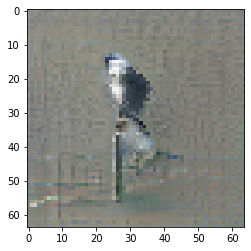

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 19

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.684064626693726 sec
Gen loss: 4.4043890686862195, Gen valid loss: 1.2678769760661655, Gen attr loss: 1.592359219463214, Gen caption loss: 1.5441528865638463, Disc valid loss: 1.0986825487801053, Disc valid real loss: 0.5656718695712929, Disc valid fake loss: 0.533010678966517, Disc attr loss: 3.0676420245390275, Disc attr real loss: 1.4752828050758133, Disc attr fake loss: 1.592359219463214
Time for epoch 2 is 38.52027082443237 sec
Gen loss: 4.40132869485271, Gen valid loss: 1.2739016455686512, Gen attr loss: 1.5874983207966253, Gen caption loss: 1.5399287254183596, Disc valid loss: 1.085675396408815, Disc valid real loss: 0.5503772978537128, Disc valid fake loss: 0.5352980964552096, Disc attr loss: 3.062885498612877, Disc attr real loss: 1.4753871778162515, Disc attr fake loss: 1.5874983207966253
Time for epoch 3 is 38.95898175239563 sec
Gen loss:

Time for epoch 21 is 38.68563270568848 sec
Gen loss: 4.406367068045185, Gen valid loss: 1.2683901752882856, Gen attr loss: 1.5947398354367512, Gen caption loss: 1.5432370568355571, Disc valid loss: 1.094618782764528, Disc valid real loss: 0.5572336470370047, Disc valid fake loss: 0.5373851354852278, Disc attr loss: 3.069665994424484, Disc attr real loss: 1.4749261589877327, Disc attr fake loss: 1.5947398354367512
Time for epoch 22 is 38.69960355758667 sec
Gen loss: 4.410999458979785, Gen valid loss: 1.2719287663940493, Gen attr loss: 1.591256460846278, Gen caption loss: 1.5478142283473235, Disc valid loss: 1.095316663990176, Disc valid real loss: 0.5583233086235802, Disc valid fake loss: 0.5369933568203675, Disc attr loss: 3.0658888897598597, Disc attr real loss: 1.4746324289135817, Disc attr fake loss: 1.591256460846278
Time for epoch 23 is 38.65278911590576 sec
Gen loss: 4.418686906173623, Gen valid loss: 1.2852529523172354, Gen attr loss: 1.5918675182957636, Gen caption loss: 1.5415

Time for epoch 41 is 38.68546390533447 sec
Gen loss: 4.412011857278301, Gen valid loss: 1.2742529913661926, Gen attr loss: 1.5922710695240878, Gen caption loss: 1.5454878044645315, Disc valid loss: 1.0942176137836321, Disc valid real loss: 0.559530746807574, Disc valid fake loss: 0.5346868675414139, Disc attr loss: 3.0664937082667985, Disc attr real loss: 1.4742226387427104, Disc attr fake loss: 1.5922710695240878
Time for epoch 42 is 38.64911198616028 sec
Gen loss: 4.416895543333638, Gen valid loss: 1.273099814811696, Gen attr loss: 1.5959813394520663, Gen caption loss: 1.5478143863238616, Disc valid loss: 1.093241101196465, Disc valid real loss: 0.555247676324069, Disc valid fake loss: 0.5379934247916307, Disc attr loss: 3.0705814710477504, Disc attr real loss: 1.474600131595684, Disc attr fake loss: 1.5959813394520663
Time for epoch 43 is 38.70976257324219 sec
Gen loss: 4.409238507754111, Gen valid loss: 1.2711681944891042, Gen attr loss: 1.594083273313879, Gen caption loss: 1.54398

Time for epoch 61 is 38.644951581954956 sec
Gen loss: 4.405754770366803, Gen valid loss: 1.2678632106238263, Gen attr loss: 1.593452379309388, Gen caption loss: 1.5444391920637632, Disc valid loss: 1.0939434996142297, Disc valid real loss: 0.5617401697609806, Disc valid fake loss: 0.5322033283994773, Disc attr loss: 3.0665397902491294, Disc attr real loss: 1.4730874109397412, Disc attr fake loss: 1.593452379309388
Time for epoch 62 is 38.73301124572754 sec
Gen loss: 4.403640169438308, Gen valid loss: 1.2693150616919768, Gen attr loss: 1.5908361211378723, Gen caption loss: 1.5434890080919756, Disc valid loss: 1.0920835360278929, Disc valid real loss: 0.5587700262140776, Disc valid fake loss: 0.533313510379171, Disc attr loss: 3.064273100558335, Disc attr real loss: 1.473436979420463, Disc attr fake loss: 1.5908361211378723
Time for epoch 63 is 38.66935062408447 sec
Gen loss: 4.40025097826309, Gen valid loss: 1.2631844692436984, Gen attr loss: 1.5933080336588832, Gen caption loss: 1.5437

Time for epoch 81 is 38.66326689720154 sec
Gen loss: 4.40414512835867, Gen valid loss: 1.260568881099463, Gen attr loss: 1.5955598871236247, Gen caption loss: 1.548016354320495, Disc valid loss: 1.0956560538067082, Disc valid real loss: 0.5577125347403653, Disc valid fake loss: 0.5379435190663429, Disc attr loss: 3.0686173697474204, Disc attr real loss: 1.4730574826237954, Disc attr fake loss: 1.5955598871236247
Time for epoch 82 is 38.67359495162964 sec
Gen loss: 4.420932191497265, Gen valid loss: 1.277180816261426, Gen attr loss: 1.5986209154775148, Gen caption loss: 1.5451304835032642, Disc valid loss: 1.0903712842199538, Disc valid real loss: 0.5557161813505943, Disc valid fake loss: 0.5346551035154803, Disc attr loss: 3.0712156777136372, Disc attr real loss: 1.4725947622361222, Disc attr fake loss: 1.5986209154775148
Time for epoch 83 is 38.68488597869873 sec
Gen loss: 4.3929664054860265, Gen valid loss: 1.2601529062601933, Gen attr loss: 1.5900853268176236, Gen caption loss: 1.54

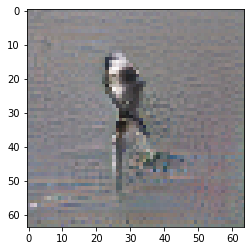

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 20

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.6693160533905 sec
Gen loss: 4.418675977040112, Gen valid loss: 1.2786328340287454, Gen attr loss: 1.59511219905967, Gen caption loss: 1.5449309475053616, Disc valid loss: 1.0934825337676175, Disc valid real loss: 0.5569669366852055, Disc valid fake loss: 0.536515596274761, Disc attr loss: 3.066645397726436, Disc attr real loss: 1.4715331986667664, Disc attr fake loss: 1.59511219905967
Time for epoch 2 is 38.57410192489624 sec
Gen loss: 4.392954664178657, Gen valid loss: 1.2543044347104018, Gen attr loss: 1.5944875763037663, Gen caption loss: 1.5441626562335626, Disc valid loss: 1.093700445602903, Disc valid real loss: 0.5598436535858526, Disc valid fake loss: 0.5338567919362851, Disc attr loss: 3.0663320872841813, Disc attr real loss: 1.4718445109804148, Disc attr fake loss: 1.5944875763037663
Time for epoch 3 is 38.981910705566406 sec
Gen loss: 4.

Time for epoch 21 is 38.711474657058716 sec
Gen loss: 4.409503932890853, Gen valid loss: 1.2706116177848361, Gen attr loss: 1.5915309697954958, Gen caption loss: 1.547361351287139, Disc valid loss: 1.0970831967304715, Disc valid real loss: 0.5601695624147327, Disc valid fake loss: 0.5369136339926784, Disc attr loss: 3.0627902927114388, Disc attr real loss: 1.471259322915943, Disc attr fake loss: 1.5915309697954958
Time for epoch 22 is 38.63815093040466 sec
Gen loss: 4.394536596649708, Gen valid loss: 1.2586492350107932, Gen attr loss: 1.5942843580633643, Gen caption loss: 1.5416030047062612, Disc valid loss: 1.0942350666374372, Disc valid real loss: 0.5596288655023911, Disc valid fake loss: 0.5346062001658649, Disc attr loss: 3.065400897971983, Disc attr real loss: 1.4711165399086186, Disc attr fake loss: 1.5942843580633643
Time for epoch 23 is 38.64819669723511 sec
Gen loss: 4.4038593336172545, Gen valid loss: 1.2647481922534747, Gen attr loss: 1.5940279091599834, Gen caption loss: 1.

Time for epoch 41 is 38.56706476211548 sec
Gen loss: 4.382432210736159, Gen valid loss: 1.245272123716711, Gen attr loss: 1.5932600924639198, Gen caption loss: 1.5438999835714737, Disc valid loss: 1.1059895056049998, Disc valid real loss: 0.5623979518407083, Disc valid fake loss: 0.5435915548142379, Disc attr loss: 3.064323766121696, Disc attr real loss: 1.4710636736577765, Disc attr fake loss: 1.5932600924639198
Time for epoch 42 is 38.60123586654663 sec
Gen loss: 4.40853271704056, Gen valid loss: 1.271828812635365, Gen attr loss: 1.59245704635372, Gen caption loss: 1.5442468735583752, Disc valid loss: 1.0856246185819631, Disc valid real loss: 0.5521054150773904, Disc valid fake loss: 0.5335192019700358, Disc attr loss: 3.06300507651435, Disc attr real loss: 1.47054803016063, Disc attr fake loss: 1.59245704635372
Time for epoch 43 is 38.54257893562317 sec
Gen loss: 4.40169786243904, Gen valid loss: 1.2737089030464814, Gen attr loss: 1.586520779100537, Gen caption loss: 1.5414682025831

Time for epoch 61 is 38.66144061088562 sec
Gen loss: 4.41273436184498, Gen valid loss: 1.277858187674184, Gen attr loss: 1.591620244630953, Gen caption loss: 1.543255905471843, Disc valid loss: 1.0963495473874616, Disc valid real loss: 0.5583794153318172, Disc valid fake loss: 0.5379701326210001, Disc attr loss: 3.0613802002697454, Disc attr real loss: 1.4697599556387924, Disc attr fake loss: 1.591620244630953
Time for epoch 62 is 38.59806799888611 sec
Gen loss: 4.40448225998297, Gen valid loss: 1.2703006128631633, Gen attr loss: 1.5930099151321866, Gen caption loss: 1.5411717297261969, Disc valid loss: 1.0894032443765056, Disc valid real loss: 0.5541022545115412, Disc valid fake loss: 0.5353009904303202, Disc attr loss: 3.0628842331852693, Disc attr real loss: 1.4698743180530827, Disc attr fake loss: 1.5930099151321866
Time for epoch 63 is 38.60801887512207 sec
Gen loss: 4.418355543762042, Gen valid loss: 1.2753141451334242, Gen attr loss: 1.5945176994251364, Gen caption loss: 1.54852

Time for epoch 81 is 38.467422008514404 sec
Gen loss: 4.390071524514092, Gen valid loss: 1.2592079752505956, Gen attr loss: 1.5886865912414179, Gen caption loss: 1.5421769751442804, Disc valid loss: 1.1061358823362728, Disc valid real loss: 0.5628414238856091, Disc valid fake loss: 0.543294461842798, Disc attr loss: 3.0575316301206263, Disc attr real loss: 1.4688450388792085, Disc attr fake loss: 1.5886865912414179
Time for epoch 82 is 38.472800493240356 sec
Gen loss: 4.404086853430523, Gen valid loss: 1.2674619419787958, Gen attr loss: 1.5931630968078365, Gen caption loss: 1.5434618122209378, Disc valid loss: 1.0850312910105802, Disc valid real loss: 0.5515936229448655, Disc valid fake loss: 0.533437667581124, Disc attr loss: 3.062267116414822, Disc attr real loss: 1.4691040196069858, Disc attr fake loss: 1.5931630968078365
Time for epoch 83 is 38.517088890075684 sec
Gen loss: 4.405850435014017, Gen valid loss: 1.2701683963540447, Gen attr loss: 1.5930388287153994, Gen caption loss: 1

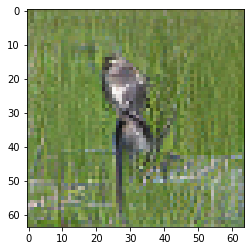

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 21

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.331846475601196 sec
Gen loss: 4.408280594239067, Gen valid loss: 1.265101080502921, Gen attr loss: 1.5953965991493162, Gen caption loss: 1.5477829199173263, Disc valid loss: 1.0913220180405512, Disc valid real loss: 0.5560121255999981, Disc valid fake loss: 0.5353098888061234, Disc attr loss: 3.063734292337888, Disc attr real loss: 1.4683376931885717, Disc attr fake loss: 1.5953965991493162
Time for epoch 2 is 38.49858832359314 sec
Gen loss: 4.412296436666473, Gen valid loss: 1.274059569932581, Gen attr loss: 1.593427511734691, Gen caption loss: 1.5448093566145031, Disc valid loss: 1.0888278019137498, Disc valid real loss: 0.5541583990178457, Disc valid fake loss: 0.5346693999883605, Disc attr loss: 3.0621930628934204, Disc attr real loss: 1.4687655511587292, Disc attr fake loss: 1.593427511734691
Time for epoch 3 is 38.46347212791443 sec
Gen loss:

Time for epoch 21 is 39.10416221618652 sec
Gen loss: 4.387882509851844, Gen valid loss: 1.2540307526342913, Gen attr loss: 1.5914206388520031, Gen caption loss: 1.5424311212730926, Disc valid loss: 1.0980501428529177, Disc valid real loss: 0.5593069346778115, Disc valid fake loss: 0.5387432071251598, Disc attr loss: 3.0589561640085567, Disc attr real loss: 1.4675355251565536, Disc attr fake loss: 1.5914206388520031
Time for epoch 22 is 39.098806381225586 sec
Gen loss: 4.392673514399748, Gen valid loss: 1.2632784008333677, Gen attr loss: 1.5906277390999524, Gen caption loss: 1.5387673807661062, Disc valid loss: 1.092410639857212, Disc valid real loss: 0.5547825585858932, Disc valid fake loss: 0.5376280822405001, Disc attr loss: 3.0577184753366278, Disc attr real loss: 1.4670907362366756, Disc attr fake loss: 1.5906277390999524
Time for epoch 23 is 39.10945510864258 sec
Gen loss: 4.41403864263519, Gen valid loss: 1.2751602486866276, Gen attr loss: 1.5948422404162605, Gen caption loss: 1.

Time for epoch 41 is 39.09179091453552 sec
Gen loss: 4.393698947539497, Gen valid loss: 1.2607058751873854, Gen attr loss: 1.5930938097196543, Gen caption loss: 1.5398992477716793, Disc valid loss: 1.0979849831844732, Disc valid real loss: 0.5589973888584592, Disc valid fake loss: 0.5389875940029537, Disc attr loss: 3.059932115924391, Disc attr real loss: 1.4668383062047363, Disc attr fake loss: 1.5930938097196543
Time for epoch 42 is 39.13415050506592 sec
Gen loss: 4.407032816713741, Gen valid loss: 1.267721349307838, Gen attr loss: 1.594984921982618, Gen caption loss: 1.5443265350853526, Disc valid loss: 1.090254826435875, Disc valid real loss: 0.5525190082345874, Disc valid fake loss: 0.5377358175551665, Disc attr loss: 3.0615046638137278, Disc attr real loss: 1.46651974183111, Disc attr fake loss: 1.594984921982618
Time for epoch 43 is 39.085099935531616 sec
Gen loss: 4.4046954888961505, Gen valid loss: 1.2652321488553593, Gen attr loss: 1.593135964256638, Gen caption loss: 1.54632

Time for epoch 61 is 39.10992789268494 sec
Gen loss: 4.425234950331815, Gen valid loss: 1.272207084063915, Gen attr loss: 1.601011346349225, Gen caption loss: 1.5520165221800972, Disc valid loss: 1.09334677102443, Disc valid real loss: 0.5559999972662628, Disc valid fake loss: 0.5373467761811203, Disc attr loss: 3.0665578977848456, Disc attr real loss: 1.4655465514356205, Disc attr fake loss: 1.601011346349225
Time for epoch 62 is 39.08910799026489 sec
Gen loss: 4.4074218712525, Gen valid loss: 1.2718665359142995, Gen attr loss: 1.591287903023283, Gen caption loss: 1.5442674227846347, Disc valid loss: 1.0885506191550878, Disc valid real loss: 0.5529425035970321, Disc valid fake loss: 0.5356081178194785, Disc attr loss: 3.0567351427827747, Disc attr real loss: 1.4654472397594918, Disc attr fake loss: 1.591287903023283
Time for epoch 63 is 39.176363468170166 sec
Gen loss: 4.408451363323181, Gen valid loss: 1.2699841126839966, Gen attr loss: 1.5936776586987462, Gen caption loss: 1.5447895

Time for epoch 81 is 39.122052907943726 sec
Gen loss: 4.415905254643138, Gen valid loss: 1.277932753246328, Gen attr loss: 1.595373156594067, Gen caption loss: 1.5425993452873334, Disc valid loss: 1.0923810344401415, Disc valid real loss: 0.5575701872992321, Disc valid fake loss: 0.5348108474639696, Disc attr loss: 3.060161532748359, Disc attr real loss: 1.4647883761542921, Disc attr fake loss: 1.595373156594067
Time for epoch 82 is 39.136743783950806 sec
Gen loss: 4.379589407101556, Gen valid loss: 1.252383243908404, Gen attr loss: 1.5891540506021764, Gen caption loss: 1.5380521211520766, Disc valid loss: 1.105503517760817, Disc valid real loss: 0.5630497643295019, Disc valid fake loss: 0.5424537523006036, Disc attr loss: 3.0540561750329283, Disc attr real loss: 1.464902124430752, Disc attr fake loss: 1.5891540506021764
Time for epoch 83 is 39.10436129570007 sec
Gen loss: 4.403752566676153, Gen valid loss: 1.2674979974583882, Gen attr loss: 1.5947331422712745, Gen caption loss: 1.5415

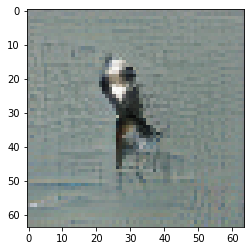

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 22

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.83510184288025 sec
Gen loss: 4.4058593107755915, Gen valid loss: 1.2680473692694976, Gen attr loss: 1.5913705241066332, Gen caption loss: 1.546441409646011, Disc valid loss: 1.0969822810594305, Disc valid real loss: 0.5565541053852092, Disc valid fake loss: 0.5404281789855905, Disc attr loss: 3.055452700875962, Disc attr real loss: 1.464082176769329, Disc attr fake loss: 1.5913705241066332
Time for epoch 2 is 39.0731565952301 sec
Gen loss: 4.398061635371469, Gen valid loss: 1.2677488884305566, Gen attr loss: 1.5884410927935344, Gen caption loss: 1.5418716510783044, Disc valid loss: 1.0929023313328503, Disc valid real loss: 0.556510357998897, Disc valid fake loss: 0.536391974787725, Disc attr loss: 3.0516291281718226, Disc attr real loss: 1.4631880353782882, Disc attr fake loss: 1.5884410927935344
Time for epoch 3 is 39.0880069732666 sec
Gen loss: 4

Time for epoch 21 is 39.039376974105835 sec
Gen loss: 4.396179866661547, Gen valid loss: 1.2660343910297405, Gen attr loss: 1.5888706681528066, Gen caption loss: 1.541274822501309, Disc valid loss: 1.0968063979291012, Disc valid real loss: 0.5595628137026376, Disc valid fake loss: 0.5372435860032958, Disc attr loss: 3.051528048063035, Disc attr real loss: 1.4626573799102287, Disc attr fake loss: 1.5888706681528066
Time for epoch 22 is 39.09571576118469 sec
Gen loss: 4.414799316788754, Gen valid loss: 1.28259344314172, Gen attr loss: 1.5903193120387835, Gen caption loss: 1.5418865771151493, Disc valid loss: 1.0828893963237443, Disc valid real loss: 0.5483651388951434, Disc valid fake loss: 0.534524256701715, Disc attr loss: 3.0537856242197963, Disc attr real loss: 1.4634663121810128, Disc attr fake loss: 1.5903193120387835
Time for epoch 23 is 39.06555223464966 sec
Gen loss: 4.418538731288135, Gen valid loss: 1.2841658815135801, Gen attr loss: 1.5923460169536312, Gen caption loss: 1.542

Time for epoch 41 is 39.0678436756134 sec
Gen loss: 4.382175316332479, Gen valid loss: 1.257264573076553, Gen attr loss: 1.5876837923597837, Gen caption loss: 1.5372269657569202, Disc valid loss: 1.1053743210588367, Disc valid real loss: 0.5633102088439755, Disc valid fake loss: 0.5420641155262304, Disc attr loss: 3.0501566178753445, Disc attr real loss: 1.462472825515561, Disc attr fake loss: 1.5876837923597837
Time for epoch 42 is 39.072731018066406 sec
Gen loss: 4.404463724715277, Gen valid loss: 1.2725284442022886, Gen attr loss: 1.5905778039761675, Gen caption loss: 1.5413574917206596, Disc valid loss: 1.0911684086329245, Disc valid real loss: 0.555432589558082, Disc valid fake loss: 0.5357358198017286, Disc attr loss: 3.05300427840008, Disc attr real loss: 1.4624264744239124, Disc attr fake loss: 1.5905778039761675
Time for epoch 43 is 39.09590792655945 sec
Gen loss: 4.39423113592918, Gen valid loss: 1.2671081126543888, Gen attr loss: 1.586601370718421, Gen caption loss: 1.540521

Time for epoch 61 is 38.99982666969299 sec
Gen loss: 4.406613806075843, Gen valid loss: 1.2744251675399014, Gen attr loss: 1.5915334780364825, Gen caption loss: 1.540655146123271, Disc valid loss: 1.0947744318140231, Disc valid real loss: 0.5555575066788733, Disc valid fake loss: 0.5392169248120895, Disc attr loss: 3.0533332785939784, Disc attr real loss: 1.4617998005574957, Disc attr fake loss: 1.5915334780364825
Time for epoch 62 is 38.98855376243591 sec
Gen loss: 4.407961921640205, Gen valid loss: 1.2769156421426189, Gen attr loss: 1.5908563453653641, Gen caption loss: 1.5401899297709065, Disc valid loss: 1.0876760353563923, Disc valid real loss: 0.5508349394895197, Disc valid fake loss: 0.536841095301517, Disc attr loss: 3.05273682993602, Disc attr real loss: 1.4618804845706557, Disc attr fake loss: 1.5908563453653641
Time for epoch 63 is 38.942070960998535 sec
Gen loss: 4.399300138478679, Gen valid loss: 1.2696256894406264, Gen attr loss: 1.5885585853400914, Gen caption loss: 1.54

Time for epoch 81 is 38.73845171928406 sec
Gen loss: 4.41356450949258, Gen valid loss: 1.2710774674971252, Gen attr loss: 1.5944053238323388, Gen caption loss: 1.5480817181631155, Disc valid loss: 1.1001485125805304, Disc valid real loss: 0.5643497025417442, Disc valid fake loss: 0.5357988078581285, Disc attr loss: 3.0554430888597235, Disc attr real loss: 1.4610377650273847, Disc attr fake loss: 1.5944053238323388
Time for epoch 82 is 38.775717973709106 sec
Gen loss: 4.396866740250006, Gen valid loss: 1.2655609387369338, Gen attr loss: 1.5907837036179333, Gen caption loss: 1.540522121801609, Disc valid loss: 1.0909007538947955, Disc valid real loss: 0.5539911975705527, Disc valid fake loss: 0.5369095560011825, Disc attr loss: 3.052398275876756, Disc attr real loss: 1.4616145722588227, Disc attr fake loss: 1.5907837036179333
Time for epoch 83 is 38.77491474151611 sec
Gen loss: 4.411345394000128, Gen valid loss: 1.2760964275052553, Gen attr loss: 1.5927751762111013, Gen caption loss: 1.5

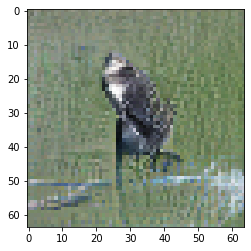

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 23

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.964070320129395 sec
Gen loss: 4.402941653398964, Gen valid loss: 1.2640650895875967, Gen attr loss: 1.5947527704523186, Gen caption loss: 1.5441237936821088, Disc valid loss: 1.1033996537448914, Disc valid real loss: 0.5646632276576385, Disc valid fake loss: 0.5387364277025548, Disc attr loss: 3.055695791554645, Disc attr real loss: 1.4609430211023264, Disc attr fake loss: 1.5947527704523186
Time for epoch 2 is 39.00985908508301 sec
Gen loss: 4.40619976604534, Gen valid loss: 1.269430158261038, Gen attr loss: 1.5927380329871241, Gen caption loss: 1.5440315912732587, Disc valid loss: 1.0896905723626051, Disc valid real loss: 0.5515831904359626, Disc valid fake loss: 0.5381073823304681, Disc attr loss: 3.0533737260797804, Disc attr real loss: 1.4606356930926563, Disc attr fake loss: 1.5927380329871241
Time for epoch 3 is 38.92090082168579 sec
Gen los

Time for epoch 21 is 38.7381649017334 sec
Gen loss: 4.411451341660042, Gen valid loss: 1.2800229027019283, Gen attr loss: 1.5903173471853984, Gen caption loss: 1.5411110929034266, Disc valid loss: 1.0903394960452548, Disc valid real loss: 0.554557134142413, Disc valid fake loss: 0.5357823646488552, Disc attr loss: 3.0513532055102712, Disc attr real loss: 1.4610358583248728, Disc attr fake loss: 1.5903173471853984
Time for epoch 22 is 38.7108154296875 sec
Gen loss: 4.421033163380817, Gen valid loss: 1.2850421327885573, Gen attr loss: 1.5941614090265621, Gen caption loss: 1.5418296235040598, Disc valid loss: 1.0888522789084167, Disc valid real loss: 0.553414954079522, Disc valid fake loss: 0.5354373243443042, Disc attr loss: 3.054890607753743, Disc attr real loss: 1.4607291987271813, Disc attr fake loss: 1.5941614090265621
Time for epoch 23 is 38.98483347892761 sec
Gen loss: 4.40930839734995, Gen valid loss: 1.265447048636956, Gen attr loss: 1.59760454902804, Gen caption loss: 1.54625680

Time for epoch 41 is 38.818397760391235 sec
Gen loss: 4.396634917272139, Gen valid loss: 1.269545463365591, Gen attr loss: 1.5890448536007062, Gen caption loss: 1.5380446025672643, Disc valid loss: 1.095602360036638, Disc valid real loss: 0.5564367829299555, Disc valid fake loss: 0.5391655773489779, Disc attr loss: 3.048946477856416, Disc attr real loss: 1.4599016242557101, Disc attr fake loss: 1.5890448536007062
Time for epoch 42 is 38.8374810218811 sec
Gen loss: 4.412623721409619, Gen valid loss: 1.2738209815852364, Gen attr loss: 1.5935571119391174, Gen caption loss: 1.5452456080170505, Disc valid loss: 1.0913188564098948, Disc valid real loss: 0.552749430180242, Disc valid fake loss: 0.5385694268757735, Disc attr loss: 3.053778428372329, Disc attr real loss: 1.4602213164332114, Disc attr fake loss: 1.5935571119391174
Time for epoch 43 is 38.80628824234009 sec
Gen loss: 4.4058908117495905, Gen valid loss: 1.2738618815171363, Gen attr loss: 1.5908006352137745, Gen caption loss: 1.541

Time for epoch 61 is 38.80361723899841 sec
Gen loss: 4.397989156123423, Gen valid loss: 1.260383301149539, Gen attr loss: 1.58949785762363, Gen caption loss: 1.548108001711569, Disc valid loss: 1.0956280044100795, Disc valid real loss: 0.5552774799386984, Disc valid fake loss: 0.5403505214023073, Disc attr loss: 3.0490399734760687, Disc attr real loss: 1.4595421158524386, Disc attr fake loss: 1.58949785762363
Time for epoch 62 is 38.78792667388916 sec
Gen loss: 4.41431583104741, Gen valid loss: 1.2829195899045887, Gen attr loss: 1.5884239567004568, Gen caption loss: 1.5429722703892363, Disc valid loss: 1.0871411308363523, Disc valid real loss: 0.5558693119827002, Disc valid fake loss: 0.5312718184498267, Disc attr loss: 3.0483780753644822, Disc attr real loss: 1.4599541186640257, Disc attr fake loss: 1.5884239567004568
Time for epoch 63 is 38.81434464454651 sec
Gen loss: 4.408193132095544, Gen valid loss: 1.274633710138843, Gen attr loss: 1.5924245442155254, Gen caption loss: 1.5411348

Time for epoch 81 is 38.640363931655884 sec
Gen loss: 4.4029459824083945, Gen valid loss: 1.2721043789612891, Gen attr loss: 1.59059339745581, Gen caption loss: 1.5402482179445303, Disc valid loss: 1.103994650892449, Disc valid real loss: 0.5635640934553896, Disc valid fake loss: 0.5404305550948714, Disc attr loss: 3.0499978375628714, Disc attr real loss: 1.4594044401070614, Disc attr fake loss: 1.59059339745581
Time for epoch 82 is 38.642587184906006 sec
Gen loss: 4.410139499964107, Gen valid loss: 1.2728878755556536, Gen attr loss: 1.5937774837178589, Gen caption loss: 1.5434741240529832, Disc valid loss: 1.0855857943131673, Disc valid real loss: 0.5523459250687907, Disc valid fake loss: 0.5332398687597859, Disc attr loss: 3.0533122741756076, Disc attr real loss: 1.4595347904577487, Disc attr fake loss: 1.5937774837178589
Time for epoch 83 is 38.60048294067383 sec
Gen loss: 4.4141364356043535, Gen valid loss: 1.2770279602306644, Gen attr loss: 1.5935776485660211, Gen caption loss: 1.

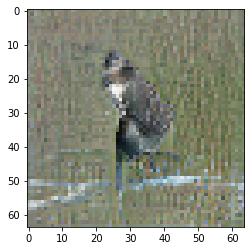

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 24

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.578062772750854 sec
Gen loss: 4.406023584407197, Gen valid loss: 1.2765504900355973, Gen attr loss: 1.5885521861595837, Gen caption loss: 1.5409209114426197, Disc valid loss: 1.0960986536692798, Disc valid real loss: 0.5573156937997192, Disc valid fake loss: 0.5387829623732786, Disc attr loss: 3.0474808125638058, Disc attr real loss: 1.458928626404222, Disc attr fake loss: 1.5885521861595837
Time for epoch 2 is 38.96406626701355 sec
Gen loss: 4.400699150271532, Gen valid loss: 1.2711632763790244, Gen attr loss: 1.5898201908199445, Gen caption loss: 1.5397156812957309, Disc valid loss: 1.089427351790069, Disc valid real loss: 0.5538872772762122, Disc valid fake loss: 0.5355400743523264, Disc attr loss: 3.0486564313170064, Disc attr real loss: 1.4588362404970618, Disc attr fake loss: 1.5898201908199445
Time for epoch 3 is 38.744731187820435 sec
Gen l

Time for epoch 21 is 38.71844244003296 sec
Gen loss: 4.411789621441022, Gen valid loss: 1.279783567761987, Gen attr loss: 1.5898546238901816, Gen caption loss: 1.5421514139588932, Disc valid loss: 1.0937093714388406, Disc valid real loss: 0.554404589218822, Disc valid fake loss: 0.5393047837545555, Disc attr loss: 3.0476704470833464, Disc attr real loss: 1.457815823193165, Disc attr fake loss: 1.5898546238901816
Time for epoch 22 is 38.83316159248352 sec
Gen loss: 4.4019719287955015, Gen valid loss: 1.27605682239946, Gen attr loss: 1.5869738968407237, Gen caption loss: 1.5389412021249291, Disc valid loss: 1.0922582501641458, Disc valid real loss: 0.5570692400622174, Disc valid fake loss: 0.5351890120402907, Disc attr loss: 3.0449749399329913, Disc attr real loss: 1.4580010430922676, Disc attr fake loss: 1.5869738968407237
Time for epoch 23 is 38.38885569572449 sec
Gen loss: 4.406256032830008, Gen valid loss: 1.2696553400861539, Gen attr loss: 1.5916274314327292, Gen caption loss: 1.544

Time for epoch 41 is 38.57393789291382 sec
Gen loss: 4.410827647702804, Gen valid loss: 1.2693440167884515, Gen attr loss: 1.5940977118525725, Gen caption loss: 1.5473859126005716, Disc valid loss: 1.0969724430624386, Disc valid real loss: 0.5572935071417956, Disc valid fake loss: 0.5396789347899316, Disc attr loss: 3.0516967427762864, Disc attr real loss: 1.4575990309237141, Disc attr fake loss: 1.5940977118525725
Time for epoch 42 is 38.53426456451416 sec
Gen loss: 4.396955214864839, Gen valid loss: 1.2674418156386067, Gen attr loss: 1.5911743663513886, Gen caption loss: 1.5383390404667634, Disc valid loss: 1.093049165356127, Disc valid real loss: 0.554949203480873, Disc valid fake loss: 0.5380999653481533, Disc attr loss: 3.048572867866454, Disc attr real loss: 1.4573985015150654, Disc attr fake loss: 1.5911743663513886
Time for epoch 43 is 38.5303750038147 sec
Gen loss: 4.415776018850849, Gen valid loss: 1.2755466794903039, Gen attr loss: 1.5947825640520752, Gen caption loss: 1.545

Time for epoch 61 is 38.54203772544861 sec
Gen loss: 4.418880325668873, Gen valid loss: 1.28625665237587, Gen attr loss: 1.591072106102941, Gen caption loss: 1.5415515631518066, Disc valid loss: 1.099648143540876, Disc valid real loss: 0.5567135192191375, Disc valid fake loss: 0.54293462545245, Disc attr loss: 3.048029647610052, Disc attr real loss: 1.456957541507111, Disc attr fake loss: 1.591072106102941
Time for epoch 62 is 38.56495928764343 sec
Gen loss: 4.397290041776207, Gen valid loss: 1.2658136519313181, Gen attr loss: 1.5909073824481912, Gen caption loss: 1.5405690085274095, Disc valid loss: 1.0890573510309545, Disc valid real loss: 0.5565481371672819, Disc valid fake loss: 0.5325092128137263, Disc attr loss: 3.048057030856125, Disc attr real loss: 1.4571496484079336, Disc attr fake loss: 1.5909073824481912
Time for epoch 63 is 38.592880964279175 sec
Gen loss: 4.401649281261413, Gen valid loss: 1.2696717570467693, Gen attr loss: 1.5890015247391491, Gen caption loss: 1.54297600

Time for epoch 81 is 38.76955819129944 sec
Gen loss: 4.405934809992307, Gen valid loss: 1.2732853356415663, Gen attr loss: 1.5910320831185112, Gen caption loss: 1.5416173841249006, Disc valid loss: 1.0924050966252479, Disc valid real loss: 0.5521573878239164, Disc valid fake loss: 0.5402477101743383, Disc attr loss: 3.047769925135584, Disc attr real loss: 1.456737842017073, Disc attr fake loss: 1.5910320831185112
Time for epoch 82 is 38.821622371673584 sec
Gen loss: 4.412481459175668, Gen valid loss: 1.280708862837091, Gen attr loss: 1.5878222702641474, Gen caption loss: 1.5439503238130068, Disc valid loss: 1.0872745213469839, Disc valid real loss: 0.5523255956043719, Disc valid fake loss: 0.5349489299423973, Disc attr loss: 3.0445843065980327, Disc attr real loss: 1.4567620363338853, Disc attr fake loss: 1.5878222702641474
Time for epoch 83 is 38.61439895629883 sec
Gen loss: 4.421539763448038, Gen valid loss: 1.2834082433201757, Gen attr loss: 1.5938630304362393, Gen caption loss: 1.5

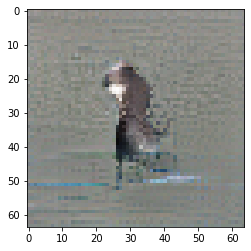

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 25

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.38042449951172 sec
Gen loss: 4.403939302051617, Gen valid loss: 1.2666652181607274, Gen attr loss: 1.5937176480848938, Gen caption loss: 1.543556434029163, Disc valid loss: 1.0978715443998817, Disc valid real loss: 0.555135352340171, Disc valid fake loss: 0.5427361933519523, Disc attr loss: 3.0492676987557554, Disc attr real loss: 1.4555500506708616, Disc attr fake loss: 1.5937176480848938
Time for epoch 2 is 38.54552626609802 sec
Gen loss: 4.418405071506656, Gen valid loss: 1.2809690585950526, Gen attr loss: 1.593257156814017, Gen caption loss: 1.5441788670816397, Disc valid loss: 1.0832555693016466, Disc valid real loss: 0.547814155497202, Disc valid fake loss: 0.535441413319854, Disc attr loss: 3.048791269622844, Disc attr real loss: 1.455534112808827, Disc attr fake loss: 1.593257156814017
Time for epoch 3 is 38.37029981613159 sec
Gen loss: 4.4

Time for epoch 21 is 38.33124589920044 sec
Gen loss: 4.399684053772511, Gen valid loss: 1.2681099877447939, Gen attr loss: 1.5916108684488106, Gen caption loss: 1.5399632214853758, Disc valid loss: 1.106595952982502, Disc valid real loss: 0.560269452449752, Disc valid fake loss: 0.5463264984328572, Disc attr loss: 3.0468659898452968, Disc attr real loss: 1.455255121396486, Disc attr fake loss: 1.5916108684488106
Time for epoch 22 is 38.39648413658142 sec
Gen loss: 4.408948725155052, Gen valid loss: 1.2707820772155514, Gen attr loss: 1.5948576371521161, Gen caption loss: 1.5433090114335057, Disc valid loss: 1.0919259124332004, Disc valid real loss: 0.5569851931517686, Disc valid fake loss: 0.5349407163738882, Disc attr loss: 3.0492041072225184, Disc attr real loss: 1.454346470070402, Disc attr fake loss: 1.5948576371521161
Time for epoch 23 is 38.345712184906006 sec
Gen loss: 4.415354790080207, Gen valid loss: 1.2772099832855266, Gen attr loss: 1.5921132858529647, Gen caption loss: 1.54

Time for epoch 41 is 38.360177516937256 sec
Gen loss: 4.4185766534107485, Gen valid loss: 1.2755622259646573, Gen attr loss: 1.5963744354764944, Gen caption loss: 1.5466399829239057, Disc valid loss: 1.0949956802171743, Disc valid real loss: 0.556241398339026, Disc valid fake loss: 0.5387542783244839, Disc attr loss: 3.050855675040868, Disc attr real loss: 1.4544812395643736, Disc attr fake loss: 1.5963744354764944
Time for epoch 42 is 38.34947872161865 sec
Gen loss: 4.446443396855176, Gen valid loss: 1.2890410189060015, Gen attr loss: 1.6024415780535235, Gen caption loss: 1.5549608036108455, Disc valid loss: 1.087335809298001, Disc valid real loss: 0.5544478545182443, Disc valid fake loss: 0.532887955829703, Disc attr loss: 3.056759395896581, Disc attr real loss: 1.4543178178430574, Disc attr fake loss: 1.6024415780535235
Time for epoch 43 is 38.35680413246155 sec
Gen loss: 4.412398188417843, Gen valid loss: 1.272561861893672, Gen attr loss: 1.5939771699388499, Gen caption loss: 1.545

Time for epoch 61 is 38.27410864830017 sec
Gen loss: 4.390280599516582, Gen valid loss: 1.2608690050236255, Gen attr loss: 1.5892890998664586, Gen caption loss: 1.5401224931727258, Disc valid loss: 1.1071033681311258, Disc valid real loss: 0.5600574144179905, Disc valid fake loss: 0.5470459538746656, Disc attr loss: 3.0426091540473585, Disc attr real loss: 1.4533200541809, Disc attr fake loss: 1.5892890998664586
Time for epoch 62 is 38.28857398033142 sec
Gen loss: 4.392744651654872, Gen valid loss: 1.2653630782918233, Gen attr loss: 1.5890170096704954, Gen caption loss: 1.5383645496394254, Disc valid loss: 1.0970550281245535, Disc valid real loss: 0.5568552391961984, Disc valid fake loss: 0.540199787313053, Disc attr loss: 3.0426670978385904, Disc attr real loss: 1.4536500881680952, Disc attr fake loss: 1.5890170096704954
Time for epoch 63 is 38.266642332077026 sec
Gen loss: 4.398843252884986, Gen valid loss: 1.2620539485923643, Gen attr loss: 1.5920496242156197, Gen caption loss: 1.54

Time for epoch 81 is 38.31383943557739 sec
Gen loss: 4.420469710497352, Gen valid loss: 1.2777517517084676, Gen attr loss: 1.5936322541740853, Gen caption loss: 1.549085709783766, Disc valid loss: 1.092204469813887, Disc valid real loss: 0.5531347897156145, Disc valid fake loss: 0.5390696771099639, Disc attr loss: 3.0457903272737332, Disc attr real loss: 1.4521580730996482, Disc attr fake loss: 1.5936322541740853
Time for epoch 82 is 38.241339445114136 sec
Gen loss: 4.3980941539857445, Gen valid loss: 1.264106176409941, Gen attr loss: 1.5904359969343274, Gen caption loss: 1.54355198354902, Disc valid loss: 1.0975587678149463, Disc valid real loss: 0.5568248241897521, Disc valid fake loss: 0.5407339447559056, Disc attr loss: 3.0431177719498717, Disc attr real loss: 1.452681775015544, Disc attr fake loss: 1.5904359969343274
Time for epoch 83 is 38.2568302154541 sec
Gen loss: 4.384816188476273, Gen valid loss: 1.26130420987199, Gen attr loss: 1.5874206538445905, Gen caption loss: 1.536091

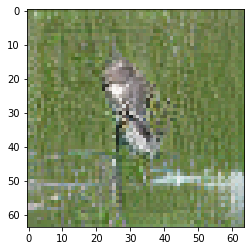

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 26

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.95141959190369 sec
Gen loss: 4.404739072329306, Gen valid loss: 1.272186152657196, Gen attr loss: 1.591073784078686, Gen caption loss: 1.5414791281630353, Disc valid loss: 1.0953541157368398, Disc valid real loss: 0.5551904122519299, Disc valid fake loss: 0.5401637055848026, Disc attr loss: 3.043443684978537, Disc attr real loss: 1.452369900899851, Disc attr fake loss: 1.591073784078686
Time for epoch 2 is 38.48982071876526 sec
Gen loss: 4.4118440790874205, Gen valid loss: 1.2779705424295855, Gen attr loss: 1.594418850371508, Gen caption loss: 1.5394546846710246, Disc valid loss: 1.090495510960659, Disc valid real loss: 0.5495863496288051, Disc valid fake loss: 0.5409091610087935, Disc attr loss: 3.04660671480949, Disc attr real loss: 1.452187864437982, Disc attr fake loss: 1.594418850371508
Time for epoch 3 is 38.22129511833191 sec
Gen loss: 4.418

Time for epoch 21 is 38.02134990692139 sec
Gen loss: 4.40771992872078, Gen valid loss: 1.2760777261845142, Gen attr loss: 1.5905728944271884, Gen caption loss: 1.5410693118242713, Disc valid loss: 1.0930170348989285, Disc valid real loss: 0.5538854048988684, Disc valid fake loss: 0.5391316323422481, Disc attr loss: 3.04221934160889, Disc attr real loss: 1.4516464471817017, Disc attr fake loss: 1.5905728944271884
Time for epoch 22 is 38.06661343574524 sec
Gen loss: 4.40520404800167, Gen valid loss: 1.2741444514695868, Gen attr loss: 1.5903730489374177, Gen caption loss: 1.5406865450101817, Disc valid loss: 1.0909827748934429, Disc valid real loss: 0.5558139293335964, Disc valid fake loss: 0.5351688441868397, Disc attr loss: 3.0412613760811205, Disc attr real loss: 1.4508883271437027, Disc attr fake loss: 1.5903730489374177
Time for epoch 23 is 38.110015630722046 sec
Gen loss: 4.401848347852547, Gen valid loss: 1.2652522727725952, Gen attr loss: 1.5911169410721073, Gen caption loss: 1.54

Time for epoch 41 is 38.120095014572144 sec
Gen loss: 4.4192978392448525, Gen valid loss: 1.2803141663714153, Gen attr loss: 1.592604453001565, Gen caption loss: 1.5463792279483826, Disc valid loss: 1.0949144368249226, Disc valid real loss: 0.5568476466305534, Disc valid fake loss: 0.5380667901136041, Disc attr loss: 3.043553259637621, Disc attr real loss: 1.4509488066360556, Disc attr fake loss: 1.592604453001565
Time for epoch 42 is 38.07038450241089 sec
Gen loss: 4.402931396877216, Gen valid loss: 1.2732924610618654, Gen attr loss: 1.5916022491971975, Gen caption loss: 1.5380366917871202, Disc valid loss: 1.0929441831622344, Disc valid real loss: 0.5516188565470016, Disc valid fake loss: 0.5413253301688972, Disc attr loss: 3.0425291210009155, Disc attr real loss: 1.4509268718037178, Disc attr fake loss: 1.5916022491971975
Time for epoch 43 is 38.34182596206665 sec
Gen loss: 4.4106392052761585, Gen valid loss: 1.2764012689189859, Gen attr loss: 1.5902478220016976, Gen caption loss: 1

Time for epoch 61 is 38.54423642158508 sec
Gen loss: 4.419241113714409, Gen valid loss: 1.2882947608384336, Gen attr loss: 1.590086180020154, Gen caption loss: 1.540860166717674, Disc valid loss: 1.0899631360035924, Disc valid real loss: 0.5541813452715473, Disc valid fake loss: 0.5357817904897498, Disc attr loss: 3.0396853675687217, Disc attr real loss: 1.4495991875485676, Disc attr fake loss: 1.590086180020154
Time for epoch 62 is 38.69644045829773 sec
Gen loss: 4.397626760529309, Gen valid loss: 1.2712717708856434, Gen attr loss: 1.5877013461699654, Gen caption loss: 1.5386536531655124, Disc valid loss: 1.0973960807329917, Disc valid real loss: 0.5571948501475781, Disc valid fake loss: 0.5402012296162324, Disc attr loss: 3.037822514045529, Disc attr real loss: 1.4501211678755639, Disc attr fake loss: 1.5877013461699654
Time for epoch 63 is 38.60789132118225 sec
Gen loss: 4.400485054264224, Gen valid loss: 1.2682772782759937, Gen attr loss: 1.590951984813866, Gen caption loss: 1.5412

Time for epoch 81 is 38.93892788887024 sec
Gen loss: 4.402067952685886, Gen valid loss: 1.2672372620280197, Gen attr loss: 1.592765597147024, Gen caption loss: 1.5420651032026544, Disc valid loss: 1.0969823660243172, Disc valid real loss: 0.5600695459015648, Disc valid fake loss: 0.5369128217380544, Disc attr loss: 3.042854147228768, Disc attr real loss: 1.4500885500817442, Disc attr fake loss: 1.592765597147024
Time for epoch 82 is 38.639148235321045 sec
Gen loss: 4.403707057802981, Gen valid loss: 1.2669467859798007, Gen attr loss: 1.5926681708514205, Gen caption loss: 1.5440920953182025, Disc valid loss: 1.0952207623781551, Disc valid real loss: 0.555355206414613, Disc valid fake loss: 0.5398655572557837, Disc attr loss: 3.0424758696620704, Disc attr real loss: 1.4498076988106499, Disc attr fake loss: 1.5926681708514205
Time for epoch 83 is 39.04835391044617 sec
Gen loss: 4.416239618932005, Gen valid loss: 1.2769372175702558, Gen attr loss: 1.5935871462188762, Gen caption loss: 1.54

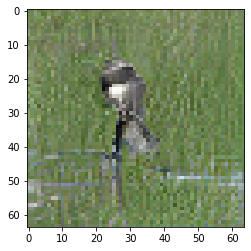

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 27

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.90960764884949 sec
Gen loss: 4.401990836228782, Gen valid loss: 1.2723479132019084, Gen attr loss: 1.5887161632217366, Gen caption loss: 1.540926758512895, Disc valid loss: 1.1007835084829873, Disc valid real loss: 0.5587121506693563, Disc valid fake loss: 0.5420713545830269, Disc attr loss: 3.0382941977441473, Disc attr real loss: 1.4495780345224107, Disc attr fake loss: 1.5887161632217366
Time for epoch 2 is 39.075451374053955 sec
Gen loss: 4.417139708511228, Gen valid loss: 1.279550799509374, Gen attr loss: 1.5942562178867619, Gen caption loss: 1.5433327046836294, Disc valid loss: 1.0902186357555028, Disc valid real loss: 0.5550028510533052, Disc valid fake loss: 0.5352157835714862, Disc attr loss: 3.043718839402444, Disc attr real loss: 1.4494626215156825, Disc attr fake loss: 1.5942562178867619
Time for epoch 3 is 38.87566876411438 sec
Gen los

Time for epoch 21 is 39.171929597854614 sec
Gen loss: 4.3908481416986564, Gen valid loss: 1.2545065240162174, Gen attr loss: 1.5909973231111438, Gen caption loss: 1.5453442855256037, Disc valid loss: 1.1027191869288602, Disc valid real loss: 0.5552723935141473, Disc valid fake loss: 0.5474467924455317, Disc attr loss: 3.039563664898963, Disc attr real loss: 1.448566341787819, Disc attr fake loss: 1.5909973231111438
Time for epoch 22 is 39.12675666809082 sec
Gen loss: 4.403963822982498, Gen valid loss: 1.2699638970176055, Gen attr loss: 1.5915862357390282, Gen caption loss: 1.5424136892566835, Disc valid loss: 1.0944413121153669, Disc valid real loss: 0.5577217107058218, Disc valid fake loss: 0.5367196016518404, Disc attr loss: 3.040644576232931, Disc attr real loss: 1.4490583404939026, Disc attr fake loss: 1.5915862357390282
Time for epoch 23 is 39.14956521987915 sec
Gen loss: 4.408437302442101, Gen valid loss: 1.28103155043067, Gen attr loss: 1.5885885391778094, Gen caption loss: 1.53

Time for epoch 41 is 39.104387044906616 sec
Gen loss: 4.408855767107914, Gen valid loss: 1.2738333925968264, Gen attr loss: 1.5922214086785873, Gen caption loss: 1.542800967609333, Disc valid loss: 1.0927571781928622, Disc valid real loss: 0.5541400423217918, Disc valid fake loss: 0.5386171351441846, Disc attr loss: 3.040447308442134, Disc attr real loss: 1.4482258997635467, Disc attr fake loss: 1.5922214086785873
Time for epoch 42 is 39.080018043518066 sec
Gen loss: 4.414373342260759, Gen valid loss: 1.2774399476968823, Gen attr loss: 1.5922597969773662, Gen caption loss: 1.544673599847933, Disc valid loss: 1.0887856215319336, Disc valid real loss: 0.555688494023915, Disc valid fake loss: 0.5330971278310791, Disc attr loss: 3.0407182821413365, Disc attr real loss: 1.4484584851639704, Disc attr fake loss: 1.5922597969773662
Time for epoch 43 is 39.13205575942993 sec
Gen loss: 4.404039315738006, Gen valid loss: 1.2771192966760982, Gen attr loss: 1.5872123516025904, Gen caption loss: 1.5

Time for epoch 61 is 39.116191148757935 sec
Gen loss: 4.407515248632043, Gen valid loss: 1.2702243911218514, Gen attr loss: 1.592470512803654, Gen caption loss: 1.544820343252766, Disc valid loss: 1.0993730744049155, Disc valid real loss: 0.5589431357092973, Disc valid fake loss: 0.5404299382110275, Disc attr loss: 3.040627567425653, Disc attr real loss: 1.4481570546219988, Disc attr fake loss: 1.592470512803654
Time for epoch 62 is 39.07147932052612 sec
Gen loss: 4.408249909961773, Gen valid loss: 1.2739307529881072, Gen attr loss: 1.5905356788376805, Gen caption loss: 1.543783477328334, Disc valid loss: 1.089446631711996, Disc valid real loss: 0.5552219157296467, Disc valid fake loss: 0.5342247159015842, Disc attr loss: 3.0385850655031077, Disc attr real loss: 1.448049386665427, Disc attr fake loss: 1.5905356788376805
Time for epoch 63 is 39.052570819854736 sec
Gen loss: 4.41070242561299, Gen valid loss: 1.2790397386240766, Gen attr loss: 1.5899883382688693, Gen caption loss: 1.54167

Time for epoch 81 is 39.05952000617981 sec
Gen loss: 4.4146702069900225, Gen valid loss: 1.2750898733694702, Gen attr loss: 1.5937969077247267, Gen caption loss: 1.5457834202422682, Disc valid loss: 1.0946750107819472, Disc valid real loss: 0.5542887031708953, Disc valid fake loss: 0.5403863054303942, Disc attr loss: 3.0417323765069813, Disc attr real loss: 1.4479354687822543, Disc attr fake loss: 1.5937969077247267
Time for epoch 82 is 39.14173364639282 sec
Gen loss: 4.4137819575746535, Gen valid loss: 1.282531914349171, Gen attr loss: 1.5894599416391637, Gen caption loss: 1.5417901077244662, Disc valid loss: 1.0860214086405953, Disc valid real loss: 0.5550090185995025, Disc valid fake loss: 0.5310123922217506, Disc attr loss: 3.0376895507822836, Disc attr real loss: 1.4482296091431202, Disc attr fake loss: 1.5894599416391637
Time for epoch 83 is 39.223745584487915 sec
Gen loss: 4.418075092439729, Gen valid loss: 1.2819143622548277, Gen attr loss: 1.591526998736994, Gen caption loss: 

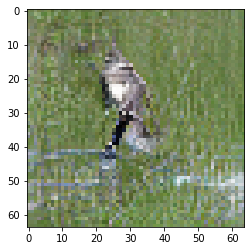

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 28

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.01577949523926 sec
Gen loss: 4.413073525519229, Gen valid loss: 1.277981747941273, Gen attr loss: 1.59170326178636, Gen caption loss: 1.54338851918373, Disc valid loss: 1.0979231008023105, Disc valid real loss: 0.5594100232531385, Disc valid fake loss: 0.5385130790029438, Disc attr loss: 3.0386229207522177, Disc attr real loss: 1.4469196589658577, Disc attr fake loss: 1.59170326178636
Time for epoch 2 is 39.160672187805176 sec
Gen loss: 4.4062194113485855, Gen valid loss: 1.2762150313796066, Gen attr loss: 1.5886614422811078, Gen caption loss: 1.5413429426953076, Disc valid loss: 1.0917046315624785, Disc valid real loss: 0.5525325303316763, Disc valid fake loss: 0.5391720989693795, Disc attr loss: 3.035671724859615, Disc attr real loss: 1.4470102825785072, Disc attr fake loss: 1.5886614422811078
Time for epoch 3 is 39.142348289489746 sec
Gen loss: 

Time for epoch 21 is 39.08590579032898 sec
Gen loss: 4.40485319018687, Gen valid loss: 1.2666202967729026, Gen attr loss: 1.5935435049579072, Gen caption loss: 1.5446893797334293, Disc valid loss: 1.106627704651375, Disc valid real loss: 0.5627681601661331, Disc valid fake loss: 0.5438595448890675, Disc attr loss: 3.0399347172196967, Disc attr real loss: 1.4463912122617892, Disc attr fake loss: 1.5935435049579072
Time for epoch 22 is 39.14077854156494 sec
Gen loss: 4.388685175396886, Gen valid loss: 1.25938703487236, Gen attr loss: 1.5878271856282138, Gen caption loss: 1.5414709531194795, Disc valid loss: 1.102240069125726, Disc valid real loss: 0.5599864497578887, Disc valid fake loss: 0.5422536197716628, Disc attr loss: 3.0340840897262904, Disc attr real loss: 1.4462569040980766, Disc attr fake loss: 1.5878271856282138
Time for epoch 23 is 39.18331170082092 sec
Gen loss: 4.402267828220275, Gen valid loss: 1.2720091966432607, Gen attr loss: 1.5894675364662316, Gen caption loss: 1.5407

Time for epoch 41 is 39.16021108627319 sec
Gen loss: 4.398512728492096, Gen valid loss: 1.2709771816323443, Gen attr loss: 1.5857652603449215, Gen caption loss: 1.541770284737998, Disc valid loss: 1.0998891385267098, Disc valid real loss: 0.5570925420054252, Disc valid fake loss: 0.5427965989442376, Disc attr loss: 3.0312852465363376, Disc attr real loss: 1.445519986191416, Disc attr fake loss: 1.5857652603449215
Time for epoch 42 is 39.11070990562439 sec
Gen loss: 4.408038274382511, Gen valid loss: 1.2774272603071155, Gen attr loss: 1.5910065946217151, Gen caption loss: 1.5396044176768482, Disc valid loss: 1.086114965157134, Disc valid real loss: 0.5500990221009345, Disc valid fake loss: 0.5360159406332465, Disc attr loss: 3.036416078970684, Disc attr real loss: 1.445409484348969, Disc attr fake loss: 1.5910065946217151
Time for epoch 43 is 39.13716530799866 sec
Gen loss: 4.395215300686637, Gen valid loss: 1.259278093896261, Gen attr loss: 1.5938880695560114, Gen caption loss: 1.54204

Time for epoch 61 is 39.115686655044556 sec
Gen loss: 4.38480417321368, Gen valid loss: 1.2463997954598611, Gen attr loss: 1.5937747706565752, Gen caption loss: 1.5446296116200888, Disc valid loss: 1.1116659982094597, Disc valid real loss: 0.5612303447432634, Disc valid fake loss: 0.5504356529008405, Disc attr loss: 3.039225037504987, Disc attr real loss: 1.4454502668484117, Disc attr fake loss: 1.5937747706565752
Time for epoch 62 is 39.12281274795532 sec
Gen loss: 4.406172652877766, Gen valid loss: 1.2716180829174797, Gen attr loss: 1.5910966315566686, Gen caption loss: 1.543457942280343, Disc valid loss: 1.0895456663638272, Disc valid real loss: 0.55512031395907, Disc valid fake loss: 0.5344253516778713, Disc attr loss: 3.0366644145350468, Disc attr real loss: 1.4455677829783784, Disc attr fake loss: 1.5910966315566686
Time for epoch 63 is 39.172635078430176 sec
Gen loss: 4.4089349776425655, Gen valid loss: 1.272870781783489, Gen attr loss: 1.5934048348326024, Gen caption loss: 1.54

Time for epoch 81 is 39.13789677619934 sec
Gen loss: 4.429750976200673, Gen valid loss: 1.2788886718633699, Gen attr loss: 1.5988876179950993, Gen caption loss: 1.5519746897343374, Disc valid loss: 1.0966762675825497, Disc valid real loss: 0.5561673733277049, Disc valid fake loss: 0.5405088956278514, Disc attr loss: 3.0436430791529214, Disc attr real loss: 1.444755461157822, Disc attr fake loss: 1.5988876179950993
Time for epoch 82 is 39.08591413497925 sec
Gen loss: 4.427107067289068, Gen valid loss: 1.2817523209706232, Gen attr loss: 1.597163316034043, Gen caption loss: 1.5481914369071401, Disc valid loss: 1.0874356054032075, Disc valid real loss: 0.5523407087739567, Disc valid fake loss: 0.5350948942870628, Disc attr loss: 3.042878298255486, Disc attr real loss: 1.4457149822214432, Disc attr fake loss: 1.597163316034043
Time for epoch 83 is 39.099796295166016 sec
Gen loss: 4.419908334892294, Gen valid loss: 1.284097700099635, Gen attr loss: 1.5893634693409369, Gen caption loss: 1.546

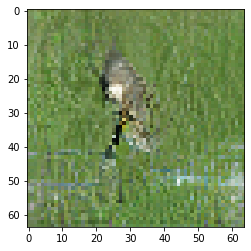

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 29

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.86938691139221 sec
Gen loss: 4.4058027713279415, Gen valid loss: 1.2727741574853417, Gen attr loss: 1.590845730246567, Gen caption loss: 1.5421828829499118, Disc valid loss: 1.099656108272108, Disc valid real loss: 0.558196596659942, Disc valid fake loss: 0.5414595120967565, Disc attr loss: 3.0354781984313717, Disc attr real loss: 1.4446324681848046, Disc attr fake loss: 1.590845730246567
Time for epoch 2 is 39.17111086845398 sec
Gen loss: 4.40689011576376, Gen valid loss: 1.269012536459822, Gen attr loss: 1.5939250922784574, Gen caption loss: 1.5439524892869034, Disc valid loss: 1.1002327943558938, Disc valid real loss: 0.558054279505722, Disc valid fake loss: 0.5421785153347626, Disc attr loss: 3.0382939602947494, Disc attr real loss: 1.444368868016292, Disc attr fake loss: 1.5939250922784574
Time for epoch 3 is 39.150007247924805 sec
Gen loss: 4

Time for epoch 21 is 39.212021827697754 sec
Gen loss: 4.376232688019916, Gen valid loss: 1.250558258395208, Gen attr loss: 1.5873380896198717, Gen caption loss: 1.538336345819923, Disc valid loss: 1.108029301896651, Disc valid real loss: 0.5637449651229672, Disc valid fake loss: 0.5442843350776165, Disc attr loss: 3.031405189496069, Disc attr real loss: 1.444067099876197, Disc attr fake loss: 1.5873380896198717
Time for epoch 22 is 39.15586829185486 sec
Gen loss: 4.400272856559857, Gen valid loss: 1.2710911390904165, Gen attr loss: 1.588827935983818, Gen caption loss: 1.540353760486696, Disc valid loss: 1.0913568156844555, Disc valid real loss: 0.5530900522299252, Disc valid fake loss: 0.5382667615161678, Disc attr loss: 3.0327634420498275, Disc attr real loss: 1.4439355060660095, Disc attr fake loss: 1.588827935983818
Time for epoch 23 is 39.14748001098633 sec
Gen loss: 4.392133697261655, Gen valid loss: 1.2623917757657162, Gen attr loss: 1.5875410536117347, Gen caption loss: 1.542200

Time for epoch 41 is 39.11035680770874 sec
Gen loss: 4.389286390165004, Gen valid loss: 1.260107718347534, Gen attr loss: 1.588493875048671, Gen caption loss: 1.5406847875615768, Disc valid loss: 1.0987548790973054, Disc valid real loss: 0.5528931486089701, Disc valid fake loss: 0.5458617312959863, Disc attr loss: 3.0322067873264715, Disc attr real loss: 1.4437129122778005, Disc attr fake loss: 1.588493875048671
Time for epoch 42 is 39.105746030807495 sec
Gen loss: 4.4007523195530345, Gen valid loss: 1.2702222413163844, Gen attr loss: 1.5899662974727187, Gen caption loss: 1.5405637726874208, Disc valid loss: 1.0954993976163994, Disc valid real loss: 0.5551131664091332, Disc valid fake loss: 0.5403862329033332, Disc attr loss: 3.0339306004971345, Disc attr real loss: 1.443964303024416, Disc attr fake loss: 1.5899662974727187
Time for epoch 43 is 39.101006746292114 sec
Gen loss: 4.41920309208919, Gen valid loss: 1.28052403481026, Gen attr loss: 1.5934485035537058, Gen caption loss: 1.545

Time for epoch 61 is 39.158121824264526 sec
Gen loss: 4.403151441718828, Gen valid loss: 1.2705096087158534, Gen attr loss: 1.5907571293151153, Gen caption loss: 1.5418847014264363, Disc valid loss: 1.0958266217857195, Disc valid real loss: 0.5565927067423254, Disc valid fake loss: 0.5392339171432867, Disc attr loss: 3.0341501707630107, Disc attr real loss: 1.4433930414478953, Disc attr fake loss: 1.5907571293151153
Time for epoch 62 is 38.901068449020386 sec
Gen loss: 4.410558391715776, Gen valid loss: 1.2774639656227134, Gen attr loss: 1.5914049394085479, Gen caption loss: 1.541689500253052, Disc valid loss: 1.0916602504931814, Disc valid real loss: 0.552991481492836, Disc valid fake loss: 0.538668770211822, Disc attr loss: 3.035137061181107, Disc attr real loss: 1.4437321217725594, Disc attr fake loss: 1.5914049394085479
Time for epoch 63 is 38.992188453674316 sec
Gen loss: 4.412793574294423, Gen valid loss: 1.2810548561698376, Gen attr loss: 1.5909673708887282, Gen caption loss: 1.

Time for epoch 81 is 39.18491220474243 sec
Gen loss: 4.4136493845683775, Gen valid loss: 1.2813474261340734, Gen attr loss: 1.5884957481529007, Gen caption loss: 1.5438061994588794, Disc valid loss: 1.0955124657328537, Disc valid real loss: 0.555278622684117, Disc valid fake loss: 0.5402338437756226, Disc attr loss: 3.0312767968914374, Disc attr real loss: 1.4427810487385364, Disc attr fake loss: 1.5884957481529007
Time for epoch 82 is 39.20003414154053 sec
Gen loss: 4.4151860672607, Gen valid loss: 1.2836260795593262, Gen attr loss: 1.5907332625815538, Gen caption loss: 1.5408267312579684, Disc valid loss: 1.0885244725842462, Disc valid real loss: 0.552327085478196, Disc valid fake loss: 0.5361973898520638, Disc attr loss: 3.0338670264091596, Disc attr real loss: 1.4431337638276056, Disc attr fake loss: 1.5907332625815538
Time for epoch 83 is 39.1508469581604 sec
Gen loss: 4.403660949329697, Gen valid loss: 1.2705431809916405, Gen attr loss: 1.5930755807132255, Gen caption loss: 1.540

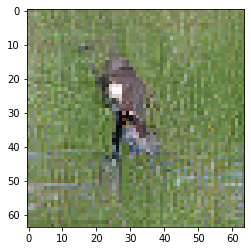

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 30

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.95048642158508 sec
Gen loss: 4.407141974301842, Gen valid loss: 1.2755462326977633, Gen attr loss: 1.5901710806177238, Gen caption loss: 1.5414246624401269, Disc valid loss: 1.0961489874496047, Disc valid real loss: 0.5540921268908958, Disc valid fake loss: 0.5420568637893128, Disc attr loss: 3.0326462641641054, Disc attr real loss: 1.4424751835463816, Disc attr fake loss: 1.5901710806177238
Time for epoch 2 is 38.94311165809631 sec
Gen loss: 4.399003218829147, Gen valid loss: 1.2651907252425423, Gen attr loss: 1.5888543245269031, Gen caption loss: 1.5449581840820106, Disc valid loss: 1.1006599897291602, Disc valid real loss: 0.5625137484009027, Disc valid fake loss: 0.5381462403590763, Disc attr loss: 3.0313563133642925, Disc attr real loss: 1.4425019888373893, Disc attr fake loss: 1.5888543245269031
Time for epoch 3 is 38.90599179267883 sec
Gen l

Time for epoch 21 is 39.135950803756714 sec
Gen loss: 4.426540461982169, Gen valid loss: 1.2877115620184074, Gen attr loss: 1.593749964140295, Gen caption loss: 1.5450789485843524, Disc valid loss: 1.0908013885906396, Disc valid real loss: 0.5492659267694323, Disc valid fake loss: 0.541535461659677, Disc attr loss: 3.036000039196273, Disc attr real loss: 1.442250075055978, Disc attr fake loss: 1.593749964140295
Time for epoch 22 is 39.06947159767151 sec
Gen loss: 4.404257353082259, Gen valid loss: 1.2773378039117105, Gen attr loss: 1.5878629616605557, Gen caption loss: 1.5390565886407042, Disc valid loss: 1.0888311436505822, Disc valid real loss: 0.5530155776800502, Disc valid fake loss: 0.5358155674243038, Disc attr loss: 3.030183107549259, Disc attr real loss: 1.4423201458887034, Disc attr fake loss: 1.5878629616605557
Time for epoch 23 is 39.035045862197876 sec
Gen loss: 4.413622504650416, Gen valid loss: 1.2850213451437187, Gen attr loss: 1.587909436161279, Gen caption loss: 1.5406

Time for epoch 41 is 39.10935425758362 sec
Gen loss: 4.422767037621681, Gen valid loss: 1.2875842825184023, Gen attr loss: 1.5910661042867313, Gen caption loss: 1.5441166685848702, Disc valid loss: 1.0899936101300929, Disc valid real loss: 0.5517801929134017, Disc valid fake loss: 0.538213418589698, Disc attr loss: 3.033339211288183, Disc attr real loss: 1.4422731070014518, Disc attr fake loss: 1.5910661042867313
Time for epoch 42 is 39.01838707923889 sec
Gen loss: 4.425631879144891, Gen valid loss: 1.2931711063152407, Gen attr loss: 1.5911951074755288, Gen caption loss: 1.5412656601851549, Disc valid loss: 1.0859441453525367, Disc valid real loss: 0.550751904161965, Disc valid fake loss: 0.5351922412713369, Disc attr loss: 3.033299026773551, Disc attr real loss: 1.442103919298022, Disc attr fake loss: 1.5911951074755288
Time for epoch 43 is 39.04082775115967 sec
Gen loss: 4.40804066438339, Gen valid loss: 1.2769449432367879, Gen attr loss: 1.5897732986021171, Gen caption loss: 1.54132

Time for epoch 61 is 39.03592276573181 sec
Gen loss: 4.396245342606129, Gen valid loss: 1.2672895004109639, Gen attr loss: 1.588275729156122, Gen caption loss: 1.540680126122989, Disc valid loss: 1.1050261275232, Disc valid real loss: 0.5592840859883523, Disc valid fake loss: 0.5457420415348477, Disc attr loss: 3.029493732181022, Disc attr real loss: 1.4412180030248998, Disc attr fake loss: 1.588275729156122
Time for epoch 62 is 39.084028482437134 sec
Gen loss: 4.402203042332719, Gen valid loss: 1.2720895837639083, Gen attr loss: 1.5896985440396358, Gen caption loss: 1.540414920990383, Disc valid loss: 1.0909091776948634, Disc valid real loss: 0.5524829944297873, Disc valid fake loss: 0.5384261813267137, Disc attr loss: 3.031546475118415, Disc attr real loss: 1.441847931078779, Disc attr fake loss: 1.5896985440396358
Time for epoch 63 is 39.00379490852356 sec
Gen loss: 4.403903623260456, Gen valid loss: 1.281250467791467, Gen attr loss: 1.5843737735980894, Gen caption loss: 1.538279391

Time for epoch 81 is 39.041252851486206 sec
Gen loss: 4.41298390662444, Gen valid loss: 1.2813162632427888, Gen attr loss: 1.589662273078753, Gen caption loss: 1.5420053602880255, Disc valid loss: 1.0963126781187083, Disc valid real loss: 0.553460172036799, Disc valid fake loss: 0.5428525051127281, Disc attr loss: 3.031314435367016, Disc attr real loss: 1.4416521622882625, Disc attr fake loss: 1.589662273078753
Time for epoch 82 is 39.04503679275513 sec
Gen loss: 4.423297706335218, Gen valid loss: 1.2826487646516422, Gen attr loss: 1.5939824839594565, Gen caption loss: 1.5466664616008439, Disc valid loss: 1.0871502923448557, Disc valid real loss: 0.5494854885549726, Disc valid fake loss: 0.5376648023361112, Disc attr loss: 3.035474484852013, Disc attr real loss: 1.4414920008925565, Disc attr fake loss: 1.5939824839594565
Time for epoch 83 is 39.05404210090637 sec
Gen loss: 4.4121806666779975, Gen valid loss: 1.2787560405446907, Gen attr loss: 1.5896094255654147, Gen caption loss: 1.543

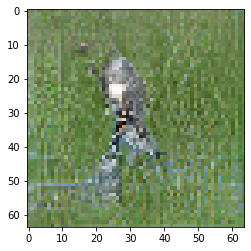

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 31

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.056575536727905 sec
Gen loss: 4.422433071989354, Gen valid loss: 1.2830225350410958, Gen attr loss: 1.5940155850516424, Gen caption loss: 1.5453949572271124, Disc valid loss: 1.0911473520402986, Disc valid real loss: 0.5540964516197763, Disc valid fake loss: 0.5370508997744015, Disc attr loss: 3.035061088034777, Disc attr real loss: 1.4410455029831346, Disc attr fake loss: 1.5940155850516424
Time for epoch 2 is 39.09692621231079 sec
Gen loss: 4.416791762116802, Gen valid loss: 1.278886627375595, Gen attr loss: 1.592677832942022, Gen caption loss: 1.5452272982455204, Disc valid loss: 1.0881589103520402, Disc valid real loss: 0.5533424117539311, Disc valid fake loss: 0.5348164990019346, Disc attr loss: 3.0338007460441694, Disc attr real loss: 1.4411229131021475, Disc attr fake loss: 1.592677832942022
Time for epoch 3 is 39.0308051109314 sec
Gen loss:

Time for epoch 21 is 38.83099126815796 sec
Gen loss: 4.400084988534612, Gen valid loss: 1.2692269162756964, Gen attr loss: 1.5875124553354776, Gen caption loss: 1.5433456132082435, Disc valid loss: 1.0961937797747976, Disc valid real loss: 0.5562690545711414, Disc valid fake loss: 0.5399247277073744, Disc attr loss: 3.0280525648820045, Disc attr real loss: 1.440540109546527, Disc attr fake loss: 1.5875124553354776
Time for epoch 22 is 39.147016286849976 sec
Gen loss: 4.4055654847525, Gen valid loss: 1.2763462573855227, Gen attr loss: 1.5889356074940544, Gen caption loss: 1.5402836156731377, Disc valid loss: 1.0891886812238512, Disc valid real loss: 0.5509924404827883, Disc valid fake loss: 0.5381962392872911, Disc attr loss: 3.0296322427144866, Disc attr real loss: 1.440696635220432, Disc attr fake loss: 1.5889356074940544
Time for epoch 23 is 38.79205656051636 sec
Gen loss: 4.405320372361801, Gen valid loss: 1.2786069231304695, Gen attr loss: 1.588970004381526, Gen caption loss: 1.537

Time for epoch 41 is 39.04029655456543 sec
Gen loss: 4.416091391710731, Gen valid loss: 1.2786059749481802, Gen attr loss: 1.5899421319082823, Gen caption loss: 1.5475432772623492, Disc valid loss: 1.0958938440333215, Disc valid real loss: 0.556235005458196, Disc valid fake loss: 0.5396588376867093, Disc attr loss: 3.030353424994926, Disc attr real loss: 1.4404112930866437, Disc attr fake loss: 1.5899421319082823
Time for epoch 42 is 39.08591818809509 sec
Gen loss: 4.400410343961018, Gen valid loss: 1.2706495880434507, Gen attr loss: 1.587579890964477, Gen caption loss: 1.542180864145439, Disc valid loss: 1.096996423190202, Disc valid real loss: 0.5569615379420076, Disc valid fake loss: 0.540034886378906, Disc attr loss: 3.027775828754353, Disc attr real loss: 1.4401959377898756, Disc attr fake loss: 1.587579890964477
Time for epoch 43 is 39.0389838218689 sec
Gen loss: 4.401230969726232, Gen valid loss: 1.2651797967551524, Gen attr loss: 1.5924720457252772, Gen caption loss: 1.54357913

Time for epoch 61 is 39.019449949264526 sec
Gen loss: 4.408567803338937, Gen valid loss: 1.2706171358180887, Gen attr loss: 1.5924787359832102, Gen caption loss: 1.5454719253994909, Disc valid loss: 1.0995685464644496, Disc valid real loss: 0.5520946237291424, Disc valid fake loss: 0.547473922573777, Disc attr loss: 3.031783090374334, Disc attr real loss: 1.439304354391124, Disc attr fake loss: 1.5924787359832102
Time for epoch 62 is 39.11801218986511 sec
Gen loss: 4.404002063642673, Gen valid loss: 1.2766153980399857, Gen attr loss: 1.5887601359426813, Gen caption loss: 1.538626520614314, Disc valid loss: 1.0911752557366845, Disc valid real loss: 0.5532098489240579, Disc valid fake loss: 0.5379654095586399, Disc attr loss: 3.0281267140292862, Disc attr real loss: 1.439366578086605, Disc attr fake loss: 1.5887601359426813
Time for epoch 63 is 39.144975900650024 sec
Gen loss: 4.408345884746975, Gen valid loss: 1.2724027893730618, Gen attr loss: 1.5923404344698278, Gen caption loss: 1.54

Time for epoch 81 is 39.031410217285156 sec
Gen loss: 4.395190677668667, Gen valid loss: 1.268916901695696, Gen attr loss: 1.5865023746723081, Gen caption loss: 1.5397713843399916, Disc valid loss: 1.096513296692029, Disc valid real loss: 0.5567754853547104, Disc valid fake loss: 0.5397378089143655, Disc attr loss: 3.0251340846705244, Disc attr real loss: 1.438631709998216, Disc attr fake loss: 1.5865023746723081
Time for epoch 82 is 39.068129539489746 sec
Gen loss: 4.401714590506825, Gen valid loss: 1.2705497992071033, Gen attr loss: 1.5900413670190952, Gen caption loss: 1.5411234215346132, Disc valid loss: 1.092738090330346, Disc valid real loss: 0.5561813492438981, Disc valid fake loss: 0.5365567411672132, Disc attr loss: 3.0286318451408447, Disc attr real loss: 1.4385904781217498, Disc attr fake loss: 1.5900413670190952
Time for epoch 83 is 39.070369482040405 sec
Gen loss: 4.413550188870934, Gen valid loss: 1.2736328956557483, Gen attr loss: 1.5946125499601287, Gen caption loss: 1.

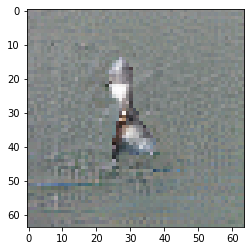

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 32

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.92224454879761 sec
Gen loss: 4.409661539201814, Gen valid loss: 1.2733469540833782, Gen attr loss: 1.5933692019160202, Gen caption loss: 1.5429453836870064, Disc valid loss: 1.1002150660930934, Disc valid real loss: 0.5575814397354436, Disc valid fake loss: 0.5426336265999451, Disc attr loss: 3.031295469782863, Disc attr real loss: 1.4379262678668427, Disc attr fake loss: 1.5933692019160202
Time for epoch 2 is 39.02620267868042 sec
Gen loss: 4.414063537670022, Gen valid loss: 1.2811995751166407, Gen attr loss: 1.5906305419720286, Gen caption loss: 1.5422334183199295, Disc valid loss: 1.0913229289093638, Disc valid real loss: 0.5518243694854622, Disc valid fake loss: 0.5394985599892572, Disc attr loss: 3.028712876767001, Disc attr real loss: 1.4380823347949723, Disc attr fake loss: 1.5906305419720286
Time for epoch 3 is 39.087727785110474 sec
Gen lo

Time for epoch 21 is 39.07488441467285 sec
Gen loss: 4.393516914631293, Gen valid loss: 1.2698697609306997, Gen attr loss: 1.5855145783928353, Gen caption loss: 1.538132570300322, Disc valid loss: 1.0984587627374707, Disc valid real loss: 0.5603672659332514, Disc valid fake loss: 0.5380914992271724, Disc attr loss: 3.0226835316112695, Disc attr real loss: 1.4371689532184342, Disc attr fake loss: 1.5855145783928353
Time for epoch 22 is 39.12378454208374 sec
Gen loss: 4.429673591603431, Gen valid loss: 1.28617648639007, Gen attr loss: 1.595988744319616, Gen caption loss: 1.5475083638012894, Disc valid loss: 1.0859697918258708, Disc valid real loss: 0.5516558705468165, Disc valid fake loss: 0.5343139228943564, Disc attr loss: 3.033320374282072, Disc attr real loss: 1.437331629962456, Disc attr fake loss: 1.595988744319616
Time for epoch 23 is 38.8959321975708 sec
Gen loss: 4.403552857194812, Gen valid loss: 1.2697267047758025, Gen attr loss: 1.5904023841144592, Gen caption loss: 1.5434237

Time for epoch 41 is 39.111424684524536 sec
Gen loss: 4.395784098927567, Gen valid loss: 1.262107588734407, Gen attr loss: 1.5898314992263711, Gen caption loss: 1.5438449944907087, Disc valid loss: 1.1083304672060297, Disc valid real loss: 0.5612704017298008, Disc valid fake loss: 0.5470600638609269, Disc attr loss: 3.026644749370048, Disc attr real loss: 1.4368132501436766, Disc attr fake loss: 1.5898314992263711
Time for epoch 42 is 39.03459644317627 sec
Gen loss: 4.401032716601199, Gen valid loss: 1.2655178691313518, Gen attr loss: 1.5921553040584575, Gen caption loss: 1.5433595506802484, Disc valid loss: 1.0970025259627882, Disc valid real loss: 0.5586644680842474, Disc valid fake loss: 0.5383380581208361, Disc attr loss: 3.029380533430311, Disc attr real loss: 1.437225229371854, Disc attr fake loss: 1.5921553040584575
Time for epoch 43 is 38.855544328689575 sec
Gen loss: 4.412911177327639, Gen valid loss: 1.2787930035009616, Gen attr loss: 1.591347730579738, Gen caption loss: 1.54

Time for epoch 61 is 38.88799786567688 sec
Gen loss: 4.394662510088788, Gen valid loss: 1.2639020896216395, Gen attr loss: 1.5892474880709557, Gen caption loss: 1.541512926419576, Disc valid loss: 1.0977862719597855, Disc valid real loss: 0.5588025776997492, Disc valid fake loss: 0.5389836928062646, Disc attr loss: 3.0258669549533668, Disc attr real loss: 1.436619466882411, Disc attr fake loss: 1.5892474880709557
Time for epoch 62 is 38.895217418670654 sec
Gen loss: 4.393077568633124, Gen valid loss: 1.2675701205323382, Gen attr loss: 1.5876789797289261, Gen caption loss: 1.5378284654643155, Disc valid loss: 1.09703214834053, Disc valid real loss: 0.5539853428275927, Disc valid fake loss: 0.5430468054321723, Disc attr loss: 3.0245316131974302, Disc attr real loss: 1.436852633468504, Disc attr fake loss: 1.5876789797289261
Time for epoch 63 is 38.80294442176819 sec
Gen loss: 4.4218721745136955, Gen valid loss: 1.2865617704908376, Gen attr loss: 1.5909945541604102, Gen caption loss: 1.54

Time for epoch 81 is 39.00006461143494 sec
Gen loss: 4.418678589952671, Gen valid loss: 1.2880813817021646, Gen attr loss: 1.589663492631783, Gen caption loss: 1.5409337098036355, Disc valid loss: 1.0937141645245436, Disc valid real loss: 0.5559220641124539, Disc valid fake loss: 0.5377921015428011, Disc attr loss: 3.025866079782729, Disc attr real loss: 1.4362025871509458, Disc attr fake loss: 1.589663492631783
Time for epoch 82 is 38.95898246765137 sec
Gen loss: 4.411772512161958, Gen valid loss: 1.2828505916324089, Gen attr loss: 1.5871532176568257, Gen caption loss: 1.5417687052956766, Disc valid loss: 1.0891375430231172, Disc valid real loss: 0.551484474240926, Disc valid fake loss: 0.5376530717705, Disc attr loss: 3.0231898412471865, Disc attr real loss: 1.4360366235903608, Disc attr fake loss: 1.5871532176568257
Time for epoch 83 is 39.05704426765442 sec
Gen loss: 4.405668537145061, Gen valid loss: 1.2799054413307003, Gen attr loss: 1.5862204220882923, Gen caption loss: 1.539542

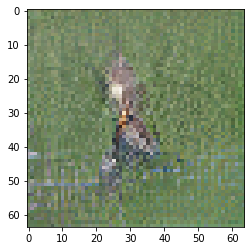

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 33

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.96709752082825 sec
Gen loss: 4.415026331981669, Gen valid loss: 1.2739673171263077, Gen attr loss: 1.5933510501210282, Gen caption loss: 1.5477079560117024, Disc valid loss: 1.1012490176896093, Disc valid real loss: 0.5578835214864271, Disc valid fake loss: 0.5433654980607795, Disc attr loss: 3.0289447511114727, Disc attr real loss: 1.4355937009904443, Disc attr fake loss: 1.5933510501210282
Time for epoch 2 is 39.19527554512024 sec
Gen loss: 4.425837317133338, Gen valid loss: 1.2824465307762953, Gen attr loss: 1.5968341943694324, Gen caption loss: 1.5465565919876099, Disc valid loss: 1.0879959013403915, Disc valid real loss: 0.5531669830888267, Disc valid fake loss: 0.534828916797793, Disc attr loss: 3.0328452402983253, Disc attr real loss: 1.436011045928893, Disc attr fake loss: 1.5968341943694324
Time for epoch 3 is 39.10980463027954 sec
Gen los

Time for epoch 21 is 39.17024612426758 sec
Gen loss: 4.417522527338043, Gen valid loss: 1.287066559481427, Gen attr loss: 1.589440830354768, Gen caption loss: 1.541015126840855, Disc valid loss: 1.0942561217762914, Disc valid real loss: 0.5525016417186758, Disc valid fake loss: 0.5417544783615484, Disc attr loss: 3.0239959574004174, Disc attr real loss: 1.4345551270456496, Disc attr fake loss: 1.589440830354768
Time for epoch 22 is 39.17182207107544 sec
Gen loss: 4.406563900996676, Gen valid loss: 1.2794572980746344, Gen attr loss: 1.5876935814131243, Gen caption loss: 1.5394130263548234, Disc valid loss: 1.0904827042000727, Disc valid real loss: 0.5497107636637804, Disc valid fake loss: 0.5407719447360775, Disc attr loss: 3.022648113852917, Disc attr real loss: 1.4349545324397928, Disc attr fake loss: 1.5876935814131243
Time for epoch 23 is 39.22108054161072 sec
Gen loss: 4.402985153482535, Gen valid loss: 1.2684548930100956, Gen attr loss: 1.593058265321623, Gen caption loss: 1.54147

Time for epoch 41 is 39.131784200668335 sec
Gen loss: 4.40808445845193, Gen valid loss: 1.2772439364495316, Gen attr loss: 1.590271518159365, Gen caption loss: 1.5405690036815034, Disc valid loss: 1.0936377760840625, Disc valid real loss: 0.557186575197592, Disc valid fake loss: 0.5364512021787121, Disc attr loss: 3.025008430325888, Disc attr real loss: 1.434736912166523, Disc attr fake loss: 1.590271518159365
Time for epoch 42 is 39.22108221054077 sec
Gen loss: 4.4206555807170504, Gen valid loss: 1.2868540897601988, Gen attr loss: 1.5920404725604587, Gen caption loss: 1.5417610148427285, Disc valid loss: 1.0887894951877233, Disc valid real loss: 0.5543569055837667, Disc valid fake loss: 0.5344325906539028, Disc attr loss: 3.026739411237763, Disc attr real loss: 1.4346989386773046, Disc attr fake loss: 1.5920404725604587
Time for epoch 43 is 39.164448499679565 sec
Gen loss: 4.42600938427416, Gen valid loss: 1.2870705852986675, Gen attr loss: 1.5931325669534162, Gen caption loss: 1.5458

Time for epoch 61 is 39.074830770492554 sec
Gen loss: 4.432911678381406, Gen valid loss: 1.2907001922124124, Gen attr loss: 1.5952492131773373, Gen caption loss: 1.5469622650766761, Disc valid loss: 1.0903357302916405, Disc valid real loss: 0.5558338813826966, Disc valid fake loss: 0.5345018500396552, Disc attr loss: 3.0290428180358595, Disc attr real loss: 1.4337936048585225, Disc attr fake loss: 1.5952492131773373
Time for epoch 62 is 39.051061391830444 sec
Gen loss: 4.4197517920961875, Gen valid loss: 1.276223059269148, Gen attr loss: 1.593349843167354, Gen caption loss: 1.550178887075202, Disc valid loss: 1.0947943856399558, Disc valid real loss: 0.5528939115161172, Disc valid fake loss: 0.5419004740430734, Disc attr loss: 3.027112545682809, Disc attr real loss: 1.433762702515455, Disc attr fake loss: 1.593349843167354
Time for epoch 63 is 39.11262845993042 sec
Gen loss: 4.4118145216448195, Gen valid loss: 1.2730036571743042, Gen attr loss: 1.5924410319263695, Gen caption loss: 1.5

Time for epoch 81 is 39.117382764816284 sec
Gen loss: 4.409285589285337, Gen valid loss: 1.278957976558344, Gen attr loss: 1.588288340465163, Gen caption loss: 1.5420392641853187, Disc valid loss: 1.0977705321337796, Disc valid real loss: 0.5538268863831756, Disc valid fake loss: 0.5439436473659061, Disc attr loss: 3.021753097937359, Disc attr real loss: 1.433464757472196, Disc attr fake loss: 1.588288340465163
Time for epoch 82 is 39.139116048812866 sec
Gen loss: 4.410690704981486, Gen valid loss: 1.2712292805273682, Gen attr loss: 1.5937999981205637, Gen caption loss: 1.5456614300487488, Disc valid loss: 1.0985333040800844, Disc valid real loss: 0.5567048226753224, Disc valid fake loss: 0.5418284803548157, Disc attr loss: 3.027569818625928, Disc attr real loss: 1.4337698205053644, Disc attr fake loss: 1.5937999981205637
Time for epoch 83 is 39.1085569858551 sec
Gen loss: 4.400481061237614, Gen valid loss: 1.2664582285131543, Gen attr loss: 1.5903823546923919, Gen caption loss: 1.5436

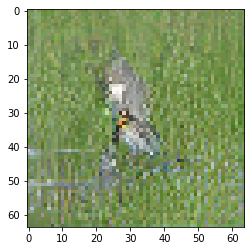

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 34

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.19144558906555 sec
Gen loss: 4.403183170127352, Gen valid loss: 1.2706885857956842, Gen attr loss: 1.5903672206046457, Gen caption loss: 1.5421273556505115, Disc valid loss: 1.1019709953447667, Disc valid real loss: 0.5599467314194212, Disc valid fake loss: 0.5420242619869832, Disc attr loss: 3.023545790493973, Disc attr real loss: 1.4331785698893271, Disc attr fake loss: 1.5903672206046457
Time for epoch 2 is 39.096681118011475 sec
Gen loss: 4.4316000059691225, Gen valid loss: 1.2872917395297105, Gen attr loss: 1.5948787947011187, Gen caption loss: 1.5494294754534879, Disc valid loss: 1.0844146798296672, Disc valid real loss: 0.5502942630915137, Disc valid fake loss: 0.5341204157689723, Disc attr loss: 3.0281711842632553, Disc attr real loss: 1.4332923895621363, Disc attr fake loss: 1.5948787947011187
Time for epoch 3 is 39.158621072769165 sec
Gen

Time for epoch 21 is 39.11781072616577 sec
Gen loss: 4.413283931530588, Gen valid loss: 1.2772604986257992, Gen attr loss: 1.592085512996043, Gen caption loss: 1.543937933477283, Disc valid loss: 1.0994909446090864, Disc valid real loss: 0.5558489773493149, Disc valid fake loss: 0.5436419699250198, Disc attr loss: 3.0249044646415606, Disc attr real loss: 1.4328189516455176, Disc attr fake loss: 1.592085512996043
Time for epoch 22 is 39.12666845321655 sec
Gen loss: 4.413430862633517, Gen valid loss: 1.2833965936004308, Gen attr loss: 1.5899153547235299, Gen caption loss: 1.540118920770764, Disc valid loss: 1.086077777996942, Disc valid real loss: 0.550374097617338, Disc valid fake loss: 0.5357036824794966, Disc attr loss: 3.023164179266953, Disc attr real loss: 1.4332488245434232, Disc attr fake loss: 1.5899153547235299
Time for epoch 23 is 39.09591245651245 sec
Gen loss: 4.405452929861177, Gen valid loss: 1.2820828219416343, Gen attr loss: 1.5859850968125713, Gen caption loss: 1.537385

Time for epoch 41 is 39.11957359313965 sec
Gen loss: 4.398263064180286, Gen valid loss: 1.273912556287719, Gen attr loss: 1.5871509236048877, Gen caption loss: 1.5371995796033038, Disc valid loss: 1.1022124272697986, Disc valid real loss: 0.5595986783342956, Disc valid fake loss: 0.5426137482086171, Disc attr loss: 3.0197336754501674, Disc attr real loss: 1.4325827518452796, Disc attr fake loss: 1.5871509236048877
Time for epoch 42 is 39.09451127052307 sec
Gen loss: 4.404519751143003, Gen valid loss: 1.2662065103448181, Gen attr loss: 1.5938828866979293, Gen caption loss: 1.5444303505465913, Disc valid loss: 1.0938326543585717, Disc valid real loss: 0.5558269455180904, Disc valid fake loss: 0.5380057102942531, Disc attr loss: 3.026897387452888, Disc attr real loss: 1.4330145007549586, Disc attr fake loss: 1.5938828866979293
Time for epoch 43 is 39.14769148826599 sec
Gen loss: 4.411971587152662, Gen valid loss: 1.2702254635208667, Gen attr loss: 1.5937681411339986, Gen caption loss: 1.5

Time for epoch 61 is 39.125049114227295 sec
Gen loss: 4.397901024598739, Gen valid loss: 1.2743492979344313, Gen attr loss: 1.587085088417136, Gen caption loss: 1.5364666434161385, Disc valid loss: 1.0965078836534081, Disc valid real loss: 0.5592365499919023, Disc valid fake loss: 0.5372713324500293, Disc attr loss: 3.0197669600406636, Disc attr real loss: 1.4326818716235277, Disc attr fake loss: 1.587085088417136
Time for epoch 62 is 39.09340786933899 sec
Gen loss: 4.414194391994942, Gen valid loss: 1.281575326027909, Gen attr loss: 1.591121292372706, Gen caption loss: 1.5414977810247157, Disc valid loss: 1.0901998578694454, Disc valid real loss: 0.5554144729766742, Disc valid fake loss: 0.53478538392359, Disc attr loss: 3.023311577192167, Disc attr real loss: 1.4321902848194608, Disc attr fake loss: 1.591121292372706
Time for epoch 63 is 39.09230589866638 sec
Gen loss: 4.416290423411341, Gen valid loss: 1.2799087869442576, Gen attr loss: 1.5939822917385154, Gen caption loss: 1.542399

Time for epoch 81 is 39.108044385910034 sec
Gen loss: 4.411072579179676, Gen valid loss: 1.276344379758447, Gen attr loss: 1.5907768889817442, Gen caption loss: 1.5439513220696592, Disc valid loss: 1.0979535775132943, Disc valid real loss: 0.5580126862861923, Disc valid fake loss: 0.539940890580981, Disc attr loss: 3.022537738004028, Disc attr real loss: 1.4317608490222837, Disc attr fake loss: 1.5907768889817442
Time for epoch 82 is 39.1190984249115 sec
Gen loss: 4.416972852980864, Gen valid loss: 1.2835190352708667, Gen attr loss: 1.590826062975214, Gen caption loss: 1.542627748758166, Disc valid loss: 1.0898560616705153, Disc valid real loss: 0.5518670474610677, Disc valid fake loss: 0.5379890132402663, Disc attr loss: 3.022753960394924, Disc attr real loss: 1.4319278974197098, Disc attr fake loss: 1.590826062975214
Time for epoch 83 is 39.1357364654541 sec
Gen loss: 4.420162685518342, Gen valid loss: 1.27927869283733, Gen attr loss: 1.593516303271782, Gen caption loss: 1.5473676997

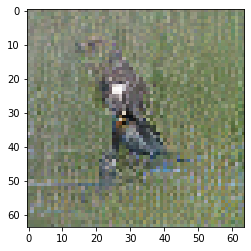

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 35

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.13510870933533 sec
Gen loss: 4.420913236251045, Gen valid loss: 1.2886751290905443, Gen attr loss: 1.5886075952188756, Gen caption loss: 1.5436305049958268, Disc valid loss: 1.0914148345872317, Disc valid real loss: 0.5556211280144328, Disc valid fake loss: 0.5357937064112687, Disc attr loss: 3.0199509032050447, Disc attr real loss: 1.431343307986169, Disc attr fake loss: 1.5886075952188756
Time for epoch 2 is 39.064483404159546 sec
Gen loss: 4.42671833968744, Gen valid loss: 1.2848887380545702, Gen attr loss: 1.5929734328897989, Gen caption loss: 1.5488561482287357, Disc valid loss: 1.091213057034707, Disc valid real loss: 0.5526808169153001, Disc valid fake loss: 0.538532237857984, Disc attr loss: 3.0242467772992967, Disc attr real loss: 1.431273344409498, Disc attr fake loss: 1.5929734328897989
Time for epoch 3 is 39.07819724082947 sec
Gen loss:

Time for epoch 21 is 39.07310366630554 sec
Gen loss: 4.406560881028008, Gen valid loss: 1.276229308065037, Gen attr loss: 1.5890979463168922, Gen caption loss: 1.5412336096854067, Disc valid loss: 1.1025523722656374, Disc valid real loss: 0.5609017129189923, Disc valid fake loss: 0.541650660073531, Disc attr loss: 3.020465765542131, Disc attr real loss: 1.4313678192252388, Disc attr fake loss: 1.5890979463168922
Time for epoch 22 is 39.08007287979126 sec
Gen loss: 4.408491762026862, Gen valid loss: 1.2872504327032301, Gen attr loss: 1.5840809409857441, Gen caption loss: 1.537160412728948, Disc valid loss: 1.0865197294772801, Disc valid real loss: 0.5464078819525597, Disc valid fake loss: 0.5401118467978345, Disc attr loss: 3.0150972817971455, Disc attr real loss: 1.4310163408114012, Disc attr fake loss: 1.5840809409857441
Time for epoch 23 is 39.151222944259644 sec
Gen loss: 4.415045883597397, Gen valid loss: 1.2808082993760666, Gen attr loss: 1.5913119438864027, Gen caption loss: 1.54

Time for epoch 41 is 39.191182374954224 sec
Gen loss: 4.437821817914968, Gen valid loss: 1.2895678533771173, Gen attr loss: 1.5945418656356936, Gen caption loss: 1.5537121118245731, Disc valid loss: 1.086903834569099, Disc valid real loss: 0.5536029607784457, Disc valid fake loss: 0.5333008728214719, Disc attr loss: 3.025979530197495, Disc attr real loss: 1.4314376645618014, Disc attr fake loss: 1.5945418656356936
Time for epoch 42 is 39.115572929382324 sec
Gen loss: 4.424583379492204, Gen valid loss: 1.2920754256287241, Gen attr loss: 1.588078899758295, Gen caption loss: 1.5444290521668225, Disc valid loss: 1.0898495432807178, Disc valid real loss: 0.5536676681623226, Disc valid fake loss: 0.536181874956865, Disc attr loss: 3.019508697799228, Disc attr real loss: 1.4314297980409327, Disc attr fake loss: 1.588078899758295
Time for epoch 43 is 39.11504077911377 sec
Gen loss: 4.414068641378305, Gen valid loss: 1.275981068449615, Gen attr loss: 1.593443806255413, Gen caption loss: 1.54464

Time for epoch 61 is 39.12363791465759 sec
Gen loss: 4.411840912449327, Gen valid loss: 1.2750825576665925, Gen attr loss: 1.592727180095869, Gen caption loss: 1.544031160310678, Disc valid loss: 1.099418627698893, Disc valid real loss: 0.5507420774720871, Disc valid fake loss: 0.548676549419155, Disc attr loss: 3.0233824333847377, Disc attr real loss: 1.4306552532888686, Disc attr fake loss: 1.592727180095869
Time for epoch 62 is 39.122952938079834 sec
Gen loss: 4.399298462441297, Gen valid loss: 1.2695216223153318, Gen attr loss: 1.5875449338902625, Gen caption loss: 1.5422319151198638, Disc valid loss: 1.0968304693214292, Disc valid real loss: 0.5575197604775106, Disc valid fake loss: 0.5393107086016233, Disc attr loss: 3.0182922839472286, Disc attr real loss: 1.430747350056966, Disc attr fake loss: 1.5875449338902625
Time for epoch 63 is 39.14928340911865 sec
Gen loss: 4.399510012086491, Gen valid loss: 1.2693898685902438, Gen attr loss: 1.5878625846490628, Gen caption loss: 1.5422

Time for epoch 81 is 39.141477823257446 sec
Gen loss: 4.415358679727487, Gen valid loss: 1.2804490931958041, Gen attr loss: 1.5905940325925667, Gen caption loss: 1.5443155471548478, Disc valid loss: 1.0962668529693997, Disc valid real loss: 0.5556397098835891, Disc valid fake loss: 0.5406271415512737, Disc attr loss: 3.0211494870302156, Disc attr real loss: 1.4305554544376486, Disc attr fake loss: 1.5905940325925667
Time for epoch 82 is 39.125572204589844 sec
Gen loss: 4.425516032914159, Gen valid loss: 1.2864236085395502, Gen attr loss: 1.5943969333074925, Gen caption loss: 1.544695494943841, Disc valid loss: 1.0936318440489006, Disc valid real loss: 0.5579345179444083, Disc valid fake loss: 0.5356973262660225, Disc attr loss: 3.0248062933686626, Disc attr real loss: 1.43040936006117, Disc attr fake loss: 1.5943969333074925
Time for epoch 83 is 39.10418438911438 sec
Gen loss: 4.407522454817443, Gen valid loss: 1.2756365266272691, Gen attr loss: 1.5906253545911009, Gen caption loss: 1.

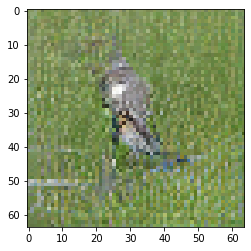

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 36

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.126530170440674 sec
Gen loss: 4.4053656970905415, Gen valid loss: 1.2729167332494162, Gen attr loss: 1.5905835728658246, Gen caption loss: 1.541865388552348, Disc valid loss: 1.1026430593596563, Disc valid real loss: 0.5548351384436858, Disc valid fake loss: 0.5478079205929103, Disc attr loss: 3.020769687202888, Disc attr real loss: 1.430186114337063, Disc attr fake loss: 1.5905835728658246
Time for epoch 2 is 39.15947771072388 sec
Gen loss: 4.4142778966485, Gen valid loss: 1.2860835486957374, Gen attr loss: 1.5886485347256751, Gen caption loss: 1.5395458057966982, Disc valid loss: 1.085903589803029, Disc valid real loss: 0.5515430419425654, Disc valid fake loss: 0.5343605465682219, Disc attr loss: 3.0182967715793185, Disc attr real loss: 1.4296482368536434, Disc attr fake loss: 1.5886485347256751
Time for epoch 3 is 39.114925384521484 sec
Gen loss

Time for epoch 21 is 39.14427042007446 sec
Gen loss: 4.410283559060032, Gen valid loss: 1.276604327082957, Gen attr loss: 1.589771846122535, Gen caption loss: 1.5439073887620838, Disc valid loss: 1.0920826009295497, Disc valid real loss: 0.5520250610704345, Disc valid fake loss: 0.5400575429281891, Disc attr loss: 3.0191930723061082, Disc attr real loss: 1.4294212261835735, Disc attr fake loss: 1.589771846122535
Time for epoch 22 is 39.099878787994385 sec
Gen loss: 4.412106476502044, Gen valid loss: 1.28025196302874, Gen attr loss: 1.589774132421023, Gen caption loss: 1.542080377175556, Disc valid loss: 1.0936919694670493, Disc valid real loss: 0.5552345326114799, Disc valid fake loss: 0.5384574347556768, Disc attr loss: 3.0194640815419556, Disc attr real loss: 1.4296899491209325, Disc attr fake loss: 1.589774132421023
Time for epoch 23 is 39.094932317733765 sec
Gen loss: 4.416079682063281, Gen valid loss: 1.2802058865384358, Gen attr loss: 1.5927226889101147, Gen caption loss: 1.54315

Time for epoch 41 is 39.09913778305054 sec
Gen loss: 4.404283351691435, Gen valid loss: 1.2774740682061771, Gen attr loss: 1.5881864352601007, Gen caption loss: 1.538622848386687, Disc valid loss: 1.1001576871729801, Disc valid real loss: 0.5602410290299392, Disc valid fake loss: 0.5399166579007456, Disc attr loss: 3.017517758578789, Disc attr real loss: 1.4293313233186882, Disc attr fake loss: 1.5881864352601007
Time for epoch 42 is 39.15218925476074 sec
Gen loss: 4.398867669790418, Gen valid loss: 1.2725534703996446, Gen attr loss: 1.5865113990416695, Gen caption loss: 1.5398027919495332, Disc valid loss: 1.0936510892418343, Disc valid real loss: 0.5514085806482206, Disc valid fake loss: 0.5422425088359089, Disc attr loss: 3.0154844877842644, Disc attr real loss: 1.4289730887425947, Disc attr fake loss: 1.5865113990416695
Time for epoch 43 is 39.098740339279175 sec
Gen loss: 4.400831928744226, Gen valid loss: 1.2646490832977502, Gen attr loss: 1.5918620718203909, Gen caption loss: 1.

Time for epoch 61 is 39.15275192260742 sec
Gen loss: 4.416820096452708, Gen valid loss: 1.2829712555014343, Gen attr loss: 1.5909924303613059, Gen caption loss: 1.5428563915294038, Disc valid loss: 1.0949058775010148, Disc valid real loss: 0.553794887330797, Disc valid fake loss: 0.5411109870203789, Disc attr loss: 3.01882686266085, Disc attr real loss: 1.4278344322995442, Disc attr fake loss: 1.5909924303613059
Time for epoch 62 is 39.11155319213867 sec
Gen loss: 4.414019851503657, Gen valid loss: 1.28376569754386, Gen attr loss: 1.590654234252971, Gen caption loss: 1.5395999277833354, Disc valid loss: 1.0952083702655988, Disc valid real loss: 0.5557603549343461, Disc valid fake loss: 0.5394480132313602, Disc attr loss: 3.018595811474291, Disc attr real loss: 1.42794157722132, Disc attr fake loss: 1.590654234252971
Time for epoch 63 is 39.08002948760986 sec
Gen loss: 4.40799927065366, Gen valid loss: 1.2734010899616128, Gen attr loss: 1.5917737328909276, Gen caption loss: 1.5428244528

Time for epoch 81 is 39.09593939781189 sec
Gen loss: 4.410166563380378, Gen valid loss: 1.2775804282526984, Gen attr loss: 1.5900111476257242, Gen caption loss: 1.5425749800715667, Disc valid loss: 1.0999720823474046, Disc valid real loss: 0.557910021485352, Disc valid fake loss: 0.5420620615081735, Disc attr loss: 3.016873608436688, Disc attr real loss: 1.4268624608109637, Disc attr fake loss: 1.5900111476257242
Time for epoch 82 is 39.145503282547 sec
Gen loss: 4.4070636793203795, Gen valid loss: 1.279130519405613, Gen attr loss: 1.5891060428567696, Gen caption loss: 1.538827108496896, Disc valid loss: 1.0903126561867835, Disc valid real loss: 0.5527055184369488, Disc valid fake loss: 0.5376071373460093, Disc attr loss: 3.016121742848135, Disc attr real loss: 1.4270156999913657, Disc attr fake loss: 1.5891060428567696
Time for epoch 83 is 39.10001993179321 sec
Gen loss: 4.409250711683981, Gen valid loss: 1.2757598533216854, Gen attr loss: 1.5905785221394484, Gen caption loss: 1.54291

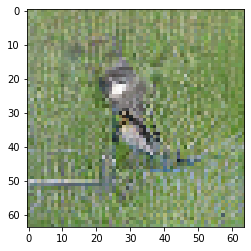

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 37

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.1429660320282 sec
Gen loss: 4.408745680398088, Gen valid loss: 1.2749584641883043, Gen attr loss: 1.591604561986639, Gen caption loss: 1.5421826551923261, Disc valid loss: 1.1027594580236812, Disc valid real loss: 0.5572691369185926, Disc valid fake loss: 0.5454903240126323, Disc attr loss: 3.018103737818193, Disc attr real loss: 1.4264991758315544, Disc attr fake loss: 1.591604561986639
Time for epoch 2 is 39.11124229431152 sec
Gen loss: 4.403655589111453, Gen valid loss: 1.2723509165329663, Gen attr loss: 1.5888537103890727, Gen caption loss: 1.5424509668737891, Disc valid loss: 1.0965720583106766, Disc valid real loss: 0.5555194172917343, Disc valid fake loss: 0.5410526394036405, Disc attr loss: 3.0146730049515806, Disc attr real loss: 1.4258192945625077, Disc attr fake loss: 1.5888537103890727
Time for epoch 3 is 39.10331320762634 sec
Gen loss:

Time for epoch 21 is 39.11243510246277 sec
Gen loss: 4.405813746982151, Gen valid loss: 1.2778998803963184, Gen attr loss: 1.5880231162719933, Gen caption loss: 1.539890753544443, Disc valid loss: 1.095223656030205, Disc valid real loss: 0.5571655469535166, Disc valid fake loss: 0.5380581102881651, Disc attr loss: 3.0138103215675045, Disc attr real loss: 1.425787205295511, Disc attr fake loss: 1.5880231162719933
Time for epoch 22 is 39.16890740394592 sec
Gen loss: 4.4096553267502205, Gen valid loss: 1.2806125523921275, Gen attr loss: 1.5890687054734889, Gen caption loss: 1.5399740685615435, Disc valid loss: 1.0939850411440946, Disc valid real loss: 0.5568018150200366, Disc valid fake loss: 0.5371832279816553, Disc attr loss: 3.014704454882035, Disc attr real loss: 1.425635749408546, Disc attr fake loss: 1.5890687054734889
Time for epoch 23 is 39.1231791973114 sec
Gen loss: 4.414632998830903, Gen valid loss: 1.291113819210187, Gen attr loss: 1.5864135559981432, Gen caption loss: 1.53710

Time for epoch 41 is 39.09668517112732 sec
Gen loss: 4.4076241975231225, Gen valid loss: 1.2785197741940093, Gen attr loss: 1.5884927078314266, Gen caption loss: 1.540611724866438, Disc valid loss: 1.0964322122454966, Disc valid real loss: 0.5571317161486401, Disc valid fake loss: 0.5393004936739035, Disc attr loss: 3.013058305432803, Disc attr real loss: 1.4245655976013762, Disc attr fake loss: 1.5884927078314266
Time for epoch 42 is 39.112622022628784 sec
Gen loss: 4.419253403578347, Gen valid loss: 1.2867930936942578, Gen attr loss: 1.5900486449239053, Gen caption loss: 1.542411658498976, Disc valid loss: 1.0871920572709908, Disc valid real loss: 0.5505926289209505, Disc valid fake loss: 0.5365994277846845, Disc attr loss: 3.0147191731910397, Disc attr real loss: 1.4246705282671341, Disc attr fake loss: 1.5900486449239053
Time for epoch 43 is 39.15839409828186 sec
Gen loss: 4.422547139449494, Gen valid loss: 1.2927754608596242, Gen attr loss: 1.5895615189379146, Gen caption loss: 1.

Time for epoch 61 is 39.15592408180237 sec
Gen loss: 4.415819573854689, Gen valid loss: 1.2877655345896073, Gen attr loss: 1.588021070653507, Gen caption loss: 1.5400329573044609, Disc valid loss: 1.0977770789528927, Disc valid real loss: 0.5570736234265614, Disc valid fake loss: 0.5407034574646937, Disc attr loss: 3.012243575843046, Disc attr real loss: 1.424222505189539, Disc attr fake loss: 1.588021070653507
Time for epoch 62 is 39.17175364494324 sec
Gen loss: 4.406978236304389, Gen valid loss: 1.2779130045637528, Gen attr loss: 1.5879009700402982, Gen caption loss: 1.5411642444166065, Disc valid loss: 1.0954306065874695, Disc valid real loss: 0.5518645426122154, Disc valid fake loss: 0.5435660618753614, Disc attr loss: 3.012334690184451, Disc attr real loss: 1.424433720144153, Disc attr fake loss: 1.5879009700402982
Time for epoch 63 is 39.12368202209473 sec
Gen loss: 4.389394898401689, Gen valid loss: 1.2642641418025422, Gen attr loss: 1.5853161886132507, Gen caption loss: 1.53981

Time for epoch 81 is 39.13070583343506 sec
Gen loss: 4.400010738915544, Gen valid loss: 1.279823895392379, Gen attr loss: 1.5828971271592427, Gen caption loss: 1.537289725732674, Disc valid loss: 1.09183527218294, Disc valid real loss: 0.5487160134283184, Disc valid fake loss: 0.5431192608545143, Disc attr loss: 3.0060332215575345, Disc attr real loss: 1.4231360943982918, Disc attr fake loss: 1.5828971271592427
Time for epoch 82 is 39.114516735076904 sec
Gen loss: 4.406134281055068, Gen valid loss: 1.2777622838007403, Gen attr loss: 1.588638410335634, Gen caption loss: 1.5397335788421838, Disc valid loss: 1.088965592991692, Disc valid real loss: 0.551495602137351, Disc valid fake loss: 0.5374699891582737, Disc attr loss: 3.012138547936106, Disc attr real loss: 1.4235001376004723, Disc attr fake loss: 1.588638410335634
Time for epoch 83 is 39.15860438346863 sec
Gen loss: 4.427091734842233, Gen valid loss: 1.2929766187822915, Gen attr loss: 1.590769256356609, Gen caption loss: 1.54334586

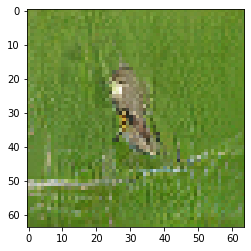

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 38

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.1119384765625 sec
Gen loss: 4.412854060247985, Gen valid loss: 1.2789081039467478, Gen attr loss: 1.5888092156025129, Gen caption loss: 1.5451367444139186, Disc valid loss: 1.1001635302050004, Disc valid real loss: 0.5562491871638673, Disc valid fake loss: 0.5439143414258311, Disc attr loss: 3.011668007871323, Disc attr real loss: 1.4228587922688098, Disc attr fake loss: 1.5888092156025129
Time for epoch 2 is 39.19543147087097 sec
Gen loss: 4.399328590408573, Gen valid loss: 1.2666218288868747, Gen attr loss: 1.588994541788489, Gen caption loss: 1.5437122337863374, Disc valid loss: 1.1001112924681768, Disc valid real loss: 0.5584104384994766, Disc valid fake loss: 0.5417008555032373, Disc attr loss: 3.0117244210023544, Disc attr real loss: 1.4227298792138656, Disc attr fake loss: 1.588994541788489
Time for epoch 3 is 39.12429904937744 sec
Gen loss:

Time for epoch 21 is 39.10012674331665 sec
Gen loss: 4.407183508239788, Gen valid loss: 1.2813285343692231, Gen attr loss: 1.5842930992767417, Gen caption loss: 1.5415618561793796, Disc valid loss: 1.0985026840918108, Disc valid real loss: 0.5570403351208705, Disc valid fake loss: 0.5414623490517055, Disc attr loss: 3.0062967516219388, Disc attr real loss: 1.4220036523451973, Disc attr fake loss: 1.5842930992767417
Time for epoch 22 is 39.14020323753357 sec
Gen loss: 4.412746508916219, Gen valid loss: 1.28251100523362, Gen attr loss: 1.5890531778981691, Gen caption loss: 1.5411823319225777, Disc valid loss: 1.092288879521171, Disc valid real loss: 0.5510352471172002, Disc valid fake loss: 0.541253630950199, Disc attr loss: 3.0110704759918256, Disc attr real loss: 1.4220172980936563, Disc attr fake loss: 1.5890531778981691
Time for epoch 23 is 39.156914949417114 sec
Gen loss: 4.4118404705026935, Gen valid loss: 1.2792821135624315, Gen attr loss: 1.5882449809128676, Gen caption loss: 1.5

Time for epoch 41 is 39.11837911605835 sec
Gen loss: 4.412759562494955, Gen valid loss: 1.2900169335083587, Gen attr loss: 1.5832293560188315, Gen caption loss: 1.5395132584300468, Disc valid loss: 1.088242585743023, Disc valid real loss: 0.548624194088344, Disc valid fake loss: 0.5396183927853903, Disc attr loss: 3.005544375597946, Disc attr real loss: 1.4223150195791145, Disc attr fake loss: 1.5832293560188315
Time for epoch 42 is 39.1576566696167 sec
Gen loss: 4.420307105795801, Gen valid loss: 1.2922028631052673, Gen attr loss: 1.5863645367506074, Gen caption loss: 1.5417397070706376, Disc valid loss: 1.0888833198443983, Disc valid real loss: 0.5486140299618729, Disc valid fake loss: 0.5402692896402302, Disc attr loss: 3.0078774916770334, Disc attr real loss: 1.4215129549264263, Disc attr fake loss: 1.5863645367506074
Time for epoch 43 is 39.1387460231781 sec
Gen loss: 4.419535952854932, Gen valid loss: 1.2871304963662373, Gen attr loss: 1.5870110449106067, Gen caption loss: 1.5453

Time for epoch 61 is 39.14976906776428 sec
Gen loss: 4.411329009022493, Gen valid loss: 1.28857855502829, Gen attr loss: 1.5820908307383055, Gen caption loss: 1.5406596218021258, Disc valid loss: 1.088765508275691, Disc valid real loss: 0.5516553698031883, Disc valid fake loss: 0.5371101390378585, Disc attr loss: 3.0013771115279777, Disc attr real loss: 1.4192862807896724, Disc attr fake loss: 1.5820908307383055
Time for epoch 62 is 39.122389793395996 sec
Gen loss: 4.404904897943099, Gen valid loss: 1.2810683352191274, Gen attr loss: 1.5819890851250833, Gen caption loss: 1.5418474764681767, Disc valid loss: 1.0948361187446407, Disc valid real loss: 0.5551668941813109, Disc valid fake loss: 0.5396692240787392, Disc attr loss: 3.001698149252067, Disc attr real loss: 1.4197090641269838, Disc attr fake loss: 1.5819890851250833
Time for epoch 63 is 39.15142846107483 sec
Gen loss: 4.400369423837843, Gen valid loss: 1.2769413958720075, Gen attr loss: 1.5852595861688217, Gen caption loss: 1.53

Time for epoch 81 is 39.14827299118042 sec
Gen loss: 4.395980724474279, Gen valid loss: 1.2737079831319773, Gen attr loss: 1.5811163590852484, Gen caption loss: 1.541156368526986, Disc valid loss: 1.102923380650156, Disc valid real loss: 0.560602553572435, Disc valid fake loss: 0.5423208233625262, Disc attr loss: 2.999641785776712, Disc attr real loss: 1.4185254266914638, Disc attr fake loss: 1.5811163590852484
Time for epoch 82 is 39.10902547836304 sec
Gen loss: 4.398013473526249, Gen valid loss: 1.2776263104221686, Gen attr loss: 1.5822511691711136, Gen caption loss: 1.538135994740618, Disc valid loss: 1.0943735014132367, Disc valid real loss: 0.5535687455316869, Disc valid fake loss: 0.5408047585467982, Disc attr loss: 3.000332937007997, Disc attr real loss: 1.4180817678368836, Disc attr fake loss: 1.5822511691711136
Time for epoch 83 is 39.10891556739807 sec
Gen loss: 4.388692222636567, Gen valid loss: 1.2666130422899717, Gen attr loss: 1.580725713797055, Gen caption loss: 1.541353

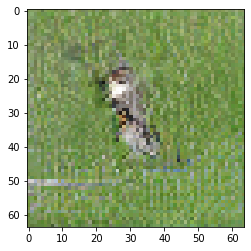

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 39

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.10933876037598 sec
Gen loss: 4.388210927890891, Gen valid loss: 1.2619685640503076, Gen attr loss: 1.5813262462615967, Gen caption loss: 1.5449161251709067, Disc valid loss: 1.1094113250735007, Disc valid real loss: 0.5590785053687367, Disc valid fake loss: 0.5503328169587505, Disc attr loss: 2.9985080731270437, Disc attr real loss: 1.417181826865447, Disc attr fake loss: 1.5813262462615967
Time for epoch 2 is 39.09289598464966 sec
Gen loss: 4.401120881078043, Gen valid loss: 1.2799014122828558, Gen attr loss: 1.5801292848457813, Gen caption loss: 1.5410901834648154, Disc valid loss: 1.0892644531035487, Disc valid real loss: 0.549528128974806, Disc valid fake loss: 0.5397363240479777, Disc attr loss: 2.9974387015107524, Disc attr real loss: 1.4173094166649713, Disc attr fake loss: 1.5801292848457813
Time for epoch 3 is 39.19079256057739 sec
Gen los

Time for epoch 21 is 39.150317430496216 sec
Gen loss: 4.404458432985838, Gen valid loss: 1.287817754396578, Gen attr loss: 1.577007428417361, Gen caption loss: 1.5396332550178051, Disc valid loss: 1.0933119638502435, Disc valid real loss: 0.5521985175325296, Disc valid fake loss: 0.5411134445408818, Disc attr loss: 2.992452801727667, Disc attr real loss: 1.4154453733103063, Disc attr fake loss: 1.577007428417361
Time for epoch 22 is 39.09721302986145 sec
Gen loss: 4.419753262667152, Gen valid loss: 1.2976888372969175, Gen attr loss: 1.5790907315768523, Gen caption loss: 1.5429737122078253, Disc valid loss: 1.083147279938385, Disc valid real loss: 0.5465030213035542, Disc valid fake loss: 0.5366442594424818, Disc attr loss: 2.994908577381434, Disc attr real loss: 1.4158178458045814, Disc attr fake loss: 1.5790907315768523
Time for epoch 23 is 39.10062646865845 sec
Gen loss: 4.420382338810742, Gen valid loss: 1.3014726758326296, Gen attr loss: 1.576227277598084, Gen caption loss: 1.54268

Time for epoch 41 is 39.125755071640015 sec
Gen loss: 4.416605270328883, Gen valid loss: 1.2876852729779271, Gen attr loss: 1.5810804825811204, Gen caption loss: 1.5478395110546412, Disc valid loss: 1.0946504468840312, Disc valid real loss: 0.5571157727945788, Disc valid fake loss: 0.5375346740086874, Disc attr loss: 2.9961717568115813, Disc attr real loss: 1.4150912742304609, Disc attr fake loss: 1.5810804825811204
Time for epoch 42 is 39.09759473800659 sec
Gen loss: 4.39570194208202, Gen valid loss: 1.2738556858646837, Gen attr loss: 1.5793028339783997, Gen caption loss: 1.5425434222389367, Disc valid loss: 1.0994826390491268, Disc valid real loss: 0.5595583452118768, Disc valid fake loss: 0.5399242955333172, Disc attr loss: 2.9934193357865664, Disc attr real loss: 1.4141165018081665, Disc attr fake loss: 1.5793028339783997
Time for epoch 43 is 39.16189408302307 sec
Gen loss: 4.4144440013864825, Gen valid loss: 1.2856741836723597, Gen attr loss: 1.582084912594741, Gen caption loss: 1

Time for epoch 61 is 39.154470920562744 sec
Gen loss: 4.395669241907797, Gen valid loss: 1.2589567780171629, Gen attr loss: 1.5856095271381905, Gen caption loss: 1.551102936429383, Disc valid loss: 1.1093219970946067, Disc valid real loss: 0.5592137416042287, Disc valid fake loss: 0.5501082579133311, Disc attr loss: 2.9978086247353697, Disc attr real loss: 1.412199097597179, Disc attr fake loss: 1.5856095271381905
Time for epoch 62 is 39.08418869972229 sec
Gen loss: 4.38272645932226, Gen valid loss: 1.2616323376412637, Gen attr loss: 1.5785017284920546, Gen caption loss: 1.542592398196378, Disc valid loss: 1.098338464734354, Disc valid real loss: 0.5577952539533134, Disc valid fake loss: 0.540543208761913, Disc attr loss: 2.9898413384186866, Disc attr real loss: 1.4113396099266322, Disc attr fake loss: 1.5785017284920546
Time for epoch 63 is 39.11030697822571 sec
Gen loss: 4.4073037875054, Gen valid loss: 1.2811893748074044, Gen attr loss: 1.5793229832558775, Gen caption loss: 1.546791

Time for epoch 81 is 39.09141993522644 sec
Gen loss: 4.399361852061781, Gen valid loss: 1.2776034379070045, Gen attr loss: 1.5776511589039954, Gen caption loss: 1.5441072452359084, Disc valid loss: 1.0920806955192794, Disc valid real loss: 0.5531442518318249, Disc valid fake loss: 0.5389364472411189, Disc attr loss: 2.988471349080404, Disc attr real loss: 1.4108201901764081, Disc attr fake loss: 1.5776511589039954
Time for epoch 82 is 39.12854552268982 sec
Gen loss: 4.417846562093512, Gen valid loss: 1.302501056898577, Gen attr loss: 1.5753043712316166, Gen caption loss: 1.540041133317198, Disc valid loss: 1.0819495919597182, Disc valid real loss: 0.5476727787718217, Disc valid fake loss: 0.5342768139955474, Disc attr loss: 2.9860603718899776, Disc attr real loss: 1.4107560006583608, Disc attr fake loss: 1.5753043712316166
Time for epoch 83 is 39.154950857162476 sec
Gen loss: 4.412431261403774, Gen valid loss: 1.2946769123477988, Gen attr loss: 1.5757510238869727, Gen caption loss: 1.5

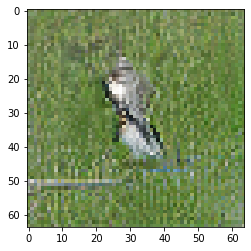

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 40

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.16574573516846 sec
Gen loss: 4.3935685784513065, Gen valid loss: 1.2791584775376772, Gen attr loss: 1.5735373064108333, Gen caption loss: 1.5408727977334, Disc valid loss: 1.0955974134972426, Disc valid real loss: 0.55138600979071, Disc valid fake loss: 0.544211403302707, Disc attr loss: 2.982753023868654, Disc attr real loss: 1.4092157174578204, Disc attr fake loss: 1.5735373064108333
Time for epoch 2 is 39.131683349609375 sec
Gen loss: 4.399004682938904, Gen valid loss: 1.2837692281094992, Gen attr loss: 1.5744672080042563, Gen caption loss: 1.5407682637858198, Disc valid loss: 1.0937471338080842, Disc valid real loss: 0.5531681499830107, Disc valid fake loss: 0.5405789846327247, Disc attr loss: 2.9835063083385065, Disc attr real loss: 1.4090391003342502, Disc attr fake loss: 1.5744672080042563
Time for epoch 3 is 39.109034299850464 sec
Gen loss:

Time for epoch 21 is 39.10751676559448 sec
Gen loss: 4.413167634307531, Gen valid loss: 1.2909543981073994, Gen attr loss: 1.5762099686676894, Gen caption loss: 1.5460032660786698, Disc valid loss: 1.095947516804465, Disc valid real loss: 0.5534651923954972, Disc valid fake loss: 0.542482323601317, Disc attr loss: 2.985156247609353, Disc attr real loss: 1.4089462789416636, Disc attr fake loss: 1.5762099686676894
Time for epoch 22 is 39.17079782485962 sec
Gen loss: 4.408678994269229, Gen valid loss: 1.2911796703894287, Gen attr loss: 1.5752720080093963, Gen caption loss: 1.5422273157088737, Disc valid loss: 1.0877645860519514, Disc valid real loss: 0.5481095572474203, Disc valid fake loss: 0.5396550271084638, Disc attr loss: 2.9839938426728496, Disc attr real loss: 1.4087218346634531, Disc attr fake loss: 1.5752720080093963
Time for epoch 23 is 39.09487175941467 sec
Gen loss: 4.397198711953512, Gen valid loss: 1.2875795671287267, Gen attr loss: 1.5719240629253026, Gen caption loss: 1.53

Time for epoch 41 is 39.140953540802 sec
Gen loss: 4.397190356965311, Gen valid loss: 1.2813729887732321, Gen attr loss: 1.5739045217431336, Gen caption loss: 1.5419128428952804, Disc valid loss: 1.0891489643391554, Disc valid real loss: 0.5502203923415362, Disc valid fake loss: 0.5389285734513911, Disc attr loss: 2.9816142259251457, Disc attr real loss: 1.4077097041820124, Disc attr fake loss: 1.5739045217431336
Time for epoch 42 is 39.11025857925415 sec
Gen loss: 4.401709564979161, Gen valid loss: 1.2879208621939993, Gen attr loss: 1.5726888706367514, Gen caption loss: 1.5410998200336445, Disc valid loss: 1.0914752472060805, Disc valid real loss: 0.5504586594860729, Disc valid fake loss: 0.5410165876392427, Disc attr loss: 2.9804089421502296, Disc attr real loss: 1.4077200715134783, Disc attr fake loss: 1.5726888706367514
Time for epoch 43 is 39.13122224807739 sec
Gen loss: 4.395023173433009, Gen valid loss: 1.2863723176927748, Gen attr loss: 1.5694020340436197, Gen caption loss: 1.5

Time for epoch 61 is 39.11996555328369 sec
Gen loss: 4.400494830072088, Gen valid loss: 1.2846166215291837, Gen attr loss: 1.5724504323509652, Gen caption loss: 1.543427756485254, Disc valid loss: 1.094287212948166, Disc valid real loss: 0.5554991491280274, Disc valid fake loss: 0.5387880637393734, Disc attr loss: 2.979562959696865, Disc attr real loss: 1.4071125273459002, Disc attr fake loss: 1.5724504323509652
Time for epoch 62 is 39.16244339942932 sec
Gen loss: 4.415871358499294, Gen valid loss: 1.2897047499007972, Gen attr loss: 1.578954450806305, Gen caption loss: 1.5472121490695612, Disc valid loss: 1.0903049888326546, Disc valid real loss: 0.551802690193905, Disc valid fake loss: 0.5385022990425751, Disc attr loss: 2.9856728244280104, Disc attr real loss: 1.4067183736217055, Disc attr fake loss: 1.578954450806305
Time for epoch 63 is 39.12363052368164 sec
Gen loss: 4.394367079101604, Gen valid loss: 1.2823321289486356, Gen attr loss: 1.5709558150309535, Gen caption loss: 1.54107

Time for epoch 81 is 39.13083219528198 sec
Gen loss: 4.409021566876874, Gen valid loss: 1.2943982381807757, Gen attr loss: 1.5708765434378853, Gen caption loss: 1.5437467873581057, Disc valid loss: 1.0909327572277245, Disc valid real loss: 0.555970327963997, Disc valid fake loss: 0.5349624300713784, Disc attr loss: 2.9767988619765613, Disc attr real loss: 1.4059223185386762, Disc attr fake loss: 1.5708765434378853
Time for epoch 82 is 39.097922563552856 sec
Gen loss: 4.408951390403396, Gen valid loss: 1.2901534686889753, Gen attr loss: 1.5755881012939825, Gen caption loss: 1.5432098057211898, Disc valid loss: 1.0892794561903005, Disc valid real loss: 0.5548707080404287, Disc valid fake loss: 0.5344087491998182, Disc attr loss: 2.981539795715311, Disc attr real loss: 1.4059516944213288, Disc attr fake loss: 1.5755881012939825
Time for epoch 83 is 39.12183499336243 sec
Gen loss: 4.387821313811512, Gen valid loss: 1.2793718049842813, Gen attr loss: 1.570486926450962, Gen caption loss: 1.5

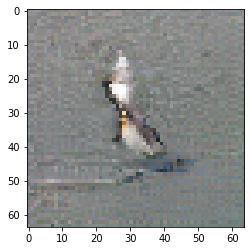

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 41

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.12169671058655 sec
Gen loss: 4.396353421172475, Gen valid loss: 1.2834234244132106, Gen attr loss: 1.5717467024397398, Gen caption loss: 1.5411832849507732, Disc valid loss: 1.0971344207037432, Disc valid real loss: 0.5544466360151606, Disc valid fake loss: 0.5426877833155759, Disc attr loss: 2.977229270508619, Disc attr real loss: 1.4054825680688792, Disc attr fake loss: 1.5717467024397398
Time for epoch 2 is 39.11358070373535 sec
Gen loss: 4.391995821541887, Gen valid loss: 1.2744015128954962, Gen attr loss: 1.5747848254878347, Gen caption loss: 1.5428094724975627, Disc valid loss: 1.0942927710409087, Disc valid real loss: 0.5511047718970756, Disc valid fake loss: 0.5431879968824103, Disc attr loss: 2.9807296606906384, Disc attr real loss: 1.4059448352028039, Disc attr fake loss: 1.5747848254878347
Time for epoch 3 is 39.09098291397095 sec
Gen lo

Time for epoch 21 is 39.14048767089844 sec
Gen loss: 4.401174238380701, Gen valid loss: 1.281047264088783, Gen attr loss: 1.5758473123638288, Gen caption loss: 1.5442796538515788, Disc valid loss: 1.1009289058566416, Disc valid real loss: 0.5540199452622473, Disc valid fake loss: 0.5469089596252131, Disc attr loss: 2.9808649209133655, Disc attr real loss: 1.4050176085495367, Disc attr fake loss: 1.5758473123638288
Time for epoch 22 is 39.11856985092163 sec
Gen loss: 4.403980007016562, Gen valid loss: 1.2819348974279594, Gen attr loss: 1.576238647062927, Gen caption loss: 1.545806473509729, Disc valid loss: 1.0934492528923159, Disc valid real loss: 0.5560842855835995, Disc valid fake loss: 0.5373649685201929, Disc attr loss: 2.9811956452806467, Disc attr real loss: 1.4049569982177197, Disc attr fake loss: 1.576238647062927
Time for epoch 23 is 39.09562611579895 sec
Gen loss: 4.3791098762656935, Gen valid loss: 1.2675987491762735, Gen attr loss: 1.5715767794508275, Gen caption loss: 1.53

Time for epoch 41 is 39.09199810028076 sec
Gen loss: 4.3759029770931255, Gen valid loss: 1.267888857581751, Gen attr loss: 1.5698041486223215, Gen caption loss: 1.5382099565128646, Disc valid loss: 1.1038435358342116, Disc valid real loss: 0.5602731309770569, Disc valid fake loss: 0.5435704061493964, Disc attr loss: 2.974029034133849, Disc attr real loss: 1.4042248855115276, Disc attr fake loss: 1.5698041486223215
Time for epoch 42 is 39.12763023376465 sec
Gen loss: 4.388998097520534, Gen valid loss: 1.2703807849871112, Gen attr loss: 1.5744544949311874, Gen caption loss: 1.5441628235788527, Disc valid loss: 1.0945539763626368, Disc valid real loss: 0.5484334841007139, Disc valid fake loss: 0.5461204917773321, Disc attr loss: 2.978954769085416, Disc attr real loss: 1.404500274154229, Disc attr fake loss: 1.5744544949311874
Time for epoch 43 is 39.102362871170044 sec
Gen loss: 4.410627113125188, Gen valid loss: 1.283026443587409, Gen attr loss: 1.5782236923693318, Gen caption loss: 1.54

Time for epoch 61 is 39.072083950042725 sec
Gen loss: 4.402328235993218, Gen valid loss: 1.2895977762010362, Gen attr loss: 1.569610279103928, Gen caption loss: 1.5431201729348036, Disc valid loss: 1.0931540713077639, Disc valid real loss: 0.5509105595308268, Disc valid fake loss: 0.5422435124230579, Disc attr loss: 2.973471371785089, Disc attr real loss: 1.4038610926811612, Disc attr fake loss: 1.569610279103928
Time for epoch 62 is 39.13849711418152 sec
Gen loss: 4.406387471894262, Gen valid loss: 1.291301497760504, Gen attr loss: 1.5726981595925846, Gen caption loss: 1.5423878037186496, Disc valid loss: 1.0901852374477439, Disc valid real loss: 0.5504743298540916, Disc valid fake loss: 0.5397109057360548, Disc attr loss: 2.9769019499057676, Disc attr real loss: 1.4042037903131832, Disc attr fake loss: 1.5726981595925846
Time for epoch 63 is 39.15625858306885 sec
Gen loss: 4.400679961129579, Gen valid loss: 1.282107303620677, Gen attr loss: 1.5730214193261414, Gen caption loss: 1.545

Time for epoch 81 is 39.12150192260742 sec
Gen loss: 4.390330963341524, Gen valid loss: 1.2755834117814455, Gen attr loss: 1.5727888355410196, Gen caption loss: 1.5419587203803746, Disc valid loss: 1.1020647351980855, Disc valid real loss: 0.5585008736063795, Disc valid fake loss: 0.5435638634493034, Disc attr loss: 2.9761405142988293, Disc attr real loss: 1.4033516787578098, Disc attr fake loss: 1.5727888355410196
Time for epoch 82 is 39.15230059623718 sec
Gen loss: 4.39094291340691, Gen valid loss: 1.2714725429126563, Gen attr loss: 1.5748739908058145, Gen caption loss: 1.544596377427016, Disc valid loss: 1.0907849433622385, Disc valid real loss: 0.5531099643810655, Disc valid fake loss: 0.5376749807580053, Disc attr loss: 2.9782079587460855, Disc attr real loss: 1.403333967940271, Disc attr fake loss: 1.5748739908058145
Time for epoch 83 is 39.09547233581543 sec
Gen loss: 4.417884650915296, Gen valid loss: 1.3056140029979593, Gen attr loss: 1.5712561662281108, Gen caption loss: 1.54

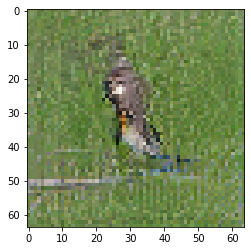

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 42

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.08945035934448 sec
Gen loss: 4.399157761235224, Gen valid loss: 1.2843456699596187, Gen attr loss: 1.5708159915800017, Gen caption loss: 1.5439960898422613, Disc valid loss: 1.1015715956041807, Disc valid real loss: 0.5598178824919672, Disc valid fake loss: 0.5417537136775691, Disc attr loss: 2.9734268834597373, Disc attr real loss: 1.4026108918797355, Disc attr fake loss: 1.5708159915800017
Time for epoch 2 is 39.07602620124817 sec
Gen loss: 4.396785896321945, Gen valid loss: 1.280683512287088, Gen attr loss: 1.5719723455951142, Gen caption loss: 1.5441300342399575, Disc valid loss: 1.096858546824313, Disc valid real loss: 0.554707921294339, Disc valid fake loss: 0.5421506239954372, Disc attr loss: 2.9748055711994326, Disc attr real loss: 1.4028332256043183, Disc attr fake loss: 1.5719723455951142
Time for epoch 3 is 39.149513721466064 sec
Gen los

Time for epoch 21 is 39.11237120628357 sec
Gen loss: 4.40421757013171, Gen valid loss: 1.2865045842762561, Gen attr loss: 1.5749144402299793, Gen caption loss: 1.542798547563837, Disc valid loss: 1.0945816395405508, Disc valid real loss: 0.5535495974184051, Disc valid fake loss: 0.5410320422836759, Disc attr loss: 2.9763622626379576, Disc attr real loss: 1.4014478224079783, Disc attr fake loss: 1.5749144402299793
Time for epoch 22 is 39.15838694572449 sec
Gen loss: 4.407942669824533, Gen valid loss: 1.2874333700190392, Gen attr loss: 1.5741214154535517, Gen caption loss: 1.5463878898439691, Disc valid loss: 1.0866799535467049, Disc valid real loss: 0.5460078725162237, Disc valid fake loss: 0.540672080868951, Disc attr loss: 2.975506563819844, Disc attr real loss: 1.4013851483662922, Disc attr fake loss: 1.5741214154535517
Time for epoch 23 is 39.102500915527344 sec
Gen loss: 4.40719215075175, Gen valid loss: 1.2906553858340917, Gen attr loss: 1.5707185417009886, Gen caption loss: 1.545

Time for epoch 41 is 39.109811544418335 sec
Gen loss: 4.4041552440260805, Gen valid loss: 1.2884149888989724, Gen attr loss: 1.5732804811420802, Gen caption loss: 1.5424597618702627, Disc valid loss: 1.0922671567779894, Disc valid real loss: 0.551671664970031, Disc valid fake loss: 0.5405954919694885, Disc attr loss: 2.974268777583673, Disc attr real loss: 1.4009882964415925, Disc attr fake loss: 1.5732804811420802
Time for epoch 42 is 39.13399791717529 sec
Gen loss: 4.384013387891981, Gen valid loss: 1.2735850515404368, Gen attr loss: 1.5697029657803254, Gen caption loss: 1.5407253742864138, Disc valid loss: 1.094208288160443, Disc valid real loss: 0.5506745007464556, Disc valid fake loss: 0.5435337853140947, Disc attr loss: 2.9707444399029903, Disc attr real loss: 1.401041474122665, Disc attr fake loss: 1.5697029657803254
Time for epoch 43 is 39.176825523376465 sec
Gen loss: 4.392764472702978, Gen valid loss: 1.2822278272814867, Gen attr loss: 1.5703499275171338, Gen caption loss: 1.

Time for epoch 61 is 39.05726766586304 sec
Gen loss: 4.428429716647802, Gen valid loss: 1.3012152900540732, Gen attr loss: 1.5783518837073307, Gen caption loss: 1.5488625448247604, Disc valid loss: 1.0841022746026678, Disc valid real loss: 0.5432148143689484, Disc valid fake loss: 0.5408874595875985, Disc attr loss: 2.9790599733833374, Disc attr real loss: 1.4007080896760067, Disc attr fake loss: 1.5783518837073307
Time for epoch 62 is 39.13827991485596 sec
Gen loss: 4.413437168772628, Gen valid loss: 1.298273358726243, Gen attr loss: 1.5718145774308905, Gen caption loss: 1.5433492243774538, Disc valid loss: 1.0853560539442026, Disc valid real loss: 0.5497440825794447, Disc valid fake loss: 0.535611969910986, Disc attr loss: 2.971831476139182, Disc attr real loss: 1.4000168987082917, Disc attr fake loss: 1.5718145774308905
Time for epoch 63 is 39.116026163101196 sec
Gen loss: 4.420811012831484, Gen valid loss: 1.2971083709217992, Gen attr loss: 1.57618700424184, Gen caption loss: 1.547

Time for epoch 81 is 39.139705181121826 sec
Gen loss: 4.391705571151361, Gen valid loss: 1.275505384132468, Gen attr loss: 1.570410305245459, Gen caption loss: 1.545789868851018, Disc valid loss: 1.0985292012129373, Disc valid real loss: 0.5570440736566455, Disc valid fake loss: 0.5414851280408823, Disc attr loss: 2.9705341928373508, Disc attr real loss: 1.4001238875918918, Disc attr fake loss: 1.570410305245459
Time for epoch 82 is 39.150949001312256 sec
Gen loss: 4.395348690389618, Gen valid loss: 1.2739566771318596, Gen attr loss: 1.5771560552643566, Gen caption loss: 1.5442359521783142, Disc valid loss: 1.09746030288014, Disc valid real loss: 0.5559253972881855, Disc valid fake loss: 0.5415349055111893, Disc attr loss: 2.977004402052096, Disc attr real loss: 1.3998483467877396, Disc attr fake loss: 1.5771560552643566
Time for epoch 83 is 39.155566453933716 sec
Gen loss: 4.419480173245355, Gen valid loss: 1.2903961109598154, Gen attr loss: 1.5792219138080834, Gen caption loss: 1.549

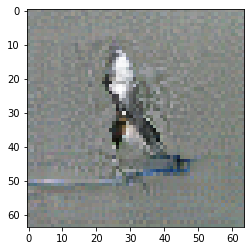

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 43

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.198744773864746 sec
Gen loss: 4.3673567849446115, Gen valid loss: 1.2536659539553532, Gen attr loss: 1.5707723370735562, Gen caption loss: 1.5429184976308972, Disc valid loss: 1.111037772360856, Disc valid real loss: 0.5646899782706728, Disc valid fake loss: 0.5463477919902905, Disc attr loss: 2.9700352916226476, Disc attr real loss: 1.3992629545490916, Disc attr fake loss: 1.5707723370735562
Time for epoch 2 is 39.09829092025757 sec
Gen loss: 4.3957748897676545, Gen valid loss: 1.281302226268179, Gen attr loss: 1.571809875609752, Gen caption loss: 1.542662785951361, Disc valid loss: 1.0900290440414657, Disc valid real loss: 0.5523566039112525, Disc valid fake loss: 0.5376724390802667, Disc attr loss: 2.9708928325311925, Disc attr real loss: 1.3990829569214405, Disc attr fake loss: 1.571809875609752
Time for epoch 3 is 39.1158332824707 sec
Gen loss

Time for epoch 21 is 39.102919578552246 sec
Gen loss: 4.403103491155113, Gen valid loss: 1.2875455256077009, Gen attr loss: 1.572837114011046, Gen caption loss: 1.5427208499210636, Disc valid loss: 1.0948464015958108, Disc valid real loss: 0.5554025914610886, Disc valid fake loss: 0.5394438116692593, Disc attr loss: 2.9711660870368566, Disc attr real loss: 1.3983289730258104, Disc attr fake loss: 1.572837114011046
Time for epoch 22 is 39.10735869407654 sec
Gen loss: 4.396214956836649, Gen valid loss: 1.277808334446212, Gen attr loss: 1.5729922579555977, Gen caption loss: 1.5454143592658727, Disc valid loss: 1.0943720969081248, Disc valid real loss: 0.5517001450061798, Disc valid fake loss: 0.5426719506904685, Disc attr loss: 2.9716396083030596, Disc attr real loss: 1.3986473503474621, Disc attr fake loss: 1.5729922579555977
Time for epoch 23 is 39.14675188064575 sec
Gen loss: 4.399659837810651, Gen valid loss: 1.284069457512884, Gen attr loss: 1.5724766722862638, Gen caption loss: 1.54

Time for epoch 41 is 39.140241384506226 sec
Gen loss: 4.411293922077996, Gen valid loss: 1.291199631968811, Gen attr loss: 1.573769621409698, Gen caption loss: 1.5463246685379566, Disc valid loss: 1.0923760462259535, Disc valid real loss: 0.5511228594030468, Disc valid fake loss: 0.5412531877113228, Disc attr loss: 2.9723909392266417, Disc attr real loss: 1.3986213178169438, Disc attr fake loss: 1.573769621409698
Time for epoch 42 is 39.13594460487366 sec
Gen loss: 4.395203745462061, Gen valid loss: 1.2762694405669441, Gen attr loss: 1.5739969716162538, Gen caption loss: 1.5449373289175472, Disc valid loss: 1.0963337098356831, Disc valid real loss: 0.5542267772563427, Disc valid fake loss: 0.5421069339523471, Disc attr loss: 2.972490251225831, Disc attr real loss: 1.3984932796095768, Disc attr fake loss: 1.5739969716162538
Time for epoch 43 is 39.10488748550415 sec
Gen loss: 4.399814471319762, Gen valid loss: 1.2865602097860196, Gen attr loss: 1.5710532490800067, Gen caption loss: 1.54

Time for epoch 61 is 39.081440687179565 sec
Gen loss: 4.37936467917631, Gen valid loss: 1.2636976526358585, Gen attr loss: 1.5722264413265032, Gen caption loss: 1.5434405806911025, Disc valid loss: 1.1088370666271303, Disc valid real loss: 0.5602459048998711, Disc valid fake loss: 0.5485911603542525, Disc attr loss: 2.970289010019483, Disc attr real loss: 1.3980625686929802, Disc attr fake loss: 1.5722264413265032
Time for epoch 62 is 39.11538648605347 sec
Gen loss: 4.385460880713734, Gen valid loss: 1.2701966476634265, Gen attr loss: 1.5703606485997434, Gen caption loss: 1.5449035703974365, Disc valid loss: 1.0949063700066026, Disc valid real loss: 0.5534960306918395, Disc valid fake loss: 0.5414103391532329, Disc attr loss: 2.968322746798921, Disc attr real loss: 1.3979620981991776, Disc attr fake loss: 1.5703606485997434
Time for epoch 63 is 39.12373924255371 sec
Gen loss: 4.389045057581046, Gen valid loss: 1.2830765205347119, Gen attr loss: 1.5668595935594098, Gen caption loss: 1.5

Time for epoch 81 is 39.15766215324402 sec
Gen loss: 4.38259843500649, Gen valid loss: 1.2751829163814947, Gen attr loss: 1.568213118447198, Gen caption loss: 1.5392024048621737, Disc valid loss: 1.0971030184246984, Disc valid real loss: 0.5548637042523723, Disc valid fake loss: 0.5422393140107958, Disc attr loss: 2.9658044647718187, Disc attr real loss: 1.3975913463246208, Disc attr fake loss: 1.568213118447198
Time for epoch 82 is 39.097408294677734 sec
Gen loss: 4.394759060567633, Gen valid loss: 1.2821611327530569, Gen attr loss: 1.5694770535156333, Gen caption loss: 1.5431208762373059, Disc valid loss: 1.0899098281291766, Disc valid real loss: 0.5535747735965543, Disc valid fake loss: 0.5363350547749176, Disc attr loss: 2.9673879191804384, Disc attr real loss: 1.3979108656648052, Disc attr fake loss: 1.5694770535156333
Time for epoch 83 is 39.07242798805237 sec
Gen loss: 4.40353434583359, Gen valid loss: 1.2900169133170833, Gen attr loss: 1.5708170896623193, Gen caption loss: 1.54

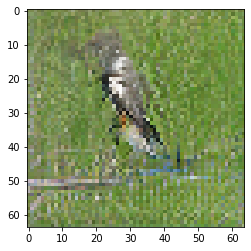

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 44

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.13264870643616 sec
Gen loss: 4.385133728425354, Gen valid loss: 1.2752504479594347, Gen attr loss: 1.5691283479292542, Gen caption loss: 1.5407549343134976, Disc valid loss: 1.103072054825501, Disc valid real loss: 0.5612907579274682, Disc valid fake loss: 0.5417812989979256, Disc attr loss: 2.966393621310309, Disc attr real loss: 1.3972652733810549, Disc attr fake loss: 1.5691283479292542
Time for epoch 2 is 39.10754179954529 sec
Gen loss: 4.407028236363315, Gen valid loss: 1.2847866929643523, Gen attr loss: 1.5761667809835294, Gen caption loss: 1.5460747519159705, Disc valid loss: 1.090742671877388, Disc valid real loss: 0.5525079912286464, Disc valid fake loss: 0.5382346824255739, Disc attr loss: 2.9729502911813213, Disc attr real loss: 1.396783510197792, Disc attr fake loss: 1.5761667809835294
Time for epoch 3 is 39.119616985321045 sec
Gen loss

Time for epoch 21 is 39.16160345077515 sec
Gen loss: 4.40885825015019, Gen valid loss: 1.3003578743314355, Gen attr loss: 1.5660550171120704, Gen caption loss: 1.5424453643602407, Disc valid loss: 1.0885370956849922, Disc valid real loss: 0.5516605191437532, Disc valid fake loss: 0.5368765742798162, Disc attr loss: 2.9629789778210607, Disc attr real loss: 1.3969239607089903, Disc attr fake loss: 1.5660550171120704
Time for epoch 22 is 39.15602469444275 sec
Gen loss: 4.390831770935679, Gen valid loss: 1.2833717179492237, Gen attr loss: 1.5684270022038198, Gen caption loss: 1.5390330336604339, Disc valid loss: 1.08838569778737, Disc valid real loss: 0.5523964142411705, Disc valid fake loss: 0.5359892829000789, Disc attr loss: 2.9653611002252678, Disc attr real loss: 1.3969340980214477, Disc attr fake loss: 1.5684270022038198
Time for epoch 23 is 39.084397315979004 sec
Gen loss: 4.401840373429502, Gen valid loss: 1.2913689198209664, Gen attr loss: 1.5691030477766745, Gen caption loss: 1.5

Time for epoch 41 is 39.073556900024414 sec
Gen loss: 4.387950018492495, Gen valid loss: 1.2681536191524205, Gen attr loss: 1.5735622208292892, Gen caption loss: 1.5462341799645567, Disc valid loss: 1.1100365674592616, Disc valid real loss: 0.5592809367147564, Disc valid fake loss: 0.5507556290484379, Disc attr loss: 2.9701773076845703, Disc attr real loss: 1.396615086855281, Disc attr fake loss: 1.5735622208292892
Time for epoch 42 is 39.10557961463928 sec
Gen loss: 4.391005653675979, Gen valid loss: 1.2709650956195222, Gen attr loss: 1.573927907116691, Gen caption loss: 1.5461126549780206, Disc valid loss: 1.0939546209686817, Disc valid real loss: 0.5552401222026122, Disc valid fake loss: 0.5387144979584185, Disc attr loss: 2.9700541822567863, Disc attr real loss: 1.3961262751400956, Disc attr fake loss: 1.573927907116691
Time for epoch 43 is 39.17060375213623 sec
Gen loss: 4.412500731021085, Gen valid loss: 1.3010108322308962, Gen attr loss: 1.5694875988533827, Gen caption loss: 1.5

Time for epoch 61 is 39.154492139816284 sec
Gen loss: 4.408804145285754, Gen valid loss: 1.2800164804226015, Gen attr loss: 1.578657494004826, Gen caption loss: 1.550130165043239, Disc valid loss: 1.096249168319754, Disc valid real loss: 0.554755131242075, Disc valid fake loss: 0.5414940357854373, Disc attr loss: 2.97478969051909, Disc attr real loss: 1.3961321965142641, Disc attr fake loss: 1.578657494004826
Time for epoch 62 is 39.10340642929077 sec
Gen loss: 4.4037518210527375, Gen valid loss: 1.2797552447331952, Gen attr loss: 1.5774460265306922, Gen caption loss: 1.546550547527427, Disc valid loss: 1.0950627520801575, Disc valid real loss: 0.5551583776629068, Disc valid fake loss: 0.5399043760325527, Disc attr loss: 2.9733680709590757, Disc attr real loss: 1.3959220444283835, Disc attr fake loss: 1.5774460265306922
Time for epoch 63 is 39.117470026016235 sec
Gen loss: 4.392242376074235, Gen valid loss: 1.279737192925399, Gen attr loss: 1.570497898874567, Gen caption loss: 1.542007

Time for epoch 81 is 39.119932413101196 sec
Gen loss: 4.386838453571971, Gen valid loss: 1.269860870146816, Gen attr loss: 1.5735486261243743, Gen caption loss: 1.5434289540701764, Disc valid loss: 1.0975253569078316, Disc valid real loss: 0.5529675339134081, Disc valid fake loss: 0.5445578217829469, Disc attr loss: 2.969638309181544, Disc attr real loss: 1.3960896830571699, Disc attr fake loss: 1.5735486261243743
Time for epoch 82 is 39.14847230911255 sec
Gen loss: 4.418262936558504, Gen valid loss: 1.296344577620023, Gen attr loss: 1.5749775151896284, Gen caption loss: 1.546940861032584, Disc valid loss: 1.0858116372814024, Disc valid real loss: 0.5527154654668276, Disc valid fake loss: 0.5330961697954473, Disc attr loss: 2.97053227902751, Disc attr real loss: 1.3955547638378816, Disc attr fake loss: 1.5749775151896284
Time for epoch 83 is 39.06941890716553 sec
Gen loss: 4.407119294815271, Gen valid loss: 1.2932949665439162, Gen attr loss: 1.570015689221824, Gen caption loss: 1.54380

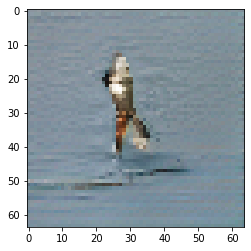

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 45

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.19059872627258 sec
Gen loss: 4.405153014149446, Gen valid loss: 1.2930875580485275, Gen attr loss: 1.5707796366234137, Gen caption loss: 1.5412858159238407, Disc valid loss: 1.0951158533574443, Disc valid real loss: 0.5591034504779309, Disc valid fake loss: 0.5360124036871644, Disc attr loss: 2.966009350973093, Disc attr real loss: 1.3952297143496795, Disc attr fake loss: 1.5707796366234137
Time for epoch 2 is 39.118762731552124 sec
Gen loss: 4.391518661323278, Gen valid loss: 1.2777503594796509, Gen attr loss: 1.5701676458524172, Gen caption loss: 1.5436006490454117, Disc valid loss: 1.0966293928099842, Disc valid real loss: 0.5576158589140833, Disc valid fake loss: 0.5390135356727331, Disc attr loss: 2.9652599231983587, Disc attr real loss: 1.3950922773459415, Disc attr fake loss: 1.5701676458524172
Time for epoch 3 is 39.10924220085144 sec
Gen l

Time for epoch 21 is 39.066044092178345 sec
Gen loss: 4.411909244894012, Gen valid loss: 1.2830465382676783, Gen attr loss: 1.5782451639330484, Gen caption loss: 1.5506175346167752, Disc valid loss: 1.0951153983268633, Disc valid real loss: 0.5564972198591, Disc valid fake loss: 0.5386181791138843, Disc attr loss: 2.9729270363241675, Disc attr real loss: 1.3946818723911192, Disc attr fake loss: 1.5782451639330484
Time for epoch 22 is 39.118870973587036 sec
Gen loss: 4.404841609117462, Gen valid loss: 1.276456557799807, Gen attr loss: 1.5767138934716947, Gen caption loss: 1.5516711567152484, Disc valid loss: 1.0983532213260165, Disc valid real loss: 0.5566140687077995, Disc valid fake loss: 0.5417391535873982, Disc attr loss: 2.9717076826224806, Disc attr real loss: 1.394993789150786, Disc attr fake loss: 1.5767138934716947
Time for epoch 23 is 39.08369708061218 sec
Gen loss: 4.39777191609225, Gen valid loss: 1.2839286354822195, Gen attr loss: 1.5716770280021315, Gen caption loss: 1.542

Time for epoch 41 is 39.102941274642944 sec
Gen loss: 4.395906149210322, Gen valid loss: 1.2760374552512233, Gen attr loss: 1.5740328209833079, Gen caption loss: 1.545835871037429, Disc valid loss: 1.1014853707820096, Disc valid real loss: 0.5571422127042682, Disc valid fake loss: 0.5443431620352314, Disc attr loss: 2.9684694197765857, Disc attr real loss: 1.3944365987932779, Disc attr fake loss: 1.5740328209833079
Time for epoch 42 is 39.089094161987305 sec
Gen loss: 4.412051860556047, Gen valid loss: 1.2894839442519315, Gen attr loss: 1.5754519629930739, Gen caption loss: 1.5471159542802226, Disc valid loss: 1.0904298235730427, Disc valid real loss: 0.5522948590720572, Disc valid fake loss: 0.5381349642586902, Disc attr loss: 2.9705196205516495, Disc attr real loss: 1.3950676575585756, Disc attr fake loss: 1.5754519629930739
Time for epoch 43 is 39.09331798553467 sec
Gen loss: 4.395663323441172, Gen valid loss: 1.2835773236060206, Gen attr loss: 1.5695973234124947, Gen caption loss: 

Time for epoch 61 is 39.08348226547241 sec
Gen loss: 4.38142495297481, Gen valid loss: 1.2738882065788517, Gen attr loss: 1.5677315200247415, Gen caption loss: 1.539805214256452, Disc valid loss: 1.0996558457855288, Disc valid real loss: 0.5540435255219943, Disc valid fake loss: 0.5456123222826619, Disc attr loss: 2.962501675778934, Disc attr real loss: 1.3947701557541927, Disc attr fake loss: 1.5677315200247415
Time for epoch 62 is 39.11618494987488 sec
Gen loss: 4.403042314498405, Gen valid loss: 1.283486999470367, Gen attr loss: 1.5731444297444206, Gen caption loss: 1.5464108836683155, Disc valid loss: 1.0918908456799783, Disc valid real loss: 0.5512438489169609, Disc valid fake loss: 0.5406469966014873, Disc attr loss: 2.9678899640959453, Disc attr real loss: 1.3947455343515247, Disc attr fake loss: 1.5731444297444206
Time for epoch 63 is 39.08570837974548 sec
Gen loss: 4.410636803645105, Gen valid loss: 1.2823124305019533, Gen attr loss: 1.5775231827242264, Gen caption loss: 1.550

Time for epoch 81 is 39.14379906654358 sec
Gen loss: 4.406272897229285, Gen valid loss: 1.286785144146865, Gen attr loss: 1.572125256223084, Gen caption loss: 1.5473625007360607, Disc valid loss: 1.094244930802322, Disc valid real loss: 0.5507616289262849, Disc valid fake loss: 0.5434833005030304, Disc attr loss: 2.9663190189092785, Disc attr real loss: 1.3941937626861944, Disc attr fake loss: 1.572125256223084
Time for epoch 82 is 39.09684634208679 sec
Gen loss: 4.405139353863269, Gen valid loss: 1.2881049801340594, Gen attr loss: 1.5704680765224344, Gen caption loss: 1.546566309644601, Disc valid loss: 1.0907721383784845, Disc valid real loss: 0.5481848348446978, Disc valid fake loss: 0.5425873007877733, Disc attr loss: 2.964686956185959, Disc attr real loss: 1.3942188796635242, Disc attr fake loss: 1.5704680765224344
Time for epoch 83 is 39.09680676460266 sec
Gen loss: 4.402119655919269, Gen valid loss: 1.2820983601779472, Gen attr loss: 1.5732397332101011, Gen caption loss: 1.54678

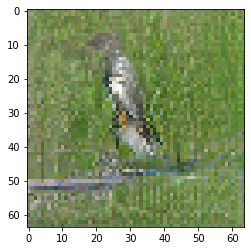

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 46

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.100444078445435 sec
Gen loss: 4.400544853391363, Gen valid loss: 1.2908202186832582, Gen attr loss: 1.5706006178687903, Gen caption loss: 1.5391240187776767, Disc valid loss: 1.0952551555504322, Disc valid real loss: 0.5572401231058891, Disc valid fake loss: 0.5380150315561268, Disc attr loss: 2.9642487958194765, Disc attr real loss: 1.393648177950686, Disc attr fake loss: 1.5706006178687903
Time for epoch 2 is 39.11818027496338 sec
Gen loss: 4.38947559049136, Gen valid loss: 1.2865600140114142, Gen attr loss: 1.5656596021600533, Gen caption loss: 1.537255974966013, Disc valid loss: 1.0913468305334488, Disc valid real loss: 0.5501276428298898, Disc valid fake loss: 0.5412191862497873, Disc attr loss: 2.9597310160556782, Disc attr real loss: 1.3940714138956252, Disc attr fake loss: 1.5656596021600533
Time for epoch 3 is 39.08536982536316 sec
Gen los

Time for epoch 21 is 39.09444618225098 sec
Gen loss: 4.383474308623854, Gen valid loss: 1.2805852534648203, Gen attr loss: 1.5649690802504377, Gen caption loss: 1.537919982015925, Disc valid loss: 1.0973674354514455, Disc valid real loss: 0.556725551280872, Disc valid fake loss: 0.5406418843321038, Disc attr loss: 2.958496777022757, Disc attr real loss: 1.3935276967723196, Disc attr fake loss: 1.5649690802504377
Time for epoch 22 is 39.09660840034485 sec
Gen loss: 4.390620990820371, Gen valid loss: 1.2854757147429758, Gen attr loss: 1.5677308154299976, Gen caption loss: 1.5374144525708868, Disc valid loss: 1.0900797280192698, Disc valid real loss: 0.5531771228242373, Disc valid fake loss: 0.5369026051950325, Disc attr loss: 2.961275973940283, Disc attr real loss: 1.3935451585102856, Disc attr fake loss: 1.5677308154299976
Time for epoch 23 is 39.11263966560364 sec
Gen loss: 4.397576592478972, Gen valid loss: 1.2847659405330978, Gen attr loss: 1.5706808263370338, Gen caption loss: 1.542

Time for epoch 41 is 39.122384548187256 sec
Gen loss: 4.400756151695561, Gen valid loss: 1.2876045060997734, Gen attr loss: 1.569722397540643, Gen caption loss: 1.5434292561316554, Disc valid loss: 1.0963856388882893, Disc valid real loss: 0.5599120961133703, Disc valid fake loss: 0.5364735426941538, Disc attr loss: 2.963048390902801, Disc attr real loss: 1.393325993362158, Disc attr fake loss: 1.569722397540643
Time for epoch 42 is 39.14039421081543 sec
Gen loss: 4.39289159891082, Gen valid loss: 1.2839501217451845, Gen attr loss: 1.5699847558649576, Gen caption loss: 1.5389567141933493, Disc valid loss: 1.09217199772031, Disc valid real loss: 0.5533767580016842, Disc valid fake loss: 0.5387952368110822, Disc attr loss: 2.963667536169533, Disc attr real loss: 1.3936827803045753, Disc attr fake loss: 1.5699847558649576
Time for epoch 43 is 39.09464240074158 sec
Gen loss: 4.39542063206515, Gen valid loss: 1.290375836657961, Gen attr loss: 1.5686358979077843, Gen caption loss: 1.53640890

Time for epoch 61 is 39.106815576553345 sec
Gen loss: 4.402793824834229, Gen valid loss: 1.2795981175208155, Gen attr loss: 1.5752608333499774, Gen caption loss: 1.547934875578738, Disc valid loss: 1.0973935674845687, Disc valid real loss: 0.5569787640881733, Disc valid fake loss: 0.5404148046078721, Disc attr loss: 2.9682533879913287, Disc attr real loss: 1.3929925546413515, Disc attr fake loss: 1.5752608333499774
Time for epoch 62 is 39.08651638031006 sec
Gen loss: 4.398115124482772, Gen valid loss: 1.285991638495024, Gen attr loss: 1.5705524983444834, Gen caption loss: 1.5415710004041512, Disc valid loss: 1.091184147166689, Disc valid real loss: 0.5517788285485451, Disc valid fake loss: 0.5394053196680901, Disc attr loss: 2.963663654598763, Disc attr real loss: 1.39311115625428, Disc attr fake loss: 1.5705524983444834
Time for epoch 63 is 39.117308378219604 sec
Gen loss: 4.403783965563063, Gen valid loss: 1.2808508134792813, Gen attr loss: 1.5730320228147636, Gen caption loss: 1.549

Time for epoch 81 is 39.06203627586365 sec
Gen loss: 4.401537879695737, Gen valid loss: 1.2912814458857385, Gen attr loss: 1.569948354387671, Gen caption loss: 1.5403080645615492, Disc valid loss: 1.0964428955300392, Disc valid real loss: 0.554469610778943, Disc valid fake loss: 0.541973282247378, Disc attr loss: 2.9623500418856863, Disc attr real loss: 1.3924016874980152, Disc attr fake loss: 1.569948354387671
Time for epoch 82 is 39.15790271759033 sec
Gen loss: 4.38536539891871, Gen valid loss: 1.277364048531385, Gen attr loss: 1.5682081074572514, Gen caption loss: 1.5397932468067985, Disc valid loss: 1.0908021466518805, Disc valid real loss: 0.5516635278860728, Disc valid fake loss: 0.5391386180389218, Disc attr loss: 2.9601030078360706, Disc attr real loss: 1.391894900378819, Disc attr fake loss: 1.5682081074572514
Time for epoch 83 is 39.11929392814636 sec
Gen loss: 4.389583555986564, Gen valid loss: 1.283565244377467, Gen attr loss: 1.5662595130563752, Gen caption loss: 1.5397588

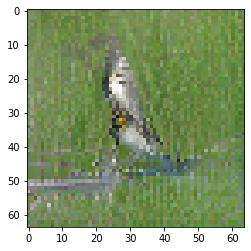

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 47

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.073001861572266 sec
Gen loss: 4.383737018114829, Gen valid loss: 1.281941053828573, Gen attr loss: 1.5633766644692357, Gen caption loss: 1.5384193038552758, Disc valid loss: 1.0990373353324931, Disc valid real loss: 0.5580809036406075, Disc valid fake loss: 0.5409564292689326, Disc attr loss: 2.9550107052009604, Disc attr real loss: 1.3916340407317247, Disc attr fake loss: 1.5633766644692357
Time for epoch 2 is 39.12295317649841 sec
Gen loss: 4.390471517878173, Gen valid loss: 1.2792387793703777, Gen attr loss: 1.5712328134836544, Gen caption loss: 1.5399999292239264, Disc valid loss: 1.0935269704033044, Disc valid real loss: 0.5527742357273412, Disc valid fake loss: 0.54075273225301, Disc attr loss: 2.962982154474026, Disc attr real loss: 1.3917493409903714, Disc attr fake loss: 1.5712328134836544
Time for epoch 3 is 39.132389545440674 sec
Gen los

Time for epoch 21 is 39.120495080947876 sec
Gen loss: 4.404866721895006, Gen valid loss: 1.2795004048321628, Gen attr loss: 1.5761506257018423, Gen caption loss: 1.5492156960453767, Disc valid loss: 1.0938072694026357, Disc valid real loss: 0.5546343492944712, Disc valid fake loss: 0.5391729168775605, Disc attr loss: 2.968114747910642, Disc attr real loss: 1.3919641222087995, Disc attr fake loss: 1.5761506257018423
Time for epoch 22 is 39.1296443939209 sec
Gen loss: 4.393267147586275, Gen valid loss: 1.2792373651734537, Gen attr loss: 1.5687994016864435, Gen caption loss: 1.5452303989792904, Disc valid loss: 1.0994276044168447, Disc valid real loss: 0.5549426556925786, Disc valid fake loss: 0.5444849491280915, Disc attr loss: 2.9604835429488805, Disc attr real loss: 1.391684141262437, Disc attr fake loss: 1.5687994016864435
Time for epoch 23 is 39.08902335166931 sec
Gen loss: 4.363540140270864, Gen valid loss: 1.2577513646950245, Gen attr loss: 1.5683049470751589, Gen caption loss: 1.5

Time for epoch 41 is 39.106305837631226 sec
Gen loss: 4.385927303050591, Gen valid loss: 1.2767043368926216, Gen attr loss: 1.568964639330298, Gen caption loss: 1.5402583281199138, Disc valid loss: 1.097868104937277, Disc valid real loss: 0.5562740385047789, Disc valid fake loss: 0.5415940655440818, Disc attr loss: 2.960635959940551, Disc attr real loss: 1.3916713206102531, Disc attr fake loss: 1.568964639330298
Time for epoch 42 is 39.08114457130432 sec
Gen loss: 4.412341497131803, Gen valid loss: 1.3029683262998173, Gen attr loss: 1.5680313972922844, Gen caption loss: 1.5413417803239693, Disc valid loss: 1.0835776505108448, Disc valid real loss: 0.5470325748125712, Disc valid fake loss: 0.536545077555871, Disc attr loss: 2.9598615880258037, Disc attr real loss: 1.3918301907335193, Disc attr fake loss: 1.5680313972922844
Time for epoch 43 is 39.14336276054382 sec
Gen loss: 4.406947957144843, Gen valid loss: 1.287170629998856, Gen attr loss: 1.5735212086338983, Gen caption loss: 1.5462

Time for epoch 61 is 39.0751416683197 sec
Gen loss: 4.405099355754491, Gen valid loss: 1.2738648737026101, Gen attr loss: 1.5798011391466549, Gen caption loss: 1.5514333626119101, Disc valid loss: 1.101362191887729, Disc valid real loss: 0.5527989634976478, Disc valid fake loss: 0.5485632255633026, Disc attr loss: 2.9709916518632635, Disc attr real loss: 1.3911905127166087, Disc attr fake loss: 1.5798011391466549
Time for epoch 62 is 39.16935849189758 sec
Gen loss: 4.415800055837243, Gen valid loss: 1.2869623529555674, Gen attr loss: 1.5793334455671026, Gen caption loss: 1.5495042565069224, Disc valid loss: 1.0907808232113598, Disc valid real loss: 0.5516367298639241, Disc valid fake loss: 0.5391440915706035, Disc attr loss: 2.9706876701132714, Disc attr real loss: 1.391354224546169, Disc attr fake loss: 1.5793334455671026
Time for epoch 63 is 39.09597373008728 sec
Gen loss: 4.424046178497273, Gen valid loss: 1.2967647465910046, Gen attr loss: 1.5771366916697847, Gen caption loss: 1.55

Time for epoch 81 is 39.115604639053345 sec
Gen loss: 4.398276912487619, Gen valid loss: 1.289874305893089, Gen attr loss: 1.5679513293553173, Gen caption loss: 1.5404512743316692, Disc valid loss: 1.0948437158331314, Disc valid real loss: 0.5497919362250382, Disc valid fake loss: 0.5450517758121335, Disc attr loss: 2.9588801857578724, Disc attr real loss: 1.3909288564025548, Disc attr fake loss: 1.5679513293553173
Time for epoch 82 is 39.08985471725464 sec
Gen loss: 4.393687680484803, Gen valid loss: 1.2738540308262274, Gen attr loss: 1.5733981720477261, Gen caption loss: 1.5464354850412385, Disc valid loss: 1.0967994875055018, Disc valid real loss: 0.5523837917057802, Disc valid fake loss: 0.5444156957189565, Disc attr loss: 2.9643446898395776, Disc attr real loss: 1.3909465177918514, Disc attr fake loss: 1.5733981720477261
Time for epoch 83 is 39.1559202671051 sec
Gen loss: 4.399453002262891, Gen valid loss: 1.2837044448064272, Gen attr loss: 1.571530736881866, Gen caption loss: 1.5

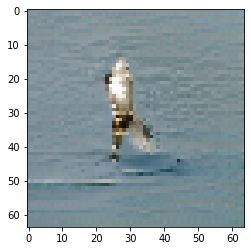

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 48

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.807355642318726 sec
Gen loss: 4.385938196647458, Gen valid loss: 1.278112692561576, Gen attr loss: 1.5680687511516458, Gen caption loss: 1.5397567516419945, Disc valid loss: 1.0999022699630034, Disc valid real loss: 0.5525271617138612, Disc valid fake loss: 0.5473751084914376, Disc attr loss: 2.958924491554095, Disc attr real loss: 1.390855740402449, Disc attr fake loss: 1.5680687511516458
Time for epoch 2 is 39.081557512283325 sec
Gen loss: 4.40619027194615, Gen valid loss: 1.2938624840118698, Gen attr loss: 1.5682543580771138, Gen caption loss: 1.5440734405181595, Disc valid loss: 1.0855409091081076, Disc valid real loss: 0.5508105149921686, Disc valid fake loss: 0.534730394115939, Disc attr loss: 2.9590886582527056, Disc attr real loss: 1.3908343001755918, Disc attr fake loss: 1.5682543580771138
Time for epoch 3 is 39.09044098854065 sec
Gen loss

Time for epoch 21 is 38.96842050552368 sec
Gen loss: 4.392312363234316, Gen valid loss: 1.2723524744917707, Gen attr loss: 1.5722997417941003, Gen caption loss: 1.5476601511482302, Disc valid loss: 1.0980368240415888, Disc valid real loss: 0.5545926356541755, Disc valid fake loss: 0.5434441879028227, Disc attr loss: 2.9632064488522083, Disc attr real loss: 1.390906707058108, Disc attr fake loss: 1.5722997417941003
Time for epoch 22 is 38.978885889053345 sec
Gen loss: 4.402616249513497, Gen valid loss: 1.278710563654499, Gen attr loss: 1.5759741219724743, Gen caption loss: 1.5479315606559194, Disc valid loss: 1.0989863127873842, Disc valid real loss: 0.5571456810807794, Disc valid fake loss: 0.5418406344526182, Disc attr loss: 2.9664953762922828, Disc attr real loss: 1.3905212543198087, Disc attr fake loss: 1.5759741219724743
Time for epoch 23 is 38.996439933776855 sec
Gen loss: 4.396893652474008, Gen valid loss: 1.274778012014663, Gen attr loss: 1.5746030242139408, Gen caption loss: 1.

Time for epoch 41 is 38.83655667304993 sec
Gen loss: 4.401538467665675, Gen valid loss: 1.28496708650253, Gen attr loss: 1.5720876455307007, Gen caption loss: 1.5444837391861086, Disc valid loss: 1.0935230856019307, Disc valid real loss: 0.5523537743059277, Disc valid fake loss: 0.541169312103654, Disc attr loss: 2.9626233852329618, Disc attr real loss: 1.3905357397022609, Disc attr fake loss: 1.5720876455307007
Time for epoch 42 is 38.78478026390076 sec
Gen loss: 4.421142207897775, Gen valid loss: 1.2886440584330054, Gen attr loss: 1.580088144072349, Gen caption loss: 1.5524099978005015, Disc valid loss: 1.0943635340305524, Disc valid real loss: 0.557658826432577, Disc valid fake loss: 0.5367047075979755, Disc attr loss: 2.9707271296803546, Disc attr real loss: 1.3906389856080053, Disc attr fake loss: 1.580088144072349
Time for epoch 43 is 38.65727949142456 sec
Gen loss: 4.38989796677256, Gen valid loss: 1.2855711858770065, Gen attr loss: 1.5660629495372618, Gen caption loss: 1.538263

Time for epoch 61 is 38.8424928188324 sec
Gen loss: 4.417829540040758, Gen valid loss: 1.2978321843677096, Gen attr loss: 1.5743722621664444, Gen caption loss: 1.5456250964141474, Disc valid loss: 1.088662229094725, Disc valid real loss: 0.5512472091490014, Disc valid fake loss: 0.5374150196226631, Disc attr loss: 2.9644946060206507, Disc attr real loss: 1.3901223438542063, Disc attr fake loss: 1.5743722621664444
Time for epoch 62 is 39.144914627075195 sec
Gen loss: 4.40349366154451, Gen valid loss: 1.2909738810727913, Gen attr loss: 1.5711988614503607, Gen caption loss: 1.5413209241903247, Disc valid loss: 1.0956525238871897, Disc valid real loss: 0.5533742902240133, Disc valid fake loss: 0.5422782302710422, Disc attr loss: 2.9615602008695525, Disc attr real loss: 1.3903613394191918, Disc attr fake loss: 1.5711988614503607
Time for epoch 63 is 38.73467445373535 sec
Gen loss: 4.400968072214101, Gen valid loss: 1.2868412975373307, Gen attr loss: 1.5718428885064475, Gen caption loss: 1.5

Time for epoch 81 is 38.73650097846985 sec
Gen loss: 4.391969511502481, Gen valid loss: 1.280028058099876, Gen attr loss: 1.5700613605943798, Gen caption loss: 1.5418800984617818, Disc valid loss: 1.0992308741985621, Disc valid real loss: 0.5556951863817406, Disc valid fake loss: 0.5435356861207543, Disc attr loss: 2.959936961895082, Disc attr real loss: 1.389875601300702, Disc attr fake loss: 1.5700613605943798
Time for epoch 82 is 38.586227893829346 sec
Gen loss: 4.402296394513551, Gen valid loss: 1.2814503221653988, Gen attr loss: 1.5743455641314912, Gen caption loss: 1.5465005177469435, Disc valid loss: 1.095477596208009, Disc valid real loss: 0.5543141384434894, Disc valid fake loss: 0.5411634571991639, Disc attr loss: 2.9641358878231308, Disc attr real loss: 1.3897903236916396, Disc attr fake loss: 1.5743455641314912
Time for epoch 83 is 38.51587724685669 sec
Gen loss: 4.386200463545678, Gen valid loss: 1.2729660069070212, Gen attr loss: 1.5698025300896912, Gen caption loss: 1.54

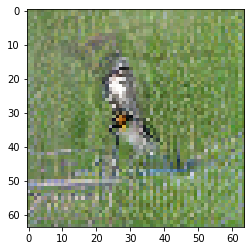

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 49

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.48855710029602 sec
Gen loss: 4.397073511185685, Gen valid loss: 1.2919148828602096, Gen attr loss: 1.56865409266981, Gen caption loss: 1.5365045277406852, Disc valid loss: 1.0972807723978348, Disc valid real loss: 0.5555928314765941, Disc valid fake loss: 0.5416879384175226, Disc attr loss: 2.957865012693534, Disc attr real loss: 1.3892109200237244, Disc attr fake loss: 1.56865409266981
Time for epoch 2 is 38.64779257774353 sec
Gen loss: 4.402515336426939, Gen valid loss: 1.2914307897653037, Gen attr loss: 1.569251601935079, Gen caption loss: 1.5418329297042475, Disc valid loss: 1.0863002533835124, Disc valid real loss: 0.5516948207284054, Disc valid fake loss: 0.5346054346742346, Disc attr loss: 2.958311762913133, Disc attr real loss: 1.3890601609780537, Disc attr fake loss: 1.569251601935079
Time for epoch 3 is 38.68191432952881 sec
Gen loss: 4.4

Time for epoch 21 is 38.51367211341858 sec
Gen loss: 4.416584929799646, Gen valid loss: 1.3057293434776265, Gen attr loss: 1.5692787225330425, Gen caption loss: 1.5415768652427486, Disc valid loss: 1.0911554393729543, Disc valid real loss: 0.5491963238089388, Disc valid fake loss: 0.5419591153217201, Disc attr loss: 2.9585620013032825, Disc attr real loss: 1.38928327877024, Disc attr fake loss: 1.5692787225330425
Time for epoch 22 is 38.47318911552429 sec
Gen loss: 4.396753468164584, Gen valid loss: 1.286331234585625, Gen attr loss: 1.567833568022503, Gen caption loss: 1.5425886503726163, Disc valid loss: 1.0917478161775647, Disc valid real loss: 0.5476981779424156, Disc valid fake loss: 0.5440496359737261, Disc attr loss: 2.9576046825424442, Disc attr real loss: 1.3897711145199412, Disc attr fake loss: 1.567833568022503
Time for epoch 23 is 38.35852289199829 sec
Gen loss: 4.418817304983372, Gen valid loss: 1.3015526872340257, Gen attr loss: 1.572978507212507, Gen caption loss: 1.54428

Time for epoch 41 is 38.439658403396606 sec
Gen loss: 4.382806225520809, Gen valid loss: 1.2717780680837347, Gen attr loss: 1.5672333844631992, Gen caption loss: 1.5437947634435927, Disc valid loss: 1.0989181375115868, Disc valid real loss: 0.5535906904596624, Disc valid fake loss: 0.5453274468903943, Disc attr loss: 2.955941453858766, Disc attr real loss: 1.3887080693955667, Disc attr fake loss: 1.5672333844631992
Time for epoch 42 is 38.37227416038513 sec
Gen loss: 4.404143426476455, Gen valid loss: 1.2963024839799255, Gen attr loss: 1.5664460678410723, Gen caption loss: 1.5413948749785178, Disc valid loss: 1.0884436859994078, Disc valid real loss: 0.5545224901137313, Disc valid fake loss: 0.5339211970971529, Disc attr loss: 2.9552616979371567, Disc attr real loss: 1.388815630096084, Disc attr fake loss: 1.5664460678410723
Time for epoch 43 is 38.376951694488525 sec
Gen loss: 4.39410191564379, Gen valid loss: 1.2879599702713613, Gen attr loss: 1.5664652734591062, Gen caption loss: 1.

Time for epoch 61 is 38.368303298950195 sec
Gen loss: 4.395327224964049, Gen valid loss: 1.280438949745199, Gen attr loss: 1.5709167240757929, Gen caption loss: 1.5439715689113793, Disc valid loss: 1.1011996433986881, Disc valid real loss: 0.5575353849709519, Disc valid fake loss: 0.543664260608394, Disc attr loss: 2.959427229111111, Disc attr real loss: 1.3885105050353177, Disc attr fake loss: 1.5709167240757929
Time for epoch 62 is 38.399455308914185 sec
Gen loss: 4.397121108967437, Gen valid loss: 1.2831492816529624, Gen attr loss: 1.5708197274505284, Gen caption loss: 1.5431521200552218, Disc valid loss: 1.0883261290022996, Disc valid real loss: 0.5508018223250785, Disc valid fake loss: 0.5375243069195166, Disc attr loss: 2.959337564987865, Disc attr real loss: 1.3885178375373364, Disc attr fake loss: 1.5708197274505284
Time for epoch 63 is 38.053438663482666 sec
Gen loss: 4.402621080558798, Gen valid loss: 1.289789923969, Gen attr loss: 1.5708012290117217, Gen caption loss: 1.5420

Time for epoch 81 is 39.06347417831421 sec
Gen loss: 4.399170681066953, Gen valid loss: 1.2902113982655492, Gen attr loss: 1.5689919363192426, Gen caption loss: 1.5399673482589928, Disc valid loss: 1.093680621485723, Disc valid real loss: 0.5506840427393512, Disc valid fake loss: 0.5429965786656067, Disc attr loss: 2.957262977998108, Disc attr real loss: 1.3882710416788655, Disc attr fake loss: 1.5689919363192426
Time for epoch 82 is 39.038474798202515 sec
Gen loss: 4.395123839701418, Gen valid loss: 1.2731934083186514, Gen attr loss: 1.5741982052965862, Gen caption loss: 1.5477322236632267, Disc valid loss: 1.098451659285279, Disc valid real loss: 0.5542790024745755, Disc valid fake loss: 0.5441726558415224, Disc attr loss: 2.9626663041308645, Disc attr real loss: 1.3884680988342781, Disc attr fake loss: 1.5741982052965862
Time for epoch 83 is 39.049712896347046 sec
Gen loss: 4.403633175826654, Gen valid loss: 1.2866881412219227, Gen attr loss: 1.5731517441550567, Gen caption loss: 1.

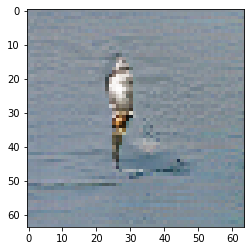

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 50

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.937042236328125 sec
Gen loss: 4.376499902911302, Gen valid loss: 1.2746066946970416, Gen attr loss: 1.5646480674019998, Gen caption loss: 1.5372451456581675, Disc valid loss: 1.1055479476122352, Disc valid real loss: 0.5591862032891612, Disc valid fake loss: 0.5463617438384833, Disc attr loss: 2.9522041450671064, Disc attr real loss: 1.3875560776651068, Disc attr fake loss: 1.5646480674019998
Time for epoch 2 is 39.07618808746338 sec
Gen loss: 4.384213852688549, Gen valid loss: 1.2773060168677228, Gen attr loss: 1.5660561546077574, Gen caption loss: 1.5408516831514312, Disc valid loss: 1.0958777772701853, Disc valid real loss: 0.5537539734265345, Disc valid fake loss: 0.5421238061050736, Disc attr loss: 2.9535413020994605, Disc attr real loss: 1.3874851474917032, Disc attr fake loss: 1.5660561546077574
Time for epoch 3 is 39.1540789604187 sec
Gen l

Time for epoch 21 is 39.12307786941528 sec
Gen loss: 4.410060535601484, Gen valid loss: 1.2960980371408024, Gen attr loss: 1.570443078754394, Gen caption loss: 1.543519416798744, Disc valid loss: 1.0937833823162688, Disc valid real loss: 0.5501810300156353, Disc valid fake loss: 0.5436023531890497, Disc attr loss: 2.957865476285216, Disc attr real loss: 1.387422397530822, Disc attr fake loss: 1.570443078754394
Time for epoch 22 is 39.11064147949219 sec
Gen loss: 4.390440865906919, Gen valid loss: 1.2795385220832618, Gen attr loss: 1.5686701503872549, Gen caption loss: 1.542232203935866, Disc valid loss: 1.0964598398867662, Disc valid real loss: 0.5513154213344501, Disc valid fake loss: 0.5451444168562488, Disc attr loss: 2.9558283410421233, Disc attr real loss: 1.3871581906548685, Disc attr fake loss: 1.5686701503872549
Time for epoch 23 is 39.14297652244568 sec
Gen loss: 4.395603397674353, Gen valid loss: 1.2837623325466787, Gen attr loss: 1.5697749866056572, Gen caption loss: 1.54206

Time for epoch 41 is 39.14398241043091 sec
Gen loss: 4.396510186880262, Gen valid loss: 1.2851269498750124, Gen attr loss: 1.5703953178271368, Gen caption loss: 1.5409879206318842, Disc valid loss: 1.094974499730883, Disc valid real loss: 0.5543745916871844, Disc valid fake loss: 0.5405999107089469, Disc attr loss: 2.957407969123303, Disc attr real loss: 1.3870126512961658, Disc attr fake loss: 1.5703953178271368
Time for epoch 42 is 39.111226320266724 sec
Gen loss: 4.377710674513323, Gen valid loss: 1.2783742018831454, Gen attr loss: 1.5636753470593998, Gen caption loss: 1.5356611246015968, Disc valid loss: 1.0950650563084983, Disc valid real loss: 0.5519378223231814, Disc valid fake loss: 0.5431272381043369, Disc attr loss: 2.9507327851887317, Disc attr real loss: 1.387057438129332, Disc attr fake loss: 1.5636753470593998
Time for epoch 43 is 39.173038959503174 sec
Gen loss: 4.380085810090145, Gen valid loss: 1.2731841348697177, Gen attr loss: 1.568114035497836, Gen caption loss: 1.5

Time for epoch 61 is 39.15322780609131 sec
Gen loss: 4.420128381672267, Gen valid loss: 1.3066815221858865, Gen attr loss: 1.5704292462770209, Gen caption loss: 1.5430176157938433, Disc valid loss: 1.0902175148974267, Disc valid real loss: 0.5499360358650446, Disc valid fake loss: 0.5402814767709593, Disc attr loss: 2.9572036424626504, Disc attr real loss: 1.3867743961856294, Disc attr fake loss: 1.5704292462770209
Time for epoch 62 is 39.1341986656189 sec
Gen loss: 4.398270549489877, Gen valid loss: 1.2914552913125614, Gen attr loss: 1.5669430290780417, Gen caption loss: 1.5398722137539045, Disc valid loss: 1.0885843634605408, Disc valid real loss: 0.5515885407200997, Disc valid fake loss: 0.5369958238711525, Disc attr loss: 2.9537563365972463, Disc attr real loss: 1.3868133075192046, Disc attr fake loss: 1.5669430290780417
Time for epoch 63 is 39.11234450340271 sec
Gen loss: 4.397453503233954, Gen valid loss: 1.28263980327906, Gen attr loss: 1.5714186756268427, Gen caption loss: 1.54

Time for epoch 81 is 39.10100483894348 sec
Gen loss: 4.401839196843507, Gen valid loss: 1.2847760986829515, Gen attr loss: 1.5727678156157496, Gen caption loss: 1.5442952576691542, Disc valid loss: 1.1005965846017771, Disc valid real loss: 0.5579340504760019, Disc valid fake loss: 0.5426625352564866, Disc attr loss: 2.9594316531003004, Disc attr real loss: 1.386663837484551, Disc attr fake loss: 1.5727678156157496
Time for epoch 82 is 39.14280581474304 sec
Gen loss: 4.408271153767903, Gen valid loss: 1.2916615199913501, Gen attr loss: 1.5729156758404037, Gen caption loss: 1.5436939450137337, Disc valid loss: 1.0872736750902523, Disc valid real loss: 0.5472294094601298, Disc valid fake loss: 0.540044266841599, Disc attr loss: 2.9594928562479614, Disc attr real loss: 1.3865771804075577, Disc attr fake loss: 1.5729156758404037
Time for epoch 83 is 39.11975455284119 sec
Gen loss: 4.391324194466195, Gen valid loss: 1.271404487169209, Gen attr loss: 1.5732352878989242, Gen caption loss: 1.54

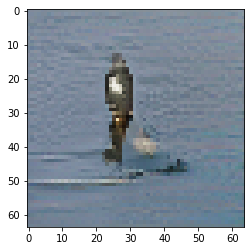

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 51

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.00230026245117 sec
Gen loss: 4.398253448610383, Gen valid loss: 1.284451760573762, Gen attr loss: 1.5699238560710174, Gen caption loss: 1.543877803213228, Disc valid loss: 1.1000588113053382, Disc valid real loss: 0.5550593490684582, Disc valid fake loss: 0.544999461429229, Disc attr loss: 2.9566217147237888, Disc attr real loss: 1.3866978586527714, Disc attr fake loss: 1.5699238560710174
Time for epoch 2 is 39.11079668998718 sec
Gen loss: 4.381670444638425, Gen valid loss: 1.2689084879105008, Gen attr loss: 1.5685944279357993, Gen caption loss: 1.5441675192618434, Disc valid loss: 1.0961174722609481, Disc valid real loss: 0.5539122433035677, Disc valid fake loss: 0.542205230249622, Disc attr loss: 2.95529976317553, Disc attr real loss: 1.386705335239731, Disc attr fake loss: 1.5685944279357993
Time for epoch 3 is 39.08659100532532 sec
Gen loss: 4.

Time for epoch 21 is 39.074708461761475 sec
Gen loss: 4.396733350547025, Gen valid loss: 1.2783374965675478, Gen attr loss: 1.571904672516717, Gen caption loss: 1.5464911874393783, Disc valid loss: 1.1021496819932932, Disc valid real loss: 0.5564526535954256, Disc valid fake loss: 0.5456970274286864, Disc attr loss: 2.9575648701933988, Disc attr real loss: 1.3856601976766818, Disc attr fake loss: 1.571904672516717
Time for epoch 22 is 39.15319347381592 sec
Gen loss: 4.400586666453498, Gen valid loss: 1.2873020500025452, Gen attr loss: 1.569679997477751, Gen caption loss: 1.5436046146118867, Disc valid loss: 1.0926773449592797, Disc valid real loss: 0.554627413429865, Disc valid fake loss: 0.5380499321755355, Disc attr loss: 2.955316393356013, Disc attr real loss: 1.385636395878262, Disc attr fake loss: 1.569679997477751
Time for epoch 23 is 39.069544553756714 sec
Gen loss: 4.385727341582135, Gen valid loss: 1.2661113680862799, Gen attr loss: 1.571631064259909, Gen caption loss: 1.54798

Time for epoch 41 is 39.1898353099823 sec
Gen loss: 4.395685157155603, Gen valid loss: 1.2868347907777078, Gen attr loss: 1.567398578816959, Gen caption loss: 1.54145179079154, Disc valid loss: 1.100751310183104, Disc valid real loss: 0.5572744639423804, Disc valid fake loss: 0.5434768439793005, Disc attr loss: 2.9527801704923635, Disc attr real loss: 1.3853815916754042, Disc attr fake loss: 1.567398578816959
Time for epoch 42 is 39.16763782501221 sec
Gen loss: 4.4040837707881355, Gen valid loss: 1.3007946552299872, Gen attr loss: 1.5653240916528677, Gen caption loss: 1.5379650195439656, Disc valid loss: 1.0831227896982416, Disc valid real loss: 0.5468002229040554, Disc valid fake loss: 0.5363225625944008, Disc attr loss: 2.9505261819214033, Disc attr real loss: 1.3852020902685356, Disc attr fake loss: 1.5653240916528677
Time for epoch 43 is 39.1569550037384 sec
Gen loss: 4.388679948925649, Gen valid loss: 1.2906092956137205, Gen attr loss: 1.563411270053729, Gen caption loss: 1.534659

Time for epoch 61 is 39.06636571884155 sec
Gen loss: 4.404790721288541, Gen valid loss: 1.2903759891424722, Gen attr loss: 1.5708446095629436, Gen caption loss: 1.5435701198371121, Disc valid loss: 1.0911082074571108, Disc valid real loss: 0.5528235128578455, Disc valid fake loss: 0.5382846949223258, Disc attr loss: 2.9556090780066926, Disc attr real loss: 1.384764468443749, Disc attr fake loss: 1.5708446095629436
Time for epoch 62 is 39.16000032424927 sec
Gen loss: 4.390357310855938, Gen valid loss: 1.289755602516133, Gen attr loss: 1.5652498514025515, Gen caption loss: 1.5353518721210924, Disc valid loss: 1.09074940897908, Disc valid real loss: 0.549123054678201, Disc valid fake loss: 0.5416263523625164, Disc attr loss: 2.949785431872215, Disc attr real loss: 1.384535580469664, Disc attr fake loss: 1.5652498514025515
Time for epoch 63 is 39.08577609062195 sec
Gen loss: 4.411759249240079, Gen valid loss: 1.292956503103096, Gen attr loss: 1.5737931079011622, Gen caption loss: 1.5450096

Time for epoch 81 is 39.109058141708374 sec
Gen loss: 4.381021974532585, Gen valid loss: 1.2745397950252544, Gen attr loss: 1.5659012296981605, Gen caption loss: 1.540580945932445, Disc valid loss: 1.1026445544832122, Disc valid real loss: 0.5584573961370359, Disc valid fake loss: 0.54418715745776, Disc attr loss: 2.950656564255071, Disc attr real loss: 1.3847553345569104, Disc attr fake loss: 1.5659012296981605
Time for epoch 82 is 39.08823490142822 sec
Gen loss: 4.410453448127602, Gen valid loss: 1.2978271657858438, Gen attr loss: 1.568940490888063, Gen caption loss: 1.54368578741544, Disc valid loss: 1.0871626030461898, Disc valid real loss: 0.549616181591985, Disc valid fake loss: 0.5375464187889565, Disc attr loss: 2.9535659012109607, Disc attr real loss: 1.3846254103228974, Disc attr fake loss: 1.568940490888063
Time for epoch 83 is 39.056095361709595 sec
Gen loss: 4.378412770061958, Gen valid loss: 1.2719770296802366, Gen attr loss: 1.5656237033647573, Gen caption loss: 1.540812

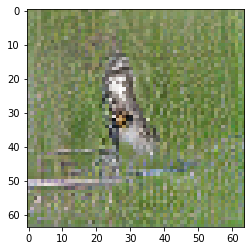

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 52

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.934565782547 sec
Gen loss: 4.391559306845109, Gen valid loss: 1.2781179676534038, Gen attr loss: 1.5703436843748015, Gen caption loss: 1.5430976433482597, Disc valid loss: 1.1034092324859082, Disc valid real loss: 0.5576924932842978, Disc valid fake loss: 0.5457167411399727, Disc attr loss: 2.9547737930525284, Disc attr real loss: 1.384430108677727, Disc attr fake loss: 1.5703436843748015
Time for epoch 2 is 39.16056966781616 sec
Gen loss: 4.394455297852597, Gen valid loss: 1.2866596891304989, Gen attr loss: 1.568129124034065, Gen caption loss: 1.5396664908261803, Disc valid loss: 1.090842690732744, Disc valid real loss: 0.553908493137618, Disc valid fake loss: 0.5369341978374212, Disc attr loss: 2.9524104084748886, Disc attr real loss: 1.3842812844408237, Disc attr fake loss: 1.568129124034065
Time for epoch 3 is 39.13515496253967 sec
Gen loss: 4.

Time for epoch 21 is 39.08688497543335 sec
Gen loss: 4.3981826034018665, Gen valid loss: 1.2818876110764377, Gen attr loss: 1.570615965176404, Gen caption loss: 1.5456790174572126, Disc valid loss: 1.0993634964715497, Disc valid real loss: 0.5546443338801221, Disc valid fake loss: 0.5447191635606089, Disc attr loss: 2.954876753372875, Disc attr real loss: 1.3842607881964706, Disc attr fake loss: 1.570615965176404
Time for epoch 22 is 39.07797312736511 sec
Gen loss: 4.403960618869399, Gen valid loss: 1.2874020174912968, Gen attr loss: 1.571998622359299, Gen caption loss: 1.5445599992100785, Disc valid loss: 1.0922882271006824, Disc valid real loss: 0.5513713338026186, Disc valid fake loss: 0.5409168945095404, Disc attr loss: 2.956486622169412, Disc attr real loss: 1.384487999810113, Disc attr fake loss: 1.571998622359299
Time for epoch 23 is 39.11680865287781 sec
Gen loss: 4.391146240518668, Gen valid loss: 1.2820236093306605, Gen attr loss: 1.5679113587066733, Gen caption loss: 1.54121

Time for epoch 41 is 39.063281774520874 sec
Gen loss: 4.395912419812789, Gen valid loss: 1.2835830022002945, Gen attr loss: 1.5714371701889245, Gen caption loss: 1.540892249846523, Disc valid loss: 1.0989503312886246, Disc valid real loss: 0.5530741721957033, Disc valid fake loss: 0.5458761592544514, Disc attr loss: 2.955486261747717, Disc attr real loss: 1.3840490915587924, Disc attr fake loss: 1.5714371701889245
Time for epoch 42 is 39.117308378219604 sec
Gen loss: 4.378487321419445, Gen valid loss: 1.2695601261082057, Gen attr loss: 1.56922501083312, Gen caption loss: 1.5397021789860919, Disc valid loss: 1.0976643907991528, Disc valid real loss: 0.5539022176084802, Disc valid fake loss: 0.543762172706082, Disc attr loss: 2.95316197846317, Disc attr real loss: 1.3839369676300504, Disc attr fake loss: 1.56922501083312
Time for epoch 43 is 39.08274221420288 sec
Gen loss: 4.401505602084525, Gen valid loss: 1.297255954445216, Gen attr loss: 1.5657544090818907, Gen caption loss: 1.5384952

Time for epoch 61 is 39.1040723323822 sec
Gen loss: 4.400445127874855, Gen valid loss: 1.2931169058249248, Gen attr loss: 1.566658317235104, Gen caption loss: 1.5406698941538328, Disc valid loss: 1.096091314867583, Disc valid real loss: 0.5527004610070692, Disc valid fake loss: 0.5433908543451046, Disc attr loss: 2.9501607204840434, Disc attr real loss: 1.3835024032489394, Disc attr fake loss: 1.566658317235104
Time for epoch 62 is 39.096489667892456 sec
Gen loss: 4.393125667804625, Gen valid loss: 1.2815431366121866, Gen attr loss: 1.5683543775785906, Gen caption loss: 1.5432281571675122, Disc valid loss: 1.0936956221495218, Disc valid real loss: 0.556527374721155, Disc valid fake loss: 0.5371682480744876, Disc attr loss: 2.9515403509140015, Disc attr real loss: 1.3831859733354108, Disc attr fake loss: 1.5683543775785906
Time for epoch 63 is 39.126548767089844 sec
Gen loss: 4.402403932922901, Gen valid loss: 1.2856488271457394, Gen attr loss: 1.570002451498657, Gen caption loss: 1.546

Time for epoch 81 is 39.08964538574219 sec
Gen loss: 4.393781749859735, Gen valid loss: 1.2741968481521295, Gen attr loss: 1.5753152215383885, Gen caption loss: 1.5442696719311764, Disc valid loss: 1.0988909392175958, Disc valid real loss: 0.5564583518156191, Disc valid fake loss: 0.5424325906325808, Disc attr loss: 2.958958223260192, Disc attr real loss: 1.3836430017218033, Disc attr fake loss: 1.5753152215383885
Time for epoch 82 is 39.14547109603882 sec
Gen loss: 4.381367961888714, Gen valid loss: 1.2821291935476185, Gen attr loss: 1.56289520205521, Gen caption loss: 1.536343565155174, Disc valid loss: 1.093628540271666, Disc valid real loss: 0.550522087712275, Disc valid fake loss: 0.5431064526401561, Disc attr loss: 2.9463192983694517, Disc attr real loss: 1.3834240963142417, Disc attr fake loss: 1.56289520205521
Time for epoch 83 is 39.10304236412048 sec
Gen loss: 4.399811618050262, Gen valid loss: 1.2878964985935346, Gen attr loss: 1.56900494305422, Gen caption loss: 1.542910181

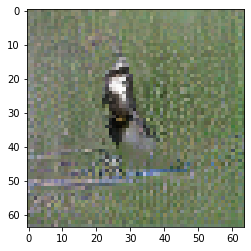

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 53

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.302921295166016 sec
Gen loss: 4.418858906764002, Gen valid loss: 1.2920273836389145, Gen attr loss: 1.5770717688046174, Gen caption loss: 1.5497597543204702, Disc valid loss: 1.0945150004169806, Disc valid real loss: 0.5564445438908368, Disc valid fake loss: 0.5380704579799156, Disc attr loss: 2.960195168570128, Disc attr real loss: 1.3831233997655108, Disc attr fake loss: 1.5770717688046174
Time for epoch 2 is 39.10397815704346 sec
Gen loss: 4.423225890007123, Gen valid loss: 1.3043607940195698, Gen attr loss: 1.5729679983805835, Gen caption loss: 1.5458971009991034, Disc valid loss: 1.084964658348218, Disc valid real loss: 0.5458341983921806, Disc valid fake loss: 0.5391304591483863, Disc attr loss: 2.95604953791714, Disc attr real loss: 1.3830815395365563, Disc attr fake loss: 1.5729679983805835
Time for epoch 3 is 39.15423393249512 sec
Gen loss

Time for epoch 21 is 39.088701009750366 sec
Gen loss: 4.412957441516038, Gen valid loss: 1.2889280866801254, Gen attr loss: 1.575001547330117, Gen caption loss: 1.5490278134824138, Disc valid loss: 1.0992728675284036, Disc valid real loss: 0.5560436671988428, Disc valid fake loss: 0.5432292002487958, Disc attr loss: 2.9584520050503698, Disc attr real loss: 1.3834504577202527, Disc attr fake loss: 1.575001547330117
Time for epoch 22 is 39.13497018814087 sec
Gen loss: 4.4014119533342395, Gen valid loss: 1.282953997614584, Gen attr loss: 1.573913611693757, Gen caption loss: 1.5445443453181404, Disc valid loss: 1.0933415198390724, Disc valid real loss: 0.5492633225795053, Disc valid fake loss: 0.5440782006517012, Disc attr loss: 2.956783868433014, Disc attr real loss: 1.3828702567392572, Disc attr fake loss: 1.573913611693757
Time for epoch 23 is 39.10807275772095 sec
Gen loss: 4.436636230809902, Gen valid loss: 1.3005790006177536, Gen attr loss: 1.5811170384812807, Gen caption loss: 1.554

Time for epoch 41 is 39.126474142074585 sec
Gen loss: 4.408841924615669, Gen valid loss: 1.2876376474129798, Gen attr loss: 1.5740874585743518, Gen caption loss: 1.5471168258971961, Disc valid loss: 1.100573620498988, Disc valid real loss: 0.558962429603587, Disc valid fake loss: 0.5416111905723406, Disc attr loss: 2.956433099782887, Disc attr real loss: 1.3823456412085349, Disc attr fake loss: 1.5740874585743518
Time for epoch 42 is 39.140233755111694 sec
Gen loss: 4.417899583413349, Gen valid loss: 1.2999015786460422, Gen attr loss: 1.573097206389678, Gen caption loss: 1.5449008101693338, Disc valid loss: 1.086070692474603, Disc valid real loss: 0.5468778548040364, Disc valid fake loss: 0.5391928362167948, Disc attr loss: 2.9556773275863835, Disc attr real loss: 1.3825801211967055, Disc attr fake loss: 1.573097206389678
Time for epoch 43 is 39.166783809661865 sec
Gen loss: 4.398605486887903, Gen valid loss: 1.2787968866870332, Gen attr loss: 1.5721808041983503, Gen caption loss: 1.54

Time for epoch 61 is 39.10834836959839 sec
Gen loss: 4.390094950270201, Gen valid loss: 1.2764977436401657, Gen attr loss: 1.5705263627576957, Gen caption loss: 1.5430708545333325, Disc valid loss: 1.097722608222548, Disc valid real loss: 0.5547516757072148, Disc valid fake loss: 0.5429709361497626, Disc attr loss: 2.953081603618818, Disc attr real loss: 1.3825552408611226, Disc attr fake loss: 1.5705263627576957
Time for epoch 62 is 39.18344187736511 sec
Gen loss: 4.40422760568014, Gen valid loss: 1.2880934158637918, Gen attr loss: 1.5729786445131793, Gen caption loss: 1.5431555457877595, Disc valid loss: 1.0920956837452525, Disc valid real loss: 0.5526899340029977, Disc valid fake loss: 0.5394057521652077, Disc attr loss: 2.9548027499258356, Disc attr real loss: 1.3818241054126563, Disc attr fake loss: 1.5729786445131793
Time for epoch 63 is 39.13131308555603 sec
Gen loss: 4.402557086815356, Gen valid loss: 1.2833861983242396, Gen attr loss: 1.573344699735564, Gen caption loss: 1.545

Time for epoch 81 is 39.07529592514038 sec
Gen loss: 4.393024786377987, Gen valid loss: 1.2811310801725724, Gen attr loss: 1.569403844474131, Gen caption loss: 1.542489860439042, Disc valid loss: 1.1020493245706326, Disc valid real loss: 0.561763146947716, Disc valid fake loss: 0.5402861775421515, Disc attr loss: 2.9517694740760616, Disc attr real loss: 1.3823656296019309, Disc attr fake loss: 1.569403844474131
Time for epoch 82 is 39.06592631340027 sec
Gen loss: 4.400190195740077, Gen valid loss: 1.290767015803474, Gen attr loss: 1.5685716237479108, Gen caption loss: 1.5408515684649873, Disc valid loss: 1.087496456738087, Disc valid real loss: 0.5471326122439004, Disc valid fake loss: 0.5403638450595422, Disc attr loss: 2.9506065386743727, Disc attr real loss: 1.3820349149264617, Disc attr fake loss: 1.5685716237479108
Time for epoch 83 is 39.15238428115845 sec
Gen loss: 4.408433228650391, Gen valid loss: 1.294850670225252, Gen attr loss: 1.5703115766933617, Gen caption loss: 1.543270

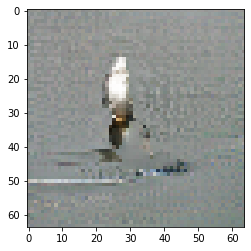

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 54

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.88488507270813 sec
Gen loss: 4.400058846486616, Gen valid loss: 1.28620210588786, Gen attr loss: 1.5722495149467697, Gen caption loss: 1.541607225167396, Disc valid loss: 1.1007035620167327, Disc valid real loss: 0.5539826245165775, Disc valid fake loss: 0.5467209389539269, Disc attr loss: 2.9539927683548552, Disc attr real loss: 1.3817432534080858, Disc attr fake loss: 1.5722495149467697
Time for epoch 2 is 39.077690839767456 sec
Gen loss: 4.392420356512716, Gen valid loss: 1.2759112210131596, Gen attr loss: 1.5717120777946825, Gen caption loss: 1.5447970628738403, Disc valid loss: 1.0976303796458051, Disc valid real loss: 0.5545375478784567, Disc valid fake loss: 0.5430928307981672, Disc attr loss: 2.9534168043110753, Disc attr real loss: 1.3817047265163929, Disc attr fake loss: 1.5717120777946825
Time for epoch 3 is 39.05015754699707 sec
Gen los

Time for epoch 21 is 39.050021171569824 sec
Gen loss: 4.388943391117623, Gen valid loss: 1.2744996271482327, Gen attr loss: 1.5725449200891222, Gen caption loss: 1.5418988382267111, Disc valid loss: 1.1032660341844327, Disc valid real loss: 0.5569670357032197, Disc valid fake loss: 0.5462989995311592, Disc attr loss: 2.9543878705844, Disc attr real loss: 1.381842950495278, Disc attr fake loss: 1.5725449200891222
Time for epoch 22 is 39.091694355010986 sec
Gen loss: 4.385272654091439, Gen valid loss: 1.2747896295898975, Gen attr loss: 1.5682273285821848, Gen caption loss: 1.5422556965654781, Disc valid loss: 1.1006711987945121, Disc valid real loss: 0.5561127033498552, Disc valid fake loss: 0.5445584949600665, Disc attr loss: 2.9499553555072486, Disc attr real loss: 1.3817280269250638, Disc attr fake loss: 1.5682273285821848
Time for epoch 23 is 39.18395137786865 sec
Gen loss: 4.384599504108998, Gen valid loss: 1.2794328648546525, Gen attr loss: 1.5650588148008517, Gen caption loss: 1.5

Time for epoch 41 is 39.18663549423218 sec
Gen loss: 4.392850334405253, Gen valid loss: 1.2834462806138243, Gen attr loss: 1.5686088393374187, Gen caption loss: 1.5407951863477547, Disc valid loss: 1.0979488550162897, Disc valid real loss: 0.5511580641030619, Disc valid fake loss: 0.5467907930131204, Disc attr loss: 2.9502602195352075, Disc attr real loss: 1.3816513801977885, Disc attr fake loss: 1.5686088393374187
Time for epoch 42 is 39.15127873420715 sec
Gen loss: 4.397993734535486, Gen valid loss: 1.2844163857824433, Gen attr loss: 1.571951550196826, Gen caption loss: 1.5416258001715186, Disc valid loss: 1.0921200573605896, Disc valid real loss: 0.5515425953115551, Disc valid fake loss: 0.5405774608375581, Disc attr loss: 2.953751328191783, Disc attr real loss: 1.3817997779949571, Disc attr fake loss: 1.571951550196826
Time for epoch 43 is 39.11593198776245 sec
Gen loss: 4.39267350018509, Gen valid loss: 1.2744978540311984, Gen attr loss: 1.571261461511214, Gen caption loss: 1.5469

Time for epoch 61 is 39.13795566558838 sec
Gen loss: 4.384442614992136, Gen valid loss: 1.2778749351255938, Gen attr loss: 1.566057808353972, Gen caption loss: 1.5405098716741008, Disc valid loss: 1.1012617939209874, Disc valid real loss: 0.5560641412327929, Disc valid fake loss: 0.5451976543034964, Disc attr loss: 2.9471404965977035, Disc attr real loss: 1.3810826882437315, Disc attr fake loss: 1.566057808353972
Time for epoch 62 is 39.145416259765625 sec
Gen loss: 4.390842821539902, Gen valid loss: 1.279813689914176, Gen attr loss: 1.5688463859764865, Gen caption loss: 1.5421827598638973, Disc valid loss: 1.0948781091669388, Disc valid real loss: 0.5553448962648386, Disc valid fake loss: 0.5395332139520465, Disc attr loss: 2.9500256986798954, Disc attr real loss: 1.381179312703409, Disc attr fake loss: 1.5688463859764865
Time for epoch 63 is 39.17826724052429 sec
Gen loss: 4.391475167054794, Gen valid loss: 1.2790836464098798, Gen attr loss: 1.5692330508374264, Gen caption loss: 1.54

Time for epoch 81 is 39.177961587905884 sec
Gen loss: 4.4101825225644, Gen valid loss: 1.2986410119669225, Gen attr loss: 1.5702664910293207, Gen caption loss: 1.5412750185989752, Disc valid loss: 1.0936668135609406, Disc valid real loss: 0.5553444942969293, Disc valid fake loss: 0.5383223207985482, Disc attr loss: 2.951245627429104, Disc attr real loss: 1.3809791363997834, Disc attr fake loss: 1.5702664910293207
Time for epoch 82 is 39.136958837509155 sec
Gen loss: 4.404384681525915, Gen valid loss: 1.2951670707402836, Gen attr loss: 1.5679190956803195, Gen caption loss: 1.5412984979831106, Disc valid loss: 1.0894760192248234, Disc valid real loss: 0.5502018828379106, Disc valid fake loss: 0.539274135013906, Disc attr loss: 2.9487467009200636, Disc attr real loss: 1.3808276052397441, Disc attr fake loss: 1.5679190956803195
Time for epoch 83 is 39.16666007041931 sec
Gen loss: 4.398908493641592, Gen valid loss: 1.2834282761343772, Gen attr loss: 1.5718271871246297, Gen caption loss: 1.5

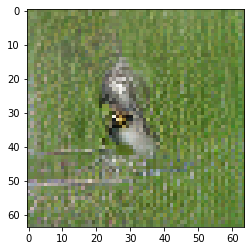

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 55

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.96684217453003 sec
Gen loss: 4.412879512238955, Gen valid loss: 1.2984831585147516, Gen attr loss: 1.5688629550985527, Gen caption loss: 1.5455333811803884, Disc valid loss: 1.0915857472716954, Disc valid real loss: 0.5560127253616406, Disc valid fake loss: 0.5355730238484173, Disc attr loss: 2.9498411410546237, Disc attr real loss: 1.380978185956071, Disc attr fake loss: 1.5688629550985527
Time for epoch 2 is 39.13915824890137 sec
Gen loss: 4.4175899041700495, Gen valid loss: 1.311549817966575, Gen attr loss: 1.565577198496356, Gen caption loss: 1.5404628883532392, Disc valid loss: 1.0821725420835542, Disc valid real loss: 0.545715772847173, Disc valid fake loss: 0.5364567694786765, Disc attr loss: 2.9461314287289047, Disc attr real loss: 1.3805542302325489, Disc attr fake loss: 1.565577198496356
Time for epoch 3 is 39.19577169418335 sec
Gen loss:

Time for epoch 21 is 39.18699502944946 sec
Gen loss: 4.400680124598144, Gen valid loss: 1.2882239883185078, Gen attr loss: 1.569841051489357, Gen caption loss: 1.5426150941590306, Disc valid loss: 1.0937351111151015, Disc valid real loss: 0.5521073687044262, Disc valid fake loss: 0.5416277417645545, Disc attr loss: 2.950089642995095, Disc attr real loss: 1.380248591505738, Disc attr fake loss: 1.569841051489357
Time for epoch 22 is 39.1702299118042 sec
Gen loss: 4.383191989366278, Gen valid loss: 1.2786680035151763, Gen attr loss: 1.5624436844332108, Gen caption loss: 1.5420803064253272, Disc valid loss: 1.0954563751776367, Disc valid real loss: 0.5489089061735768, Disc valid fake loss: 0.5465474673887578, Disc attr loss: 2.942978447691858, Disc attr real loss: 1.380534763258647, Disc attr fake loss: 1.5624436844332108
Time for epoch 23 is 39.17395544052124 sec
Gen loss: 4.404194750436923, Gen valid loss: 1.2866719216512148, Gen attr loss: 1.5713748427910534, Gen caption loss: 1.546147

Time for epoch 41 is 39.14975833892822 sec
Gen loss: 4.3920177741425475, Gen valid loss: 1.2738070114841307, Gen attr loss: 1.572261426506973, Gen caption loss: 1.545949340512759, Disc valid loss: 1.1059421208815845, Disc valid real loss: 0.5582392859426617, Disc valid fake loss: 0.5477028356658088, Disc attr loss: 2.95232952610264, Disc attr real loss: 1.380068099595667, Disc attr fake loss: 1.572261426506973
Time for epoch 42 is 39.14086651802063 sec
Gen loss: 4.385177004305005, Gen valid loss: 1.273858354828222, Gen attr loss: 1.5688502148884098, Gen caption loss: 1.5424684321654198, Disc valid loss: 1.098155438899994, Disc valid real loss: 0.5555511165440568, Disc valid fake loss: 0.5426043220328768, Disc attr loss: 2.94857762984144, Disc attr real loss: 1.3797274149530303, Disc attr fake loss: 1.5688502148884098
Time for epoch 43 is 39.208115100860596 sec
Gen loss: 4.376276942126474, Gen valid loss: 1.2693120124863415, Gen attr loss: 1.5663763775735045, Gen caption loss: 1.5405885

Time for epoch 61 is 39.15628528594971 sec
Gen loss: 4.374094271724463, Gen valid loss: 1.269838435378501, Gen attr loss: 1.565970245092542, Gen caption loss: 1.538285587861286, Disc valid loss: 1.109044535696345, Disc valid real loss: 0.5590729291846113, Disc valid fake loss: 0.5499716085308612, Disc attr loss: 2.9455024546724027, Disc attr real loss: 1.3795322095798606, Disc attr fake loss: 1.565970245092542
Time for epoch 62 is 39.12593126296997 sec
Gen loss: 4.387115436517773, Gen valid loss: 1.2749338597463076, Gen attr loss: 1.5686492719624423, Gen caption loss: 1.5435323004477068, Disc valid loss: 1.0966901519111178, Disc valid real loss: 0.552007972951827, Disc valid fake loss: 0.5446821789592908, Disc attr loss: 2.9481527559802463, Disc attr real loss: 1.3795034840178038, Disc attr fake loss: 1.5686492719624423
Time for epoch 63 is 39.09601926803589 sec
Gen loss: 4.398772586005813, Gen valid loss: 1.288973331289886, Gen attr loss: 1.5683426737462278, Gen caption loss: 1.541456

Time for epoch 81 is 39.12964844703674 sec
Gen loss: 4.409771021142562, Gen valid loss: 1.2911407487179205, Gen attr loss: 1.573781578844479, Gen caption loss: 1.5448486788809137, Disc valid loss: 1.0982258271395675, Disc valid real loss: 0.5541993101760947, Disc valid fake loss: 0.5440265158327614, Disc attr loss: 2.953231858367196, Disc attr real loss: 1.3794502795227175, Disc attr fake loss: 1.573781578844479
Time for epoch 82 is 39.13365960121155 sec
Gen loss: 4.407328606297976, Gen valid loss: 1.2856198410354656, Gen attr loss: 1.5746688112656921, Gen caption loss: 1.5470399604580267, Disc valid loss: 1.0948998317485903, Disc valid real loss: 0.5552967689063167, Disc valid fake loss: 0.5396030625192131, Disc attr loss: 2.954125251227278, Disc attr real loss: 1.3794564399615858, Disc attr fake loss: 1.5746688112656921
Time for epoch 83 is 39.154356241226196 sec
Gen loss: 4.402427956986879, Gen valid loss: 1.2939863418175923, Gen attr loss: 1.5664332833716539, Gen caption loss: 1.54

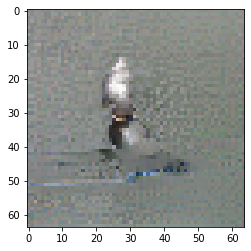

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 56

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.122917890548706 sec
Gen loss: 4.39779057670738, Gen valid loss: 1.279967820095176, Gen attr loss: 1.572291432357416, Gen caption loss: 1.5455313184397008, Disc valid loss: 1.1020822814163478, Disc valid real loss: 0.5572003060724677, Disc valid fake loss: 0.544881974536229, Disc attr loss: 2.9516505419723384, Disc attr real loss: 1.3793591096149227, Disc attr fake loss: 1.572291432357416
Time for epoch 2 is 39.11329412460327 sec
Gen loss: 4.40584427619045, Gen valid loss: 1.3001976586615813, Gen attr loss: 1.5672054171239134, Gen caption loss: 1.53844120412015, Disc valid loss: 1.0826918229178037, Disc valid real loss: 0.5479091035964366, Disc valid fake loss: 0.5347827177868303, Disc attr loss: 2.9466771724101326, Disc attr real loss: 1.3794717552862192, Disc attr fake loss: 1.5672054171239134
Time for epoch 3 is 39.09457063674927 sec
Gen loss: 4.

Time for epoch 21 is 39.12337398529053 sec
Gen loss: 4.406205307177411, Gen valid loss: 1.2895783360411481, Gen attr loss: 1.5712329026483263, Gen caption loss: 1.545394079148931, Disc valid loss: 1.0918793909271882, Disc valid real loss: 0.556044341748969, Disc valid fake loss: 0.5358350506319909, Disc attr loss: 2.950508689815759, Disc attr real loss: 1.3792757871674328, Disc attr fake loss: 1.5712329026483263
Time for epoch 22 is 39.17124009132385 sec
Gen loss: 4.398575224527499, Gen valid loss: 1.2861432780418292, Gen attr loss: 1.5700882909097647, Gen caption loss: 1.5423436513761195, Disc valid loss: 1.0922124056312126, Disc valid real loss: 0.5533243875677992, Disc valid fake loss: 0.5388880190325946, Disc attr loss: 2.9494736330295965, Disc attr real loss: 1.379385342119832, Disc attr fake loss: 1.5700882909097647
Time for epoch 23 is 39.10941410064697 sec
Gen loss: 4.393516347983343, Gen valid loss: 1.2851537012149326, Gen attr loss: 1.567741561711319, Gen caption loss: 1.5406

Time for epoch 41 is 39.12240290641785 sec
Gen loss: 4.4116623272417685, Gen valid loss: 1.2930725517311716, Gen attr loss: 1.5732085132986549, Gen caption loss: 1.5453812575275658, Disc valid loss: 1.097052045792422, Disc valid real loss: 0.5569333257229347, Disc valid fake loss: 0.5401187224116751, Disc attr loss: 2.952293182453166, Disc attr real loss: 1.379084669154511, Disc attr fake loss: 1.5732085132986549
Time for epoch 42 is 39.09685134887695 sec
Gen loss: 4.374925755549898, Gen valid loss: 1.2669195641024003, Gen attr loss: 1.5677031520905533, Gen caption loss: 1.5403030367724617, Disc valid loss: 1.1007376162986444, Disc valid real loss: 0.5548101926883708, Disc valid fake loss: 0.5459274253871059, Disc attr loss: 2.94669681900562, Disc attr real loss: 1.3789936669150664, Disc attr fake loss: 1.5677031520905533
Time for epoch 43 is 39.107475996017456 sec
Gen loss: 4.421942896313137, Gen valid loss: 1.3025753729065583, Gen attr loss: 1.5733099610501835, Gen caption loss: 1.54

Time for epoch 61 is 39.10138654708862 sec
Gen loss: 4.410442578437205, Gen valid loss: 1.3008201051210646, Gen attr loss: 1.568877505093086, Gen caption loss: 1.5407449843760752, Disc valid loss: 1.0908425658698973, Disc valid real loss: 0.5485842946745193, Disc valid fake loss: 0.5422582713569083, Disc attr loss: 2.9473893274136675, Disc attr real loss: 1.3785118223205814, Disc attr fake loss: 1.568877505093086
Time for epoch 62 is 39.139819383621216 sec
Gen loss: 4.411137755970322, Gen valid loss: 1.2913426653479496, Gen attr loss: 1.5722279164203137, Gen caption loss: 1.5475671727482865, Disc valid loss: 1.0906497340215253, Disc valid real loss: 0.5524738769382642, Disc valid fake loss: 0.5381758583755027, Disc attr loss: 2.950840718054836, Disc attr real loss: 1.3786128016345223, Disc attr fake loss: 1.5722279164203137
Time for epoch 63 is 39.08623170852661 sec
Gen loss: 4.407675257220178, Gen valid loss: 1.2881132953858312, Gen attr loss: 1.573289148852754, Gen caption loss: 1.54

Time for epoch 81 is 39.104793071746826 sec
Gen loss: 4.4018680390303695, Gen valid loss: 1.2814569316582305, Gen attr loss: 1.5711233231433361, Gen caption loss: 1.5492877914976622, Disc valid loss: 1.0985877389507241, Disc valid real loss: 0.5561425515468205, Disc valid fake loss: 0.5424451865154877, Disc attr loss: 2.9494499216880903, Disc attr real loss: 1.378326598544754, Disc attr fake loss: 1.5711233231433361
Time for epoch 82 is 39.09600019454956 sec
Gen loss: 4.389787759238143, Gen valid loss: 1.2805389358099237, Gen attr loss: 1.5679882212382992, Gen caption loss: 1.5412605845831273, Disc valid loss: 1.097478049072793, Disc valid real loss: 0.5534900076344085, Disc valid fake loss: 0.5439880422460355, Disc attr loss: 2.9465559142714914, Disc attr real loss: 1.3785676930331925, Disc attr fake loss: 1.5679882212382992
Time for epoch 83 is 39.13261675834656 sec
Gen loss: 4.39415044383951, Gen valid loss: 1.2827336083905807, Gen attr loss: 1.5689102349888664, Gen caption loss: 1.

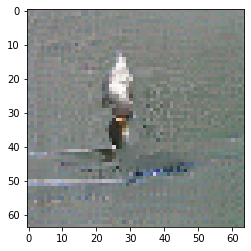

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 57

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.1003577709198 sec
Gen loss: 4.382542691579679, Gen valid loss: 1.2734165370948916, Gen attr loss: 1.5668895115374226, Gen caption loss: 1.5422366195254855, Disc valid loss: 1.1077082777410987, Disc valid real loss: 0.5578907701542707, Disc valid fake loss: 0.5498175075868281, Disc attr loss: 2.9452250217034566, Disc attr real loss: 1.3783355101660337, Disc attr fake loss: 1.5668895115374226
Time for epoch 2 is 39.14552140235901 sec
Gen loss: 4.395329656316659, Gen valid loss: 1.2749502804221176, Gen attr loss: 1.5735555544778261, Gen caption loss: 1.5468238117249031, Disc valid loss: 1.0985879323023768, Disc valid real loss: 0.5550265944585567, Disc valid fake loss: 0.5435613381668805, Disc attr loss: 2.951188655726632, Disc attr real loss: 1.3776331012488057, Disc attr fake loss: 1.5735555544778261
Time for epoch 3 is 39.10027813911438 sec
Gen los

Time for epoch 21 is 39.12219262123108 sec
Gen loss: 4.394298988306103, Gen valid loss: 1.2795921520489018, Gen attr loss: 1.5698342788510207, Gen caption loss: 1.5448725572446498, Disc valid loss: 1.102742676166338, Disc valid real loss: 0.5551249950235775, Disc valid fake loss: 0.5476176785582773, Disc attr loss: 2.9477737644500523, Disc attr real loss: 1.377939485599032, Disc attr fake loss: 1.5698342788510207
Time for epoch 22 is 39.12247943878174 sec
Gen loss: 4.3751538756094, Gen valid loss: 1.2661749434664966, Gen attr loss: 1.5677537830864512, Gen caption loss: 1.54122514679503, Disc valid loss: 1.1010988199613927, Disc valid real loss: 0.5558970302424133, Disc valid fake loss: 0.5452017938379996, Disc attr loss: 2.945840576476844, Disc attr real loss: 1.3780867933903929, Disc attr fake loss: 1.5677537830864512
Time for epoch 23 is 39.15041136741638 sec
Gen loss: 4.404782956854761, Gen valid loss: 1.291545692013531, Gen attr loss: 1.5707068630673375, Gen caption loss: 1.5425303

Time for epoch 41 is 39.130887508392334 sec
Gen loss: 4.400087446378175, Gen valid loss: 1.2866635750625839, Gen attr loss: 1.5708517850576054, Gen caption loss: 1.542572086742577, Disc valid loss: 1.0995804904922237, Disc valid real loss: 0.5554410954154927, Disc valid fake loss: 0.5441393949152008, Disc attr loss: 2.947773079561993, Disc attr real loss: 1.3769212945043878, Disc attr fake loss: 1.5708517850576054
Time for epoch 42 is 39.189751386642456 sec
Gen loss: 4.398380309262573, Gen valid loss: 1.2789552597818659, Gen attr loss: 1.5712527860470904, Gen caption loss: 1.5481722768406234, Disc valid loss: 1.1001316155521528, Disc valid real loss: 0.5528734277095898, Disc valid fake loss: 0.5472581877617978, Disc attr loss: 2.948787356456767, Disc attr real loss: 1.3775345704096766, Disc attr fake loss: 1.5712527860470904
Time for epoch 43 is 39.10659861564636 sec
Gen loss: 4.3887999516515555, Gen valid loss: 1.2722608025481061, Gen attr loss: 1.572380002275069, Gen caption loss: 1.

Time for epoch 61 is 39.12402153015137 sec
Gen loss: 4.409679111749499, Gen valid loss: 1.2885228970509557, Gen attr loss: 1.5717761419652923, Gen caption loss: 1.5493800827481237, Disc valid loss: 1.096818139398001, Disc valid real loss: 0.5590937670653429, Disc valid fake loss: 0.5377243713634771, Disc attr loss: 2.948543257506559, Disc attr real loss: 1.3767671155412669, Disc attr fake loss: 1.5717761419652923
Time for epoch 62 is 39.10692501068115 sec
Gen loss: 4.417885098677018, Gen valid loss: 1.3016634232952666, Gen attr loss: 1.5712325776495584, Gen caption loss: 1.5449890980552528, Disc valid loss: 1.0834630236716127, Disc valid real loss: 0.5477605911128243, Disc valid fake loss: 0.5357024361124529, Disc attr loss: 2.9484255937379875, Disc attr real loss: 1.377193016088429, Disc attr fake loss: 1.5712325776495584
Time for epoch 63 is 39.121387243270874 sec
Gen loss: 4.4155772656283085, Gen valid loss: 1.2853277692303748, Gen attr loss: 1.5766426760975907, Gen caption loss: 1.

Time for epoch 81 is 39.121949434280396 sec
Gen loss: 4.379355300086623, Gen valid loss: 1.2726195084693308, Gen attr loss: 1.5670284575563136, Gen caption loss: 1.5397073298611939, Disc valid loss: 1.102102431178416, Disc valid real loss: 0.5558164369284622, Disc valid fake loss: 0.5462859923115914, Disc attr loss: 2.9437140297437425, Disc attr real loss: 1.376685572187429, Disc attr fake loss: 1.5670284575563136
Time for epoch 82 is 39.176167249679565 sec
Gen loss: 4.395989105953434, Gen valid loss: 1.2826778951699171, Gen attr loss: 1.5705490435365093, Gen caption loss: 1.5427621603012085, Disc valid loss: 1.095602666782493, Disc valid real loss: 0.5524030439252776, Disc valid fake loss: 0.5431996211611482, Disc attr loss: 2.9473856758619066, Disc attr real loss: 1.3768366323253973, Disc attr fake loss: 1.5705490435365093
Time for epoch 83 is 39.09297800064087 sec
Gen loss: 4.403728468954402, Gen valid loss: 1.2879295022830084, Gen attr loss: 1.5732222191363492, Gen caption loss: 1.

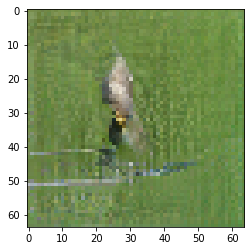

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 58

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.07886099815369 sec
Gen loss: 4.383698391720531, Gen valid loss: 1.2754415283358194, Gen attr loss: 1.5664000168725405, Gen caption loss: 1.5418568442507488, Disc valid loss: 1.1041290760040283, Disc valid real loss: 0.5584820364387377, Disc valid fake loss: 0.5456470378692234, Disc attr loss: 2.943156704346985, Disc attr real loss: 1.3767566874744446, Disc attr fake loss: 1.5664000168725405
Time for epoch 2 is 39.09054899215698 sec
Gen loss: 4.389493631476633, Gen valid loss: 1.285259366358522, Gen attr loss: 1.5659695211141735, Gen caption loss: 1.5382647356043664, Disc valid loss: 1.0902401997144953, Disc valid real loss: 0.5496786886922066, Disc valid fake loss: 0.540561512879886, Disc attr loss: 2.942596675580756, Disc attr real loss: 1.3766271544665825, Disc attr fake loss: 1.5659695211141735
Time for epoch 3 is 39.132704973220825 sec
Gen loss

Time for epoch 21 is 39.156872272491455 sec
Gen loss: 4.387230296768147, Gen valid loss: 1.278031530095956, Gen attr loss: 1.5686263253049153, Gen caption loss: 1.5405724471823632, Disc valid loss: 1.1004274395423206, Disc valid real loss: 0.5566307115684034, Disc valid fake loss: 0.5437967258740247, Disc attr loss: 2.9453048386224885, Disc attr real loss: 1.3766785133175734, Disc attr fake loss: 1.5686263253049153
Time for epoch 22 is 39.07914161682129 sec
Gen loss: 4.412961084345169, Gen valid loss: 1.291613695421193, Gen attr loss: 1.5747817945351124, Gen caption loss: 1.5465655976194677, Disc valid loss: 1.0920648261460508, Disc valid real loss: 0.5531799542871594, Disc valid fake loss: 0.538884873958784, Disc attr loss: 2.9511317153610186, Disc attr real loss: 1.3763499208259065, Disc attr fake loss: 1.5747817945351124
Time for epoch 23 is 39.11345553398132 sec
Gen loss: 4.395721458807224, Gen valid loss: 1.284869469924348, Gen attr loss: 1.5683537379189882, Gen caption loss: 1.54

Time for epoch 41 is 39.08825445175171 sec
Gen loss: 4.386947846994167, Gen valid loss: 1.2764968213027086, Gen attr loss: 1.5694482307123945, Gen caption loss: 1.5410027975635476, Disc valid loss: 1.1008228178269819, Disc valid real loss: 0.5547376890492633, Disc valid fake loss: 0.5460851263547655, Disc attr loss: 2.945840999685975, Disc attr real loss: 1.3763927689735806, Disc attr fake loss: 1.5694482307123945
Time for epoch 42 is 39.121283292770386 sec
Gen loss: 4.390239899720603, Gen valid loss: 1.2656407819853888, Gen attr loss: 1.5755921628093978, Gen caption loss: 1.549006955410407, Disc valid loss: 1.09910032888092, Disc valid real loss: 0.5562110997150908, Disc valid fake loss: 0.5428892277928226, Disc attr loss: 2.9517183219837304, Disc attr real loss: 1.3761261591743323, Disc attr fake loss: 1.5755921628093978
Time for epoch 43 is 39.158960580825806 sec
Gen loss: 4.395754466534953, Gen valid loss: 1.2739370833567487, Gen attr loss: 1.57326527210432, Gen caption loss: 1.548

Time for epoch 61 is 39.16629409790039 sec
Gen loss: 4.400728732266724, Gen valid loss: 1.2880626934653698, Gen attr loss: 1.5701774116454086, Gen caption loss: 1.5424886218254483, Disc valid loss: 1.1009530610831448, Disc valid real loss: 0.5559034496141966, Disc valid fake loss: 0.5450496140534316, Disc attr loss: 2.9460504226245208, Disc attr real loss: 1.3758730109791122, Disc attr fake loss: 1.5701774116454086
Time for epoch 62 is 39.07604146003723 sec
Gen loss: 4.391544740697555, Gen valid loss: 1.2846813151829934, Gen attr loss: 1.5682973257571378, Gen caption loss: 1.5385660827967533, Disc valid loss: 1.093669111005013, Disc valid real loss: 0.5536039680807894, Disc valid fake loss: 0.5400651410666262, Disc attr loss: 2.944368492297041, Disc attr real loss: 1.376071166539903, Disc attr fake loss: 1.5682973257571378
Time for epoch 63 is 39.11528301239014 sec
Gen loss: 4.398421668101778, Gen valid loss: 1.2874032433440046, Gen attr loss: 1.5677704190820214, Gen caption loss: 1.54

Time for epoch 81 is 39.108455657958984 sec
Gen loss: 4.388249926450776, Gen valid loss: 1.2828714096449254, Gen attr loss: 1.5672375044525477, Gen caption loss: 1.5381410044383228, Disc valid loss: 1.1004483916249055, Disc valid real loss: 0.5545056074615416, Disc valid fake loss: 0.5459427847287196, Disc attr loss: 2.9431627804670875, Disc attr real loss: 1.37592527601454, Disc attr fake loss: 1.5672375044525477
Time for epoch 82 is 39.12416625022888 sec
Gen loss: 4.3972350187741, Gen valid loss: 1.287974998233764, Gen attr loss: 1.5672583176191583, Gen caption loss: 1.542001691614063, Disc valid loss: 1.097366087804965, Disc valid real loss: 0.5538365921676967, Disc valid fake loss: 0.5435294977371609, Disc attr loss: 2.9431275387766562, Disc attr real loss: 1.3758692211574979, Disc attr fake loss: 1.5672583176191583
Time for epoch 83 is 39.17970371246338 sec
Gen loss: 4.394290995145555, Gen valid loss: 1.2820612684821049, Gen attr loss: 1.569147524794912, Gen caption loss: 1.543082

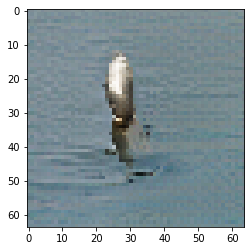

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 59

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.15144348144531 sec
Gen loss: 4.41362900462577, Gen valid loss: 1.293851331805149, Gen attr loss: 1.5728611761961526, Gen caption loss: 1.5469165087392336, Disc valid loss: 1.0967099430761362, Disc valid real loss: 0.5587206629072101, Disc valid fake loss: 0.537989280007396, Disc attr loss: 2.948711634328372, Disc attr real loss: 1.3758504581322193, Disc attr fake loss: 1.5728611761961526
Time for epoch 2 is 39.13425850868225 sec
Gen loss: 4.401023225086491, Gen valid loss: 1.2877437832555796, Gen attr loss: 1.5690142068113415, Gen caption loss: 1.5442652208049124, Disc valid loss: 1.0936004803755741, Disc valid real loss: 0.5513720388819532, Disc valid fake loss: 0.5422284419782116, Disc attr loss: 2.9442168309436583, Disc attr real loss: 1.3752026241323165, Disc attr fake loss: 1.5690142068113415
Time for epoch 3 is 39.1204400062561 sec
Gen loss: 

Time for epoch 21 is 39.10078239440918 sec
Gen loss: 4.394694602263329, Gen valid loss: 1.2850585568565016, Gen attr loss: 1.5688348637040714, Gen caption loss: 1.540801181056635, Disc valid loss: 1.09891434591314, Disc valid real loss: 0.5544806085627899, Disc valid fake loss: 0.5444337353312226, Disc attr loss: 2.944476921060867, Disc attr real loss: 1.3756420573567956, Disc attr fake loss: 1.5688348637040714
Time for epoch 22 is 39.09907507896423 sec
Gen loss: 4.393282373423176, Gen valid loss: 1.2772901012968565, Gen attr loss: 1.5715592007649946, Gen caption loss: 1.544433066838479, Disc valid loss: 1.1012504118567883, Disc valid real loss: 0.5549815841483553, Disc valid fake loss: 0.5462688254470102, Disc attr loss: 2.9470292678693446, Disc attr real loss: 1.37547006710435, Disc attr fake loss: 1.5715592007649946
Time for epoch 23 is 39.1633198261261 sec
Gen loss: 4.3901722637941525, Gen valid loss: 1.2702620683646784, Gen attr loss: 1.5730532931118477, Gen caption loss: 1.546856

Time for epoch 41 is 39.13835787773132 sec
Gen loss: 4.372959318522838, Gen valid loss: 1.2679377233755944, Gen attr loss: 1.5679661197067922, Gen caption loss: 1.5370554697868948, Disc valid loss: 1.1090316888762684, Disc valid real loss: 0.5600715573564131, Disc valid fake loss: 0.5489601320852109, Disc attr loss: 2.943125326782061, Disc attr real loss: 1.375159207075269, Disc attr fake loss: 1.5679661197067922
Time for epoch 42 is 39.10982918739319 sec
Gen loss: 4.380554897029225, Gen valid loss: 1.2724340129997025, Gen attr loss: 1.567014175055796, Gen caption loss: 1.541106713173512, Disc valid loss: 1.0963119990457364, Disc valid real loss: 0.5535093335116782, Disc valid fake loss: 0.5428026666647696, Disc attr loss: 2.9418788673431893, Disc attr real loss: 1.3748646922873933, Disc attr fake loss: 1.567014175055796
Time for epoch 43 is 39.08525228500366 sec
Gen loss: 4.391564159858517, Gen valid loss: 1.2754138037764282, Gen attr loss: 1.571756888211258, Gen caption loss: 1.54439

Time for epoch 61 is 39.092296838760376 sec
Gen loss: 4.390570945532987, Gen valid loss: 1.2797914384826412, Gen attr loss: 1.5689435182871212, Gen caption loss: 1.5418360049162454, Disc valid loss: 1.09946398909499, Disc valid real loss: 0.5554732804698996, Disc valid fake loss: 0.5439907103211576, Disc attr loss: 2.9437815335384876, Disc attr real loss: 1.3748380152513664, Disc attr fake loss: 1.5689435182871212
Time for epoch 62 is 39.114941358566284 sec
Gen loss: 4.386331155694274, Gen valid loss: 1.2816599659157317, Gen attr loss: 1.5662426997006424, Gen caption loss: 1.5384284910470813, Disc valid loss: 1.0951772631022343, Disc valid real loss: 0.5546072941162399, Disc valid fake loss: 0.5405699682591084, Disc attr loss: 2.9408803887483552, Disc attr real loss: 1.3746376890477126, Disc attr fake loss: 1.5662426997006424
Time for epoch 63 is 39.1291561126709 sec
Gen loss: 4.400597131026147, Gen valid loss: 1.2842858286730965, Gen attr loss: 1.573542591679064, Gen caption loss: 1.5

Time for epoch 81 is 39.14480376243591 sec
Gen loss: 4.4017312623621, Gen valid loss: 1.2917324731020423, Gen attr loss: 1.569506001343249, Gen caption loss: 1.5404927779019364, Disc valid loss: 1.0936728912963454, Disc valid real loss: 0.5544408727790605, Disc valid fake loss: 0.5392320193249359, Disc attr loss: 2.9439160649369405, Disc attr real loss: 1.3744100635936913, Disc attr fake loss: 1.569506001343249
Time for epoch 82 is 39.101393699645996 sec
Gen loss: 4.423962206052248, Gen valid loss: 1.3035339643638633, Gen attr loss: 1.5725404566865626, Gen caption loss: 1.547887777894493, Disc valid loss: 1.089290852953748, Disc valid real loss: 0.5509797648039614, Disc valid fake loss: 0.5383110891189679, Disc attr loss: 2.947243940216416, Disc attr real loss: 1.3747034835298533, Disc attr fake loss: 1.5725404566865626
Time for epoch 83 is 39.10018062591553 sec
Gen loss: 4.411954486273168, Gen valid loss: 1.2897853659097418, Gen attr loss: 1.5741349329470296, Gen caption loss: 1.54803

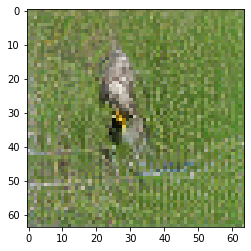

In [69]:
next_starting_checkpoint, totalepochs, warmup = long_train(starting_checkpoint=next_starting_checkpoint, 
                                      num_checkpoints=60, 
                                      checkpoint_interval=100, 
                                      g_hist=gen_loss_hist, 
                                      g_valid_hist=gen_valid_loss_hist,
                                      g_attr_hist=gen_attr_loss_hist,
                                      g_caption_hist=gen_caption_loss_hist,
                                      d_hist=disc_loss_hist,
                                      d_real_hist=disc_loss_real_hist,
                                      d_fake_hist=disc_loss_fake_hist,
                                      d_attr_real_hist=disc_attr_loss_real_hist,
                                      d_attr_fake_hist=disc_attr_loss_fake_hist,
                                      noise=noise300,
                                      caption=caption,
                                      save_files=True,
                                      warmup=warmup)

In [ ]:
captions = train_captions[np.random.choice(range(len(train_captions)), 5, replace=False)]
# attrs = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
tempnoise = np.random.normal(0, 1, 300)
for i in range(5):
#     tempnoise = np.random.normal(0, 1, 300)

    
#     attrs[2] += 1.
    
    generated_image = generator.predict([np.array([tempnoise]), np.array([1.*captions[i]])] )[0][0]
    plt.imshow(unnormalize_img(generated_image))
    plt.show()
#     ax.imshow(unnormalize_img(generated_image))

In [ ]:
caption = bc.encode(['the medium sized bird has a dark grey color, a black downward curved beak, and long wings.'])[0]
noise = np.random.normal(0, 1, 300)
for i in range(1):
    generated_image = generator.predict([np.array([noise]), np.array([1.*caption])] )[0][0]
    plt.imshow(unnormalize_img(generated_image))
    plt.show()
#     ax.imshow(unnormalize_img(generated_image))

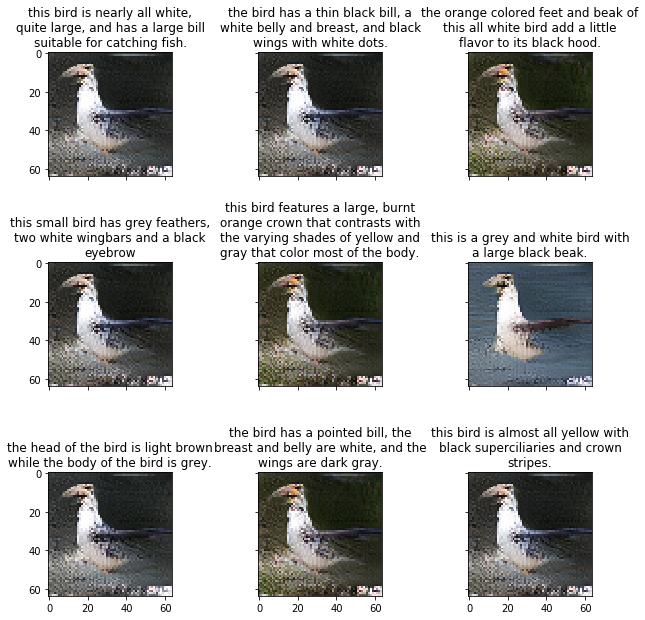

In [65]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=1.2,  # pad between axes in inch.
                 )

indices = np.random.choice(len(train_captions), 9)
captions = train_captions[indices]
text = [caption_text[x] for x in indices]
tempnoise = np.random.normal(0, 1, 300)
for i, ax in enumerate(grid):
    generated_image = generator.predict([np.array([tempnoise]), np.array([captions[i]])] )[0][0]
    ax.imshow(unnormalize_img(generated_image))
    ax.set_title('\n'.join(wrap(text[i], 35)))

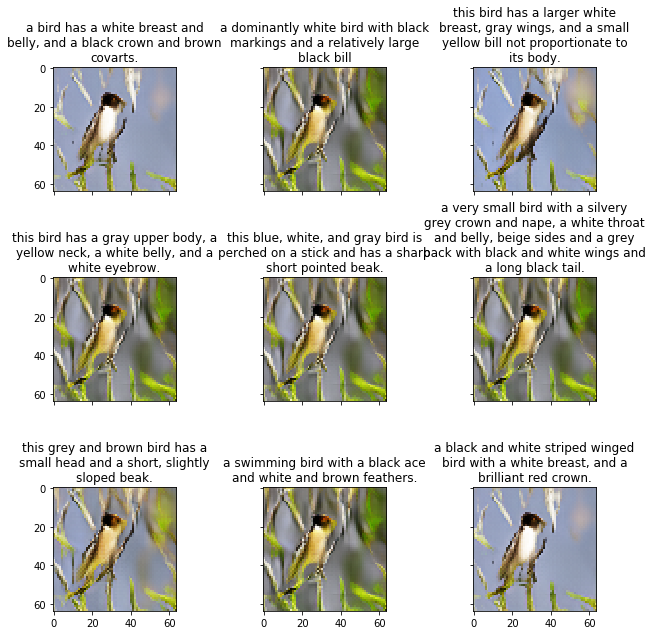

In [81]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=1.2,  # pad between axes in inch.
                 )

indices = np.random.choice(len(train_captions), 9)
captions = train_captions[indices]
text = [caption_text[x] for x in indices]
tempnoise = np.random.normal(0, 1, 300)
for i, ax in enumerate(grid):
    generated_image = generator.predict([np.array([tempnoise]), np.array([captions[i]])] )[0][0]
    ax.imshow(unnormalize_img(generated_image))
    ax.set_title('\n'.join(wrap(text[i], 35)))

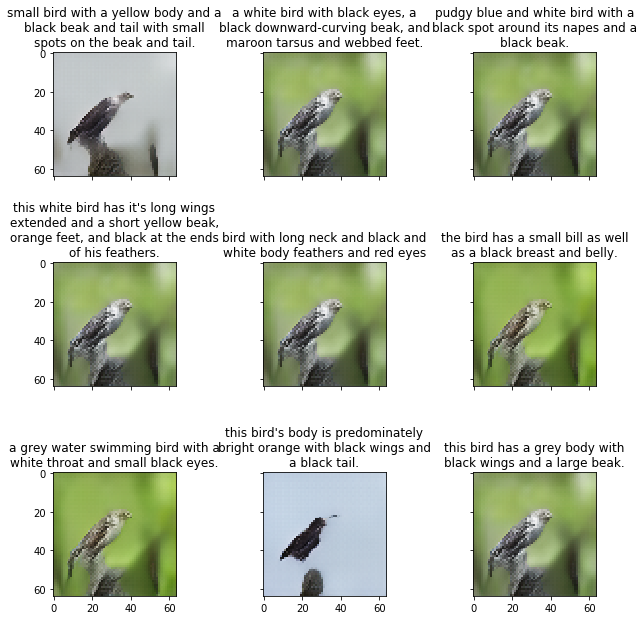

In [149]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=1.2,  # pad between axes in inch.
                 )

indices = np.random.choice(len(train_captions), 9)
captions = train_captions[indices]
text = [caption_text[x] for x in indices]
tempnoise = np.random.normal(0, 1, 300)
for i, ax in enumerate(grid):
    generated_image = generator.predict([np.array([tempnoise]), np.array([captions[i]])] )[0][0]
    ax.imshow(unnormalize_img(generated_image))
    ax.set_title('\n'.join(wrap(text[i], 35)))

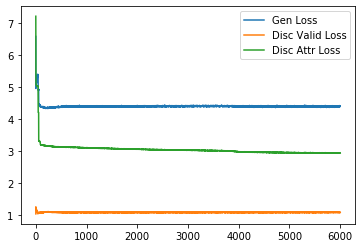

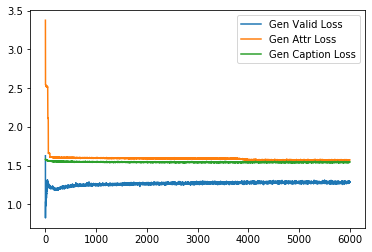

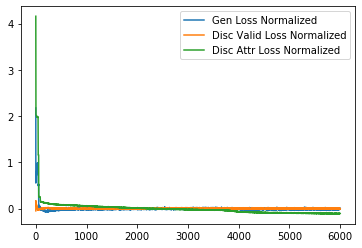

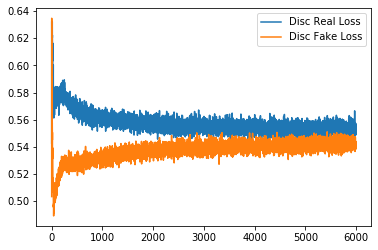

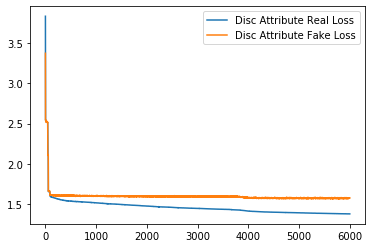

In [150]:
plot_save_dir = 'bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34'

from operator import add
disc_attr_loss_hist = list( map(add, disc_attr_loss_real_hist, disc_attr_loss_fake_hist) )

plt.plot(gen_loss_hist)
plt.plot(disc_loss_hist)
plt.plot(disc_attr_loss_hist)

plt.legend(['Gen Loss','Disc Valid Loss', 'Disc Attr Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses.png')
plt.show()

plt.plot(gen_valid_loss_hist)
plt.plot(gen_attr_loss_hist)
plt.plot(gen_caption_loss_hist)
plt.legend(['Gen Valid Loss', 'Gen Attr Loss', 'Gen Caption Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_valid_attr_losses.png')
plt.show()

plt.plot(gen_loss_hist - np.mean(gen_loss_hist))
plt.plot(disc_loss_hist - np.mean(disc_loss_hist))
plt.plot(disc_attr_loss_hist - np.mean(disc_attr_loss_hist))
plt.legend(['Gen Loss Normalized','Disc Valid Loss Normalized', 'Disc Attr Loss Normalized'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses_normalized.png')
plt.show()

plt.plot(disc_loss_real_hist)
plt.plot(disc_loss_fake_hist)
plt.legend(['Disc Real Loss','Disc Fake Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/d_real_fake_losses.png')
plt.show()

plt.plot(disc_attr_loss_real_hist)
# plt.show()
plt.plot(disc_attr_loss_fake_hist)
plt.legend(['Disc Attribute Real Loss', 'Disc Attribute Fake Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/d_attribute_real_fake_losses.png')
plt.show()


In [ ]:
prediction = discriminator_attr.predict(np.array([train_imgs[6]]))[0]
print(np.where(np.round(prediction) == 1))

In [ ]:
prediction = discriminator_attr.predict(np.array([train_imgs[344]]))[0]
print(np.where(np.round(prediction) == 1))

In [ ]:
d = dict.fromkeys([i for i in range(10)], 0)
prediction = discriminator_attr.predict(np.array(train_imgs))
prediction = np.round(prediction)
for p in prediction:
    p = np.where(p == 1)
    for i in p[0]:
        d[i] += 1
    
# for im in train_imgs:
#     for p in prediction[0]:
#         d[p] += 1

In [ ]:
plt.bar([x for x in range(10)], d.values())

In [ ]:
plt.bar([x for x in range(10)], np.sum(train_attrs, axis=0))

In [ ]:
train_captions[0]

In [ ]:
from bert_serving.client import BertClient
bc = BertClient()

In [ ]:
testcaption = bc.encode(['red bird.'])[0]

In [ ]:
testcaption[0][0]


In [58]:
def save_plots(epochs):
    plt.ioff()
    plot_save_dir = 'bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34'

    from operator import add
    disc_attr_loss_hist = list( map(add, disc_attr_loss_real_hist, disc_attr_loss_fake_hist) )
    
    fig = plt.figure()
    plt.plot(gen_loss_hist)
    plt.plot(disc_loss_hist)
    plt.plot(disc_attr_loss_hist)

    plt.legend(['Gen Loss','Disc Valid Loss', 'Disc Attr Loss'])
    plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses' + str(epochs) + '.png')
    plt.close(fig)
#     plt.show()

    fig = plt.figure()
    plt.plot(gen_valid_loss_hist)
    plt.plot(gen_attr_loss_hist)
    plt.plot(gen_caption_loss_hist)
    plt.legend(['Gen Valid Loss', 'Gen Attr Loss', 'Gen Caption Loss'])
    plt.savefig('./results/plots/'+plot_save_dir+'/g_valid_attr_losses' + str(epochs) + '.png')
    plt.close(fig)
#     plt.show()

    fig = plt.figure()
    plt.plot(gen_loss_hist - np.mean(gen_loss_hist))
    plt.plot(disc_loss_hist - np.mean(disc_loss_hist))
    plt.plot(disc_attr_loss_hist - np.mean(disc_attr_loss_hist))
    plt.legend(['Gen Loss Normalized','Disc Valid Loss Normalized', 'Disc Attr Loss Normalized'])
    plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses_normalized' + str(epochs) + '.png')
    plt.close(fig)
#     plt.show()

    fig = plt.figure()
    plt.plot(disc_loss_real_hist)
    plt.plot(disc_loss_fake_hist)
    plt.legend(['Disc Real Loss','Disc Fake Loss'])
    plt.savefig('./results/plots/'+plot_save_dir+'/d_real_fake_losses' + str(epochs) + '.png')
    plt.close(fig)
#     plt.show()

    fig = plt.figure()
    plt.plot(disc_attr_loss_real_hist)
    # plt.show()
    plt.plot(disc_attr_loss_fake_hist)
    plt.legend(['Disc Attribute Real Loss', 'Disc Attribute Fake Loss'])
    plt.savefig('./results/plots/'+plot_save_dir+'/d_attribute_real_fake_losses' + str(epochs) + '.png')
    plt.close(fig)
#     plt.show()
    plt.ion()

In [19]:
generator.load_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34/gen_weights_attributes_split_2000.h5')

del train_imgs

fid_imgs = []
import os
for root, dirs, files in os.walk("./CUB_200_2011/CUB_200_2011/images-cleaned/", topdown=False):
    for name in files:
        im = cv2.cvtColor(cv2.imread(os.path.join(root, name)), cv2.COLOR_RGB2BGR)
        im = cv2.resize(im, (299, 299))
        fid_imgs.append(im)

fid_imgs = np.array(fid_imgs)
fid_imgs = fid_imgs[:5894]
# fid_imgs = (fid_imgs - 127.5)/127.5

train_captions = train_captions[:5894]

def generate_fake_images(model, samples, noise_dim):
    noise = np.random.normal(0, 1, (samples, noise_dim))
    imgs = model.predict([noise, train_captions])[0]
    resized_imgs = []
    for img in imgs:
        resized_imgs.append(cv2.resize(unnormalize_img(img), (299, 299)))
    return np.round(255*np.array(resized_imgs))


from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
iv3 = InceptionV3(include_top=False, pooling='avg')#, input_shape=(75,75,3))

import scipy

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    images1 = preprocess_input(images1)
    images2 = preprocess_input(images2)
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = scipy.linalg.sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

fids = 0
for i in range(1):
    fake_images = generate_fake_images(generator, len(fid_imgs), 300)
    fids += calculate_fid(iv3, fid_imgs, fake_images)
    print(f'{100*(i+1)/5.:.2f}%')
print(fids/1.)

20.00%
48.85716090849329


In [166]:
i

8

In [1]:
discriminator_attr.load_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder-34/disc_weights_attributes_split_attr_6000.h5')

d = dict.fromkeys([i for i in range(34)], 0)
prediction = discriminator_attr.predict(np.array(train_imgs))
prediction = np.round(prediction)
for p in prediction:
    p = np.where(p == 1)
    for i in p[0]:
        d[i] += 1
    
plt.bar([x for x in range(34)], d.values())

NameError: name 'discriminator_attr' is not defined